# Machine-learning analysis - Balanced dataset - Only TNBC - Only Clusters - q-value < 1

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import seaborn as sns
import os
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

import sklearn
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
import shap
from sklearn.metrics import confusion_matrix
#from sklearn.metrics import plot_confusion_matrix
from sklearn.svm import SVC

In [2]:
os.chdir("C:/Users/Cristina/OneDrive/Documenti/BCG/Tesi/Occurrence matrix data_definitivo")

In [3]:
# load the occurrence matrix 
occurrence_matrix_TNandNONTN_relgenes_q1 = pd.read_csv('Occurrence_Matrix_onlyTNrelgenes_q1_withLabels_VARIANTCLASS_afterMutCLust_ONLYclusters_definitivo.csv', sep=None, engine='python')

# Set the first column as row indices
occurrence_matrix_TNandNONTN_relgenes_q1 = occurrence_matrix_TNandNONTN_relgenes_q1.set_index(occurrence_matrix_TNandNONTN_relgenes_q1.iloc[:, 0])
# Remove the name of the index column
occurrence_matrix_TNandNONTN_relgenes_q1 = occurrence_matrix_TNandNONTN_relgenes_q1.rename_axis(None, axis='index')
# Drop the first column from the DataFrame
occurrence_matrix_TNandNONTN_relgenes_q1 = occurrence_matrix_TNandNONTN_relgenes_q1.iloc[:, 1:]

occurrence_matrix_TNandNONTN_relgenes_q1

,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,PIK3CA_Missense_Mutation_545_546,TP53_Nonsense_Mutation_191_199,PIK3CA_Missense_Mutation_541_542,PIK3CA_Missense_Mutation_345_345,TP53_Frame_Shift_Del_211_218,...,NOTCH2_Frame_Shift_Ins_2297_2303,TP53_Frame_Shift_Ins_270_282,TP53_Silent_191_199,PIK3CA_Nonsense_Mutation_418_420,PIK3CA_In_Frame_Ins_102_113,PTEN_Frame_Shift_Ins_317_318,ZKSCAN1_Frame_Shift_Ins_270_270,ZNF195_Missense_Mutation_109_111,MYL10_Splice_Region_26_26,Target
brca_smc_2018_BB01_004,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
brca_smc_2018_BB01_005,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_010,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_013,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_014,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBCProject_pktAIxFb,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
MBCProject_rJHBiKTl,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
MBCProject_rYSXcxcV,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_rvULI3TV,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [4]:
# SELECT THE PATIENTS

# Extract the row indices as a list
total_patient_indices = occurrence_matrix_TNandNONTN_relgenes_q1.index.tolist()
# Create a new DataFrame with the patient indices
total_patient_indices = pd.DataFrame({'Patient': total_patient_indices})
total_patient_indices

,Patient
0,brca_smc_2018_BB01_004
1,brca_smc_2018_BB01_005
2,brca_smc_2018_BB01_010
3,brca_smc_2018_BB01_013
4,brca_smc_2018_BB01_014
...,...
681,MBCProject_pktAIxFb
682,MBCProject_rJHBiKTl
683,MBCProject_rYSXcxcV
684,MBCProject_rvULI3TV


### Study the intersaction between these patients and the only cluster test patients with genes having p-value < 0.05

In [5]:
os.chdir("C:/Users/Cristina/OneDrive/Documenti/BCG/Tesi/Test_patients")
# load the test patients of the encoding 'only cluster'
onlyclusters_TN_test_pts_p005 = pd.read_csv('Test_TNandNONTNpatients_only_clusters_p_005.txt', sep=',', engine='python')
onlyclusters_TN_test_pts_p005

,Patient
0,TCGA-B6-A401
1,TCGA-B6-A0X5
2,TCGA-A2-A0D0
3,TCGA-A2-A0CL
4,TCGA-D8-A142
...,...
65,brca_smc_2018_BR371
66,brca_smc_2018_BB01_017
67,TCGA-A7-A0DB
68,brca_smc_2018_BB01_126


In [6]:
onlyclusters_TN_test_pts_p005_list = onlyclusters_TN_test_pts_p005['Patient'].to_list()
onlyclusters_TN_test_pts_p005_list

['TCGA-B6-A401',
 'TCGA-B6-A0X5',
 'TCGA-A2-A0D0',
 'TCGA-A2-A0CL',
 'TCGA-D8-A142',
 'brca_smc_2018_BB01_119',
 'TCGA-C8-A27B',
 'MBCProject_oqupfDu7',
 'X21BR002',
 'TCGA-AR-A1AJ',
 'TCGA-D8-A1JJ',
 'X11BR014',
 'MBC_128',
 'MBC_163',
 'MBC_120',
 'brca_smc_2018_BB01_110',
 'TCGA-AC-A6IW',
 'MBCProject_LVSjf8h7',
 'PD4133a',
 'TCGA-A2-A0YI',
 'TCGA-BH-A0BO',
 'MBCProject_d5CbUNTb',
 'TCGA-AO-A03M',
 'MBC_167',
 'TCGA-AO-A03L',
 'TCGA-E2-A14R',
 'MBC_204',
 'X20BR008',
 'TCGA-BH-A0H3',
 'MBC_72',
 'TCGA-B6-A409',
 'TCGA-BH-A0E0',
 'brca_smc_2018_BR145',
 'TCGA-BH-A0BJ',
 'MBC_10',
 'TCGA-A1-A0SI',
 'TCGA-AO-A0J2',
 'X11BR011',
 'TCGA-AR-A24S',
 'TCGA-AR-A0TP',
 'TCGA-E9-A1R0',
 'TCGA-C8-A26V',
 'TCGA-C8-A131',
 'MBC_33',
 'TCGA-D8-A27K',
 'TCGA-AO-A129',
 'X18BR002',
 'TCGA-A2-A0YH',
 'MBC_199',
 'MBC_183',
 'MBC_53',
 'brca_smc_2018_BB01_037',
 'MBCProject_pktAIxFb',
 'TCGA-A8-A093',
 'TCGA-A2-A0EQ',
 'TCGA-B6-A0I1',
 'TCGA-AC-A23E',
 'TCGA-AR-A1AV',
 'TCGA-E2-A14Y',
 'TCGA-D8-A27F',

In [7]:
pd.merge(total_patient_indices, onlyclusters_TN_test_pts_p005, how='inner', on=['Patient'])

,Patient
0,brca_smc_2018_BB01_017
1,brca_smc_2018_BB01_037
2,brca_smc_2018_BB01_110
3,brca_smc_2018_BB01_126
4,brca_smc_2018_BB01_130
...,...
59,MBC_199
60,MBC_204
61,MBCProject_d5CbUNTb
62,MBCProject_oqupfDu7


6 patients from onlycluster (p<0.05) dataset are not present in the dataset of interest.

In [8]:
occurrence_matrix_TNandNONTN_relgenes_q1.sum().sum()

950

In [9]:
columns_with_all_zeros = (occurrence_matrix_TNandNONTN_relgenes_q1 == 0).all().sum()
columns_with_all_zeros

0

In [10]:
(occurrence_matrix_TNandNONTN_relgenes_q1 == 0).all().sum()

0

There are no rows and no columns with all zero values.

### Check if there are patients with no features (zero rows) and mutations not present in any patient (zero columns)

In [11]:
patient_target = occurrence_matrix_TNandNONTN_relgenes_q1[['Target']]
patient_target

,Target
brca_smc_2018_BB01_004,1
brca_smc_2018_BB01_005,0
brca_smc_2018_BB01_010,0
brca_smc_2018_BB01_013,0
brca_smc_2018_BB01_014,0
...,...
MBCProject_pktAIxFb,0
MBCProject_rJHBiKTl,1
MBCProject_rYSXcxcV,0
MBCProject_rvULI3TV,0


In [12]:
occurrence_matrix_without_target = occurrence_matrix_TNandNONTN_relgenes_q1.drop('Target', axis=1)
occurrence_matrix_without_target

,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,PIK3CA_Missense_Mutation_545_546,TP53_Nonsense_Mutation_191_199,PIK3CA_Missense_Mutation_541_542,PIK3CA_Missense_Mutation_345_345,TP53_Frame_Shift_Del_211_218,...,PIK3CA_Silent_541_542,NOTCH2_Frame_Shift_Ins_2297_2303,TP53_Frame_Shift_Ins_270_282,TP53_Silent_191_199,PIK3CA_Nonsense_Mutation_418_420,PIK3CA_In_Frame_Ins_102_113,PTEN_Frame_Shift_Ins_317_318,ZKSCAN1_Frame_Shift_Ins_270_270,ZNF195_Missense_Mutation_109_111,MYL10_Splice_Region_26_26
brca_smc_2018_BB01_004,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_005,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_010,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_013,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_014,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBCProject_pktAIxFb,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
MBCProject_rJHBiKTl,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_rYSXcxcV,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_rvULI3TV,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [13]:
zero_rows = occurrence_matrix_without_target[(occurrence_matrix_without_target == 0).all(axis=1)]
zero_rows

,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,PIK3CA_Missense_Mutation_545_546,TP53_Nonsense_Mutation_191_199,PIK3CA_Missense_Mutation_541_542,PIK3CA_Missense_Mutation_345_345,TP53_Frame_Shift_Del_211_218,...,PIK3CA_Silent_541_542,NOTCH2_Frame_Shift_Ins_2297_2303,TP53_Frame_Shift_Ins_270_282,TP53_Silent_191_199,PIK3CA_Nonsense_Mutation_418_420,PIK3CA_In_Frame_Ins_102_113,PTEN_Frame_Shift_Ins_317_318,ZKSCAN1_Frame_Shift_Ins_270_270,ZNF195_Missense_Mutation_109_111,MYL10_Splice_Region_26_26


There aren't patients with zero mutations.

In [14]:
# separate the class 0 (non TN) from the class 1 (TN)

# class count
class_count_0, class_count_1 = occurrence_matrix_TNandNONTN_relgenes_q1['Target'].value_counts()

In [15]:
class_count_0

540

In [16]:
class_count_1

146

In [17]:
# Separate class
class_0 = occurrence_matrix_TNandNONTN_relgenes_q1[occurrence_matrix_TNandNONTN_relgenes_q1['Target'] == 0]
class_1 = occurrence_matrix_TNandNONTN_relgenes_q1[occurrence_matrix_TNandNONTN_relgenes_q1['Target'] == 1] # print the shape of the class
print('Target 0 - Non TN:', class_0.shape)
print('Target 1 - TN:', class_1.shape)

Target 0 - Non TN: (540, 48)
Target 1 - TN: (146, 48)


In [18]:
# Non Triple-Negative patients (the patients without mutations in the considered genes have been dropped out) 
class_0

,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,PIK3CA_Missense_Mutation_545_546,TP53_Nonsense_Mutation_191_199,PIK3CA_Missense_Mutation_541_542,PIK3CA_Missense_Mutation_345_345,TP53_Frame_Shift_Del_211_218,...,NOTCH2_Frame_Shift_Ins_2297_2303,TP53_Frame_Shift_Ins_270_282,TP53_Silent_191_199,PIK3CA_Nonsense_Mutation_418_420,PIK3CA_In_Frame_Ins_102_113,PTEN_Frame_Shift_Ins_317_318,ZKSCAN1_Frame_Shift_Ins_270_270,ZNF195_Missense_Mutation_109_111,MYL10_Splice_Region_26_26,Target
brca_smc_2018_BB01_005,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_010,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_013,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_014,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_016,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBCProject_p1CQTdIg,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_pktAIxFb,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
MBCProject_rYSXcxcV,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_rvULI3TV,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [19]:
# SELECT THE PATIENTS

# Extract the row indices as a list
NONTN_patient_indices = class_0.index.tolist()
# Create a new DataFrame with the patient indices
NONTN_patient_df = pd.DataFrame({'Patient': NONTN_patient_indices})
NONTN_patient_df

,Patient
0,brca_smc_2018_BB01_005
1,brca_smc_2018_BB01_010
2,brca_smc_2018_BB01_013
3,brca_smc_2018_BB01_014
4,brca_smc_2018_BB01_016
...,...
535,MBCProject_p1CQTdIg
536,MBCProject_pktAIxFb
537,MBCProject_rYSXcxcV
538,MBCProject_rvULI3TV


### Select the patients that you do not want to discard when balancing the datasets.

In [20]:
NONTN_pts_tokeep= pd.merge(NONTN_patient_df, onlyclusters_TN_test_pts_p005, how='inner', on=['Patient'])
NONTN_pts_tokeep

,Patient
0,brca_smc_2018_BB01_017
1,brca_smc_2018_BB01_130
2,brca_smc_2018_BR371
3,X11BR011
4,X11BR014
5,X21BR002
6,TCGA-A1-A0SI
7,TCGA-A2-A0CL
8,TCGA-A2-A0EQ
9,TCGA-A2-A0YH


In [21]:
NONTN_pts_tokeep_list = NONTN_pts_tokeep['Patient'].tolist()
NONTN_pts_tokeep_list

['brca_smc_2018_BB01_017',
 'brca_smc_2018_BB01_130',
 'brca_smc_2018_BR371',
 'X11BR011',
 'X11BR014',
 'X21BR002',
 'TCGA-A1-A0SI',
 'TCGA-A2-A0CL',
 'TCGA-A2-A0EQ',
 'TCGA-A2-A0YH',
 'TCGA-A2-A0YI',
 'TCGA-A7-A0DB',
 'TCGA-A8-A093',
 'TCGA-AC-A23E',
 'TCGA-AO-A03L',
 'TCGA-AO-A03M',
 'TCGA-AO-A0J2',
 'TCGA-AR-A1AV',
 'TCGA-AR-A24S',
 'TCGA-B6-A0X5',
 'TCGA-B6-A401',
 'TCGA-BH-A0BJ',
 'TCGA-BH-A0BO',
 'TCGA-BH-A0H3',
 'TCGA-BH-A1FU',
 'TCGA-D8-A1JJ',
 'TCGA-D8-A27K',
 'TCGA-E9-A1R0',
 'MBC_128',
 'MBC_72',
 'MBC_183',
 'MBC_199',
 'MBCProject_pktAIxFb']

### Select the occurrence matrix associated to these NON TN patients 

In [22]:
NONTN_occ_matrix = class_0.reset_index(inplace=False)  # Reset the index, which adds the index as a column
# Rename the new index column (which has the default name 'index') to something else if needed
NONTN_occ_matrix=NONTN_occ_matrix.rename(columns={'index': 'Patient'}, inplace=False)
NONTN_occ_matrix

,Patient,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,PIK3CA_Missense_Mutation_545_546,TP53_Nonsense_Mutation_191_199,PIK3CA_Missense_Mutation_541_542,PIK3CA_Missense_Mutation_345_345,...,NOTCH2_Frame_Shift_Ins_2297_2303,TP53_Frame_Shift_Ins_270_282,TP53_Silent_191_199,PIK3CA_Nonsense_Mutation_418_420,PIK3CA_In_Frame_Ins_102_113,PTEN_Frame_Shift_Ins_317_318,ZKSCAN1_Frame_Shift_Ins_270_270,ZNF195_Missense_Mutation_109_111,MYL10_Splice_Region_26_26,Target
0,brca_smc_2018_BB01_005,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,brca_smc_2018_BB01_010,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,brca_smc_2018_BB01_013,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,brca_smc_2018_BB01_014,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,brca_smc_2018_BB01_016,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,MBCProject_p1CQTdIg,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536,MBCProject_pktAIxFb,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
537,MBCProject_rYSXcxcV,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
538,MBCProject_rvULI3TV,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [23]:
NONTN_occ_matrix.loc[NONTN_occ_matrix['Patient']=='MBC_159']

,Patient,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,PIK3CA_Missense_Mutation_545_546,TP53_Nonsense_Mutation_191_199,PIK3CA_Missense_Mutation_541_542,PIK3CA_Missense_Mutation_345_345,...,NOTCH2_Frame_Shift_Ins_2297_2303,TP53_Frame_Shift_Ins_270_282,TP53_Silent_191_199,PIK3CA_Nonsense_Mutation_418_420,PIK3CA_In_Frame_Ins_102_113,PTEN_Frame_Shift_Ins_317_318,ZKSCAN1_Frame_Shift_Ins_270_270,ZNF195_Missense_Mutation_109_111,MYL10_Splice_Region_26_26,Target
433,MBC_159,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
# extract the 32 non TN patients 
NONTN_patients_tokeep_occ_matrix = pd.merge(NONTN_occ_matrix, NONTN_pts_tokeep, how='inner', on=['Patient'])
NONTN_patients_tokeep_occ_matrix

,Patient,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,PIK3CA_Missense_Mutation_545_546,TP53_Nonsense_Mutation_191_199,PIK3CA_Missense_Mutation_541_542,PIK3CA_Missense_Mutation_345_345,...,NOTCH2_Frame_Shift_Ins_2297_2303,TP53_Frame_Shift_Ins_270_282,TP53_Silent_191_199,PIK3CA_Nonsense_Mutation_418_420,PIK3CA_In_Frame_Ins_102_113,PTEN_Frame_Shift_Ins_317_318,ZKSCAN1_Frame_Shift_Ins_270_270,ZNF195_Missense_Mutation_109_111,MYL10_Splice_Region_26_26,Target
0,brca_smc_2018_BB01_017,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,brca_smc_2018_BB01_130,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,brca_smc_2018_BR371,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,X11BR011,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,X11BR014,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,X21BR002,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,TCGA-A1-A0SI,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,TCGA-A2-A0CL,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,TCGA-A2-A0EQ,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,TCGA-A2-A0YH,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [25]:
NONTN_patients_tokeep_occ_matrix.loc[NONTN_patients_tokeep_occ_matrix['Patient']=='MBC_159']

,Patient,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,PIK3CA_Missense_Mutation_545_546,TP53_Nonsense_Mutation_191_199,PIK3CA_Missense_Mutation_541_542,PIK3CA_Missense_Mutation_345_345,...,NOTCH2_Frame_Shift_Ins_2297_2303,TP53_Frame_Shift_Ins_270_282,TP53_Silent_191_199,PIK3CA_Nonsense_Mutation_418_420,PIK3CA_In_Frame_Ins_102_113,PTEN_Frame_Shift_Ins_317_318,ZKSCAN1_Frame_Shift_Ins_270_270,ZNF195_Missense_Mutation_109_111,MYL10_Splice_Region_26_26,Target


In [26]:
pts_to_select = ['MBC_159', 'TCGA-AN-A0XS', 'X01BR015', 'brca_smc_2018_BR331']

selected_pts = NONTN_occ_matrix[NONTN_occ_matrix['Patient'].isin(pts_to_select)]
selected_pts

,Patient,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,PIK3CA_Missense_Mutation_545_546,TP53_Nonsense_Mutation_191_199,PIK3CA_Missense_Mutation_541_542,PIK3CA_Missense_Mutation_345_345,...,NOTCH2_Frame_Shift_Ins_2297_2303,TP53_Frame_Shift_Ins_270_282,TP53_Silent_191_199,PIK3CA_Nonsense_Mutation_418_420,PIK3CA_In_Frame_Ins_102_113,PTEN_Frame_Shift_Ins_317_318,ZKSCAN1_Frame_Shift_Ins_270_270,ZNF195_Missense_Mutation_109_111,MYL10_Splice_Region_26_26,Target
46,brca_smc_2018_BR331,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
112,X01BR015,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
216,TCGA-AN-A0XS,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
433,MBC_159,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
NONTN_patients_tokeep_occ_matrix2 = pd.concat([NONTN_patients_tokeep_occ_matrix, selected_pts])
NONTN_patients_tokeep_occ_matrix2

,Patient,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,PIK3CA_Missense_Mutation_545_546,TP53_Nonsense_Mutation_191_199,PIK3CA_Missense_Mutation_541_542,PIK3CA_Missense_Mutation_345_345,...,NOTCH2_Frame_Shift_Ins_2297_2303,TP53_Frame_Shift_Ins_270_282,TP53_Silent_191_199,PIK3CA_Nonsense_Mutation_418_420,PIK3CA_In_Frame_Ins_102_113,PTEN_Frame_Shift_Ins_317_318,ZKSCAN1_Frame_Shift_Ins_270_270,ZNF195_Missense_Mutation_109_111,MYL10_Splice_Region_26_26,Target
0,brca_smc_2018_BB01_017,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,brca_smc_2018_BB01_130,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,brca_smc_2018_BR371,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,X11BR011,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,X11BR014,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,X21BR002,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,TCGA-A1-A0SI,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,TCGA-A2-A0CL,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,TCGA-A2-A0EQ,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,TCGA-A2-A0YH,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [28]:
NONTN_patients_tokeep_occ_matrix2['Patient'].duplicated()

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
30     False
31     False
32     False
46     False
112    False
216    False
433    False
Name: Patient, dtype: bool

In [29]:
NONTN_patients_tokeep_occ_matrix2 = NONTN_patients_tokeep_occ_matrix2.set_index('Patient', inplace=False)
NONTN_patients_tokeep_occ_matrix2.index.name = None
NONTN_patients_tokeep_occ_matrix2

,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,PIK3CA_Missense_Mutation_545_546,TP53_Nonsense_Mutation_191_199,PIK3CA_Missense_Mutation_541_542,PIK3CA_Missense_Mutation_345_345,TP53_Frame_Shift_Del_211_218,...,NOTCH2_Frame_Shift_Ins_2297_2303,TP53_Frame_Shift_Ins_270_282,TP53_Silent_191_199,PIK3CA_Nonsense_Mutation_418_420,PIK3CA_In_Frame_Ins_102_113,PTEN_Frame_Shift_Ins_317_318,ZKSCAN1_Frame_Shift_Ins_270_270,ZNF195_Missense_Mutation_109_111,MYL10_Splice_Region_26_26,Target
brca_smc_2018_BB01_017,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_130,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BR371,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
X11BR011,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
X11BR014,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
X21BR002,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-A1-A0SI,0,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-A2-A0CL,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-A2-A0EQ,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-A2-A0YH,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
NONTN_pts_tokeep_list2 = NONTN_patients_tokeep_occ_matrix2.index.to_list()

In [31]:
len(NONTN_pts_tokeep_list2)

37

### Create the NON TN occurrence matrix without the patients to keep

In [32]:
class_0_new = NONTN_occ_matrix[~NONTN_occ_matrix['Patient'].isin(NONTN_pts_tokeep_list2)]
class_0_new

,Patient,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,PIK3CA_Missense_Mutation_545_546,TP53_Nonsense_Mutation_191_199,PIK3CA_Missense_Mutation_541_542,PIK3CA_Missense_Mutation_345_345,...,NOTCH2_Frame_Shift_Ins_2297_2303,TP53_Frame_Shift_Ins_270_282,TP53_Silent_191_199,PIK3CA_Nonsense_Mutation_418_420,PIK3CA_In_Frame_Ins_102_113,PTEN_Frame_Shift_Ins_317_318,ZKSCAN1_Frame_Shift_Ins_270_270,ZNF195_Missense_Mutation_109_111,MYL10_Splice_Region_26_26,Target
0,brca_smc_2018_BB01_005,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,brca_smc_2018_BB01_010,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,brca_smc_2018_BB01_013,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,brca_smc_2018_BB01_014,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,brca_smc_2018_BB01_016,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
534,MBCProject_oeubIAFD,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
535,MBCProject_p1CQTdIg,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
537,MBCProject_rYSXcxcV,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
538,MBCProject_rvULI3TV,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [33]:
# Triple-Negative patients 
class_1

,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,PIK3CA_Missense_Mutation_545_546,TP53_Nonsense_Mutation_191_199,PIK3CA_Missense_Mutation_541_542,PIK3CA_Missense_Mutation_345_345,TP53_Frame_Shift_Del_211_218,...,NOTCH2_Frame_Shift_Ins_2297_2303,TP53_Frame_Shift_Ins_270_282,TP53_Silent_191_199,PIK3CA_Nonsense_Mutation_418_420,PIK3CA_In_Frame_Ins_102_113,PTEN_Frame_Shift_Ins_317_318,ZKSCAN1_Frame_Shift_Ins_270_270,ZNF195_Missense_Mutation_109_111,MYL10_Splice_Region_26_26,Target
brca_smc_2018_BB01_004,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
brca_smc_2018_BB01_037,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
brca_smc_2018_BB01_041,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
brca_smc_2018_BB01_059,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
brca_smc_2018_BB01_067,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBCProject_d5CbUNTb,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
MBCProject_epUYsdCE,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
MBCProject_lQtMtjFR,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
MBCProject_oqupfDu7,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [34]:
class_1.loc['brca_smc_2018_BR419']

TP53_Missense_Mutation_270_282        0
MAML3_In_Frame_Ins_503_503            1
PIK3CA_Missense_Mutation_1046_1047    0
TP53_Missense_Mutation_173_177        0
TP53_Missense_Mutation_236_258        0
PIK3CA_Missense_Mutation_545_546      0
TP53_Nonsense_Mutation_191_199        0
PIK3CA_Missense_Mutation_541_542      0
PIK3CA_Missense_Mutation_345_345      0
TP53_Frame_Shift_Del_211_218          0
PIK3CA_Missense_Mutation_418_420      0
TP53_Nonsense_Mutation_211_218        0
TP53_Missense_Mutation_191_199        0
PIK3CA_Missense_Mutation_102_113      0
TP53_Frame_Shift_Del_236_258          0
TP53_Missense_Mutation_211_218        0
PTEN_Frame_Shift_Del_317_318          0
TP53_Frame_Shift_Del_191_199          0
PIK3CA_In_Frame_Del_102_113           0
TP53_In_Frame_Del_191_199             0
PIK3CA_In_Frame_Del_418_420           0
TP53_Silent_270_282                   0
MTMR12_Missense_Mutation_520_521      0
NOTCH2_Frame_Shift_Del_2297_2303      0
TP53_Nonsense_Mutation_236_258        0


In [35]:
# SELECT THE PATIENTS

# Extract the row indices as a list
TN_patient_indices = class_1.index.tolist()
# Create a new DataFrame with the patient indices
TN_patient_df = pd.DataFrame({'Patient': TN_patient_indices})
TN_patient_df

,Patient
0,brca_smc_2018_BB01_004
1,brca_smc_2018_BB01_037
2,brca_smc_2018_BB01_041
3,brca_smc_2018_BB01_059
4,brca_smc_2018_BB01_067
...,...
141,MBCProject_d5CbUNTb
142,MBCProject_epUYsdCE
143,MBCProject_lQtMtjFR
144,MBCProject_oqupfDu7


In [36]:
TNpts_to_select = ['BR-M-045', 'TCGA-AN-A0AL', 'TCGA-OL-A5S0', 'MBC_182', 'TCGA-E9-A244']

# Use isin() to select rows where 'B' column matches any value in the list
selected_TNpts = TN_patient_df[TN_patient_df['Patient'].isin(TNpts_to_select)]
selected_TNpts

,Patient
18,BR-M-045
54,TCGA-AN-A0AL
102,TCGA-E9-A244
108,TCGA-OL-A5S0
129,MBC_182


In [37]:
TN_pts_tokeep= pd.merge(TN_patient_df, onlyclusters_TN_test_pts_p005, how='inner', on=['Patient'])
TN_pts_tokeep

,Patient
0,brca_smc_2018_BB01_037
1,brca_smc_2018_BB01_110
2,brca_smc_2018_BB01_126
3,PD4133a
4,X18BR002
5,X20BR008
6,TCGA-A2-A0D0
7,TCGA-AC-A6IW
8,TCGA-AO-A129
9,TCGA-AR-A0TP


In [38]:
TN_pts_tokeep.loc[TN_pts_tokeep['Patient']=='brca_smc_2018_BR419']

,Patient


In [39]:
TN_pts_tokeep2 = pd.concat([selected_TNpts, TN_pts_tokeep])
TN_pts_tokeep2

,Patient
18,BR-M-045
54,TCGA-AN-A0AL
102,TCGA-E9-A244
108,TCGA-OL-A5S0
129,MBC_182
0,brca_smc_2018_BB01_037
1,brca_smc_2018_BB01_110
2,brca_smc_2018_BB01_126
3,PD4133a
4,X18BR002


In [40]:
TN_pts_tokeep2['Patient'].duplicated().any()

False

In [41]:
len(TN_pts_tokeep2)

36

In [42]:
TN_pts_tokeep_list = TN_pts_tokeep2['Patient'].to_list()

In [43]:
total_pts_to_keep = TN_pts_tokeep_list + NONTN_pts_tokeep_list2
len(total_pts_to_keep)

73

##  Guided Under-Sampling to balance the two classes

Undersampling can be defined as removing some observations of the majority class. This is done until the majority and minority class is balanced out. But a drawback to undersampling is that we are removing information that may be valuable.

In [44]:
# 37 patients are fixed. Extract randomly 109 patients. (109+37=146)
class_0_under = class_0_new.sample(109, random_state=123) # used for random sampling 
class_0_under.set_index('Patient', inplace=True)
class_0_under.index.name = None
class_0_under

,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,PIK3CA_Missense_Mutation_545_546,TP53_Nonsense_Mutation_191_199,PIK3CA_Missense_Mutation_541_542,PIK3CA_Missense_Mutation_345_345,TP53_Frame_Shift_Del_211_218,...,NOTCH2_Frame_Shift_Ins_2297_2303,TP53_Frame_Shift_Ins_270_282,TP53_Silent_191_199,PIK3CA_Nonsense_Mutation_418_420,PIK3CA_In_Frame_Ins_102_113,PTEN_Frame_Shift_Ins_317_318,ZKSCAN1_Frame_Shift_Ins_270_270,ZNF195_Missense_Mutation_109_111,MYL10_Splice_Region_26_26,Target
TCGA-B6-A0RO,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_eEtEC7IB,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-E2-A14Q,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBC_35,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-C8-A12P,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BR-V-012,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_P2CMUEiX,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-E2-A1IO,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_6JhKimhv,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
occurrence_matrix_TNandNONTNrelgenes_q1_BALANCED = pd.concat([class_0_under, class_1, NONTN_patients_tokeep_occ_matrix2], axis=0)
occurrence_matrix_TNandNONTNrelgenes_q1_BALANCED

,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,PIK3CA_Missense_Mutation_545_546,TP53_Nonsense_Mutation_191_199,PIK3CA_Missense_Mutation_541_542,PIK3CA_Missense_Mutation_345_345,TP53_Frame_Shift_Del_211_218,...,NOTCH2_Frame_Shift_Ins_2297_2303,TP53_Frame_Shift_Ins_270_282,TP53_Silent_191_199,PIK3CA_Nonsense_Mutation_418_420,PIK3CA_In_Frame_Ins_102_113,PTEN_Frame_Shift_Ins_317_318,ZKSCAN1_Frame_Shift_Ins_270_270,ZNF195_Missense_Mutation_109_111,MYL10_Splice_Region_26_26,Target
TCGA-B6-A0RO,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_eEtEC7IB,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-E2-A14Q,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBC_35,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-C8-A12P,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBCProject_pktAIxFb,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
brca_smc_2018_BR331,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
X01BR015,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-AN-A0XS,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


total class of 1 and 0: Target
0    146
1    146
Name: count, dtype: int64


<Axes: title={'center': 'Count (target) - Balanced dataset - Total TN and non TN genes'}, xlabel='Target'>

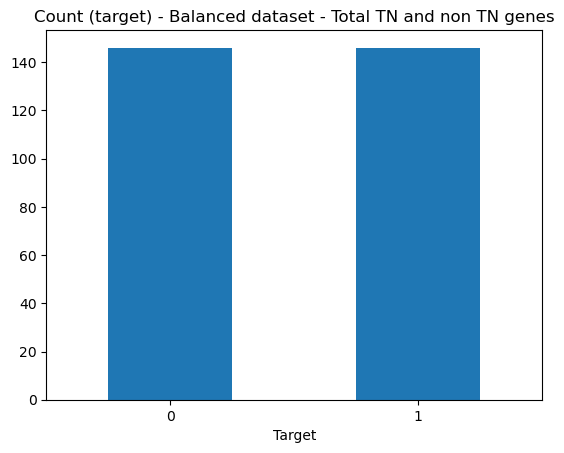

In [46]:
print("total class of 1 and 0:",occurrence_matrix_TNandNONTNrelgenes_q1_BALANCED['Target'].value_counts())# plot the count after under-sampling
occurrence_matrix_TNandNONTNrelgenes_q1_BALANCED['Target'].value_counts().plot(kind='bar', title='Count (target) - Balanced dataset - Total TN and non TN genes', rot=360)

In [47]:
occurrence_matrix_TNandNONTNrelgenes_q1_BALANCED

,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,PIK3CA_Missense_Mutation_545_546,TP53_Nonsense_Mutation_191_199,PIK3CA_Missense_Mutation_541_542,PIK3CA_Missense_Mutation_345_345,TP53_Frame_Shift_Del_211_218,...,NOTCH2_Frame_Shift_Ins_2297_2303,TP53_Frame_Shift_Ins_270_282,TP53_Silent_191_199,PIK3CA_Nonsense_Mutation_418_420,PIK3CA_In_Frame_Ins_102_113,PTEN_Frame_Shift_Ins_317_318,ZKSCAN1_Frame_Shift_Ins_270_270,ZNF195_Missense_Mutation_109_111,MYL10_Splice_Region_26_26,Target
TCGA-B6-A0RO,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_eEtEC7IB,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-E2-A14Q,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBC_35,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-C8-A12P,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBCProject_pktAIxFb,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
brca_smc_2018_BR331,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
X01BR015,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-AN-A0XS,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
occurrence_matrix_TNandNONTNrelgenes_q1_BALANCED.sum(axis=0)

TP53_Missense_Mutation_270_282         42
MAML3_In_Frame_Ins_503_503              4
PIK3CA_Missense_Mutation_1046_1047     67
TP53_Missense_Mutation_173_177         25
TP53_Missense_Mutation_236_258         38
PIK3CA_Missense_Mutation_545_546       21
TP53_Nonsense_Mutation_191_199         12
PIK3CA_Missense_Mutation_541_542       19
PIK3CA_Missense_Mutation_345_345       12
TP53_Frame_Shift_Del_211_218            4
PIK3CA_Missense_Mutation_418_420        3
TP53_Nonsense_Mutation_211_218          9
TP53_Missense_Mutation_191_199         22
PIK3CA_Missense_Mutation_102_113        3
TP53_Frame_Shift_Del_236_258            3
TP53_Missense_Mutation_211_218          6
PTEN_Frame_Shift_Del_317_318            0
TP53_Frame_Shift_Del_191_199            1
PIK3CA_In_Frame_Del_102_113             8
TP53_In_Frame_Del_191_199               2
PIK3CA_In_Frame_Del_418_420             1
TP53_Silent_270_282                     1
MTMR12_Missense_Mutation_520_521        3
NOTCH2_Frame_Shift_Del_2297_2303  

In [49]:
# check if there are zero rows
(occurrence_matrix_TNandNONTNrelgenes_q1_BALANCED.drop('Target', axis=1) == 0).all(axis=1).any()

False

There are not zero rows not considering the Target column: all patients have a mutation in at least one significant gene.

In [50]:
columns_with_all_zero = (occurrence_matrix_TNandNONTNrelgenes_q1_BALANCED == 0).all()
columns_with_all_zero

TP53_Missense_Mutation_270_282        False
MAML3_In_Frame_Ins_503_503            False
PIK3CA_Missense_Mutation_1046_1047    False
TP53_Missense_Mutation_173_177        False
TP53_Missense_Mutation_236_258        False
PIK3CA_Missense_Mutation_545_546      False
TP53_Nonsense_Mutation_191_199        False
PIK3CA_Missense_Mutation_541_542      False
PIK3CA_Missense_Mutation_345_345      False
TP53_Frame_Shift_Del_211_218          False
PIK3CA_Missense_Mutation_418_420      False
TP53_Nonsense_Mutation_211_218        False
TP53_Missense_Mutation_191_199        False
PIK3CA_Missense_Mutation_102_113      False
TP53_Frame_Shift_Del_236_258          False
TP53_Missense_Mutation_211_218        False
PTEN_Frame_Shift_Del_317_318           True
TP53_Frame_Shift_Del_191_199          False
PIK3CA_In_Frame_Del_102_113           False
TP53_In_Frame_Del_191_199             False
PIK3CA_In_Frame_Del_418_420           False
TP53_Silent_270_282                   False
MTMR12_Missense_Mutation_520_521

In [51]:
# check if there are zero columns
(occurrence_matrix_TNandNONTNrelgenes_q1_BALANCED == 0).all().sum()

7

There are 7 columns containing all zero values.

In [52]:
columns_to_drop = occurrence_matrix_TNandNONTNrelgenes_q1_BALANCED.columns[occurrence_matrix_TNandNONTNrelgenes_q1_BALANCED.eq(0).all()]
columns_to_drop

Index(['PTEN_Frame_Shift_Del_317_318', 'PIK3CA_Silent_1046_1047',
       'TP53_Frame_Shift_Del_173_177', 'TP53_Silent_236_258',
       'NOTCH2_Frame_Shift_Ins_2297_2303', 'PIK3CA_Nonsense_Mutation_418_420',
       'PIK3CA_In_Frame_Ins_102_113'],
      dtype='object')

In [53]:
# drop from the dataframe the columns containing all zeros
occurrence_matrix_TNandNONTNrelgenes_q1_BALANCED = occurrence_matrix_TNandNONTNrelgenes_q1_BALANCED.drop(columns_to_drop, axis=1)
occurrence_matrix_TNandNONTNrelgenes_q1_BALANCED

,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,PIK3CA_Missense_Mutation_545_546,TP53_Nonsense_Mutation_191_199,PIK3CA_Missense_Mutation_541_542,PIK3CA_Missense_Mutation_345_345,TP53_Frame_Shift_Del_211_218,...,TP53_Nonsense_Mutation_173_177,MTMR12_Silent_520_521,PIK3CA_Silent_541_542,TP53_Frame_Shift_Ins_270_282,TP53_Silent_191_199,PTEN_Frame_Shift_Ins_317_318,ZKSCAN1_Frame_Shift_Ins_270_270,ZNF195_Missense_Mutation_109_111,MYL10_Splice_Region_26_26,Target
TCGA-B6-A0RO,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_eEtEC7IB,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-E2-A14Q,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBC_35,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-C8-A12P,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBCProject_pktAIxFb,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
brca_smc_2018_BR331,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
X01BR015,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-AN-A0XS,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
# save the BALANCED dataset
#os.chdir("C:/Users/Cristina/OneDrive/Documenti/BCG/Tesi/Occurrence matrix data")
#occurrence_matrix_TNandNONTNrelgenes_q1_BALANCED.to_csv('Occurrence_Matrix_TNandNONTNrelgenes_q1_withLabels_BALANCED_VariantClass_afterMutClust_ONLYclusters.txt', index=True, sep='\t')

# Preparation of training and test set and range normalization

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
import shap

### Manually split the data in training set and test set 

In [56]:
occurrence_matrix_TNandNONTNrelgenes_q1_BALANCED

,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,PIK3CA_Missense_Mutation_545_546,TP53_Nonsense_Mutation_191_199,PIK3CA_Missense_Mutation_541_542,PIK3CA_Missense_Mutation_345_345,TP53_Frame_Shift_Del_211_218,...,TP53_Nonsense_Mutation_173_177,MTMR12_Silent_520_521,PIK3CA_Silent_541_542,TP53_Frame_Shift_Ins_270_282,TP53_Silent_191_199,PTEN_Frame_Shift_Ins_317_318,ZKSCAN1_Frame_Shift_Ins_270_270,ZNF195_Missense_Mutation_109_111,MYL10_Splice_Region_26_26,Target
TCGA-B6-A0RO,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_eEtEC7IB,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-E2-A14Q,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBC_35,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-C8-A12P,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBCProject_pktAIxFb,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
brca_smc_2018_BR331,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
X01BR015,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-AN-A0XS,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
# remove the Target column to the occurrence matrix
X = occurrence_matrix_TNandNONTNrelgenes_q1_BALANCED.drop('Target', axis=1)
X 

,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,PIK3CA_Missense_Mutation_545_546,TP53_Nonsense_Mutation_191_199,PIK3CA_Missense_Mutation_541_542,PIK3CA_Missense_Mutation_345_345,TP53_Frame_Shift_Del_211_218,...,TP53_Nonsense_Mutation_270_282,TP53_Nonsense_Mutation_173_177,MTMR12_Silent_520_521,PIK3CA_Silent_541_542,TP53_Frame_Shift_Ins_270_282,TP53_Silent_191_199,PTEN_Frame_Shift_Ins_317_318,ZKSCAN1_Frame_Shift_Ins_270_270,ZNF195_Missense_Mutation_109_111,MYL10_Splice_Region_26_26
TCGA-B6-A0RO,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_eEtEC7IB,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-E2-A14Q,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBC_35,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-C8-A12P,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBCProject_pktAIxFb,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
brca_smc_2018_BR331,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
X01BR015,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-AN-A0XS,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
# sum each column
X.sum(axis=0)

TP53_Missense_Mutation_270_282        42
MAML3_In_Frame_Ins_503_503             4
PIK3CA_Missense_Mutation_1046_1047    67
TP53_Missense_Mutation_173_177        25
TP53_Missense_Mutation_236_258        38
PIK3CA_Missense_Mutation_545_546      21
TP53_Nonsense_Mutation_191_199        12
PIK3CA_Missense_Mutation_541_542      19
PIK3CA_Missense_Mutation_345_345      12
TP53_Frame_Shift_Del_211_218           4
PIK3CA_Missense_Mutation_418_420       3
TP53_Nonsense_Mutation_211_218         9
TP53_Missense_Mutation_191_199        22
PIK3CA_Missense_Mutation_102_113       3
TP53_Frame_Shift_Del_236_258           3
TP53_Missense_Mutation_211_218         6
TP53_Frame_Shift_Del_191_199           1
PIK3CA_In_Frame_Del_102_113            8
TP53_In_Frame_Del_191_199              2
PIK3CA_In_Frame_Del_418_420            1
TP53_Silent_270_282                    1
MTMR12_Missense_Mutation_520_521       3
NOTCH2_Frame_Shift_Del_2297_2303       4
TP53_Nonsense_Mutation_236_258         1
TP53_In_Frame_De

In [59]:
# select and store the Target column
y = occurrence_matrix_TNandNONTNrelgenes_q1_BALANCED['Target']
y

TCGA-B6-A0RO           0
MBCProject_eEtEC7IB    0
TCGA-E2-A14Q           0
MBC_35                 0
TCGA-C8-A12P           0
                      ..
MBCProject_pktAIxFb    0
brca_smc_2018_BR331    0
X01BR015               0
TCGA-AN-A0XS           0
MBC_159                0
Name: Target, Length: 292, dtype: int64

In [60]:
# consider the balanced occurrence matrix without the pts I want to keep
occurrence_matrix_TNandNONTNrelgenes_q1_BALANCED_selection = occurrence_matrix_TNandNONTNrelgenes_q1_BALANCED[~occurrence_matrix_TNandNONTNrelgenes_q1_BALANCED.index.isin(total_pts_to_keep)]
occurrence_matrix_TNandNONTNrelgenes_q1_BALANCED_selection

,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,PIK3CA_Missense_Mutation_545_546,TP53_Nonsense_Mutation_191_199,PIK3CA_Missense_Mutation_541_542,PIK3CA_Missense_Mutation_345_345,TP53_Frame_Shift_Del_211_218,...,TP53_Nonsense_Mutation_173_177,MTMR12_Silent_520_521,PIK3CA_Silent_541_542,TP53_Frame_Shift_Ins_270_282,TP53_Silent_191_199,PTEN_Frame_Shift_Ins_317_318,ZKSCAN1_Frame_Shift_Ins_270_270,ZNF195_Missense_Mutation_109_111,MYL10_Splice_Region_26_26,Target
TCGA-B6-A0RO,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_eEtEC7IB,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-E2-A14Q,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBC_35,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-C8-A12P,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBCProject_EkHAIECZ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,1
MBCProject_JpCASlSG,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
MBCProject_epUYsdCE,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
MBCProject_lQtMtjFR,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [61]:
occurrence_matrix_TNandNONTNrelgenes_q1_BALANCED_selection['Target'].value_counts()

Target
1    110
0    109
Name: count, dtype: int64

In [62]:
total_training_pts_occ_matrix_balanced = occurrence_matrix_TNandNONTNrelgenes_q1_BALANCED_selection

In [63]:
y_train = total_training_pts_occ_matrix_balanced['Target']
y_train

TCGA-B6-A0RO           0
MBCProject_eEtEC7IB    0
TCGA-E2-A14Q           0
MBC_35                 0
TCGA-C8-A12P           0
                      ..
MBCProject_EkHAIECZ    1
MBCProject_JpCASlSG    1
MBCProject_epUYsdCE    1
MBCProject_lQtMtjFR    1
MBCProject_rJHBiKTl    1
Name: Target, Length: 219, dtype: int64

In [64]:
X_train = total_training_pts_occ_matrix_balanced.drop('Target', axis=1)
X_train

,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,PIK3CA_Missense_Mutation_545_546,TP53_Nonsense_Mutation_191_199,PIK3CA_Missense_Mutation_541_542,PIK3CA_Missense_Mutation_345_345,TP53_Frame_Shift_Del_211_218,...,TP53_Nonsense_Mutation_270_282,TP53_Nonsense_Mutation_173_177,MTMR12_Silent_520_521,PIK3CA_Silent_541_542,TP53_Frame_Shift_Ins_270_282,TP53_Silent_191_199,PTEN_Frame_Shift_Ins_317_318,ZKSCAN1_Frame_Shift_Ins_270_270,ZNF195_Missense_Mutation_109_111,MYL10_Splice_Region_26_26
TCGA-B6-A0RO,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_eEtEC7IB,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-E2-A14Q,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBC_35,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-C8-A12P,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBCProject_EkHAIECZ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
MBCProject_JpCASlSG,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_epUYsdCE,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_lQtMtjFR,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
# consider the balanced occurrence matrix with the pts I want to keep
total_test_pts_occ_matrix_balanced = occurrence_matrix_TNandNONTNrelgenes_q1_BALANCED[occurrence_matrix_TNandNONTNrelgenes_q1_BALANCED.index.isin(total_pts_to_keep)]
total_test_pts_occ_matrix_balanced

,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,PIK3CA_Missense_Mutation_545_546,TP53_Nonsense_Mutation_191_199,PIK3CA_Missense_Mutation_541_542,PIK3CA_Missense_Mutation_345_345,TP53_Frame_Shift_Del_211_218,...,TP53_Nonsense_Mutation_173_177,MTMR12_Silent_520_521,PIK3CA_Silent_541_542,TP53_Frame_Shift_Ins_270_282,TP53_Silent_191_199,PTEN_Frame_Shift_Ins_317_318,ZKSCAN1_Frame_Shift_Ins_270_270,ZNF195_Missense_Mutation_109_111,MYL10_Splice_Region_26_26,Target
brca_smc_2018_BB01_037,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
brca_smc_2018_BB01_110,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
brca_smc_2018_BB01_126,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
BR-M-045,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
PD4133a,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBCProject_pktAIxFb,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
brca_smc_2018_BR331,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
X01BR015,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-AN-A0XS,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [66]:
total_test_pts_occ_matrix_balanced['Target'].value_counts()

Target
0    37
1    36
Name: count, dtype: int64

In [67]:
y_test = total_test_pts_occ_matrix_balanced['Target']
y_test

brca_smc_2018_BB01_037    1
brca_smc_2018_BB01_110    1
brca_smc_2018_BB01_126    1
BR-M-045                  1
PD4133a                   1
                         ..
MBCProject_pktAIxFb       0
brca_smc_2018_BR331       0
X01BR015                  0
TCGA-AN-A0XS              0
MBC_159                   0
Name: Target, Length: 73, dtype: int64

In [68]:
X_test = total_test_pts_occ_matrix_balanced.drop('Target', axis=1)
X_test

,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,PIK3CA_Missense_Mutation_545_546,TP53_Nonsense_Mutation_191_199,PIK3CA_Missense_Mutation_541_542,PIK3CA_Missense_Mutation_345_345,TP53_Frame_Shift_Del_211_218,...,TP53_Nonsense_Mutation_270_282,TP53_Nonsense_Mutation_173_177,MTMR12_Silent_520_521,PIK3CA_Silent_541_542,TP53_Frame_Shift_Ins_270_282,TP53_Silent_191_199,PTEN_Frame_Shift_Ins_317_318,ZKSCAN1_Frame_Shift_Ins_270_270,ZNF195_Missense_Mutation_109_111,MYL10_Splice_Region_26_26
brca_smc_2018_BB01_037,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_110,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_126,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BR-M-045,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
PD4133a,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBCProject_pktAIxFb,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
brca_smc_2018_BR331,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
X01BR015,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-AN-A0XS,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [69]:
X_train.columns[(X_train == 0).all(axis=0)]

Index(['PIK3CA_In_Frame_Del_418_420'], dtype='object')

In [70]:
len(X_train.columns[(X_train == 0).all(axis=0)])

1

There is 1 column in the training dataset with just 0 values. 

In [71]:
X_test

,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,PIK3CA_Missense_Mutation_545_546,TP53_Nonsense_Mutation_191_199,PIK3CA_Missense_Mutation_541_542,PIK3CA_Missense_Mutation_345_345,TP53_Frame_Shift_Del_211_218,...,TP53_Nonsense_Mutation_270_282,TP53_Nonsense_Mutation_173_177,MTMR12_Silent_520_521,PIK3CA_Silent_541_542,TP53_Frame_Shift_Ins_270_282,TP53_Silent_191_199,PTEN_Frame_Shift_Ins_317_318,ZKSCAN1_Frame_Shift_Ins_270_270,ZNF195_Missense_Mutation_109_111,MYL10_Splice_Region_26_26
brca_smc_2018_BB01_037,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_110,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_126,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BR-M-045,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
PD4133a,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBCProject_pktAIxFb,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
brca_smc_2018_BR331,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
X01BR015,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-AN-A0XS,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [72]:
X_test.columns[(X_test == 0).all(axis=0)]

Index(['MAML3_In_Frame_Ins_503_503', 'TP53_Frame_Shift_Del_211_218',
       'PIK3CA_Missense_Mutation_418_420', 'TP53_Nonsense_Mutation_211_218',
       'TP53_Missense_Mutation_211_218', 'TP53_Frame_Shift_Del_191_199',
       'TP53_In_Frame_Del_191_199', 'TP53_Silent_270_282',
       'TP53_Nonsense_Mutation_236_258', 'TP53_In_Frame_Del_173_177',
       'TP53_Frame_Shift_Del_270_282', 'TP53_In_Frame_Del_211_218',
       'PIK3R1_In_Frame_Ins_566_578', 'PIK3R1_In_Frame_Del_566_578',
       'TP53_Nonsense_Mutation_270_282', 'TP53_Nonsense_Mutation_173_177',
       'MTMR12_Silent_520_521', 'PIK3CA_Silent_541_542',
       'TP53_Frame_Shift_Ins_270_282', 'TP53_Silent_191_199',
       'PTEN_Frame_Shift_Ins_317_318', 'ZNF195_Missense_Mutation_109_111',
       'MYL10_Splice_Region_26_26'],
      dtype='object')

In [73]:
len(X_test.columns[(X_test == 0).all(axis=0)])

23

There are 23 columns in the test dataset with just zero values.

In [74]:
y_train.value_counts()

Target
1    110
0    109
Name: count, dtype: int64

In [75]:
y_test.value_counts()

Target
0    37
1    36
Name: count, dtype: int64

In [76]:
# range-normalization on the training set 
def range_norm_training(x):
    return (x - x.min()) / (x.max() - x.min())

In [77]:
# apply this normalization column-wise to the training 
normalized_X_train = X_train.apply(range_norm_training, axis=0)
normalized_X_train

,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,PIK3CA_Missense_Mutation_545_546,TP53_Nonsense_Mutation_191_199,PIK3CA_Missense_Mutation_541_542,PIK3CA_Missense_Mutation_345_345,TP53_Frame_Shift_Del_211_218,...,TP53_Nonsense_Mutation_270_282,TP53_Nonsense_Mutation_173_177,MTMR12_Silent_520_521,PIK3CA_Silent_541_542,TP53_Frame_Shift_Ins_270_282,TP53_Silent_191_199,PTEN_Frame_Shift_Ins_317_318,ZKSCAN1_Frame_Shift_Ins_270_270,ZNF195_Missense_Mutation_109_111,MYL10_Splice_Region_26_26
TCGA-B6-A0RO,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MBCProject_eEtEC7IB,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TCGA-E2-A14Q,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MBC_35,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TCGA-C8-A12P,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBCProject_EkHAIECZ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
MBCProject_JpCASlSG,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MBCProject_epUYsdCE,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MBCProject_lQtMtjFR,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [78]:
# check the columns containing just Nan Values 
normalized_X_train.isna().all(axis=0).sum()

1

1 column contains NaN values, that are the columns with all zero values in the training set.

In [79]:
np.isinf(normalized_X_train).any().any()

False

In [80]:
# replace the NaN values with zero 
normalized_X_train = normalized_X_train.fillna(0)
normalized_X_train

,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,PIK3CA_Missense_Mutation_545_546,TP53_Nonsense_Mutation_191_199,PIK3CA_Missense_Mutation_541_542,PIK3CA_Missense_Mutation_345_345,TP53_Frame_Shift_Del_211_218,...,TP53_Nonsense_Mutation_270_282,TP53_Nonsense_Mutation_173_177,MTMR12_Silent_520_521,PIK3CA_Silent_541_542,TP53_Frame_Shift_Ins_270_282,TP53_Silent_191_199,PTEN_Frame_Shift_Ins_317_318,ZKSCAN1_Frame_Shift_Ins_270_270,ZNF195_Missense_Mutation_109_111,MYL10_Splice_Region_26_26
TCGA-B6-A0RO,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MBCProject_eEtEC7IB,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TCGA-E2-A14Q,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MBC_35,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TCGA-C8-A12P,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBCProject_EkHAIECZ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
MBCProject_JpCASlSG,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MBCProject_epUYsdCE,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
MBCProject_lQtMtjFR,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [81]:
training_pts_list = normalized_X_train.index.tolist()
training_pts_list

['TCGA-B6-A0RO',
 'MBCProject_eEtEC7IB',
 'TCGA-E2-A14Q',
 'MBC_35',
 'TCGA-C8-A12P',
 'X20BR002',
 'brca_smc_2018_BB01_028',
 'MBC_198',
 'TCGA-C8-A1HK',
 'X21BR010',
 'MBC_194',
 'TCGA-BH-A18F',
 'brca_smc_2018_BR112',
 'TCGA-B6-A0IK',
 'MBCProject_mMhdcrh5',
 'brca_smc_2018_BB01_046',
 'MBCProject_6QhZF6ur',
 'TCGA-S3-AA14',
 'MBC_8',
 'MBC_196',
 'PD4102a',
 'MBC_23',
 'TCGA-AN-A03X',
 'TCGA-C8-A12W',
 'TCGA-A2-A0CP',
 'MBCProject_beTYUZij',
 'TCGA-AN-A0FV',
 'BR-V-024',
 'MBCProject_m9SNc1Iq',
 'TCGA-A8-A07Z',
 'MBC_22',
 'PD3857a',
 'MBC_17',
 'brca_smc_2018_BR128',
 'TCGA-E2-A1L6',
 'TCGA-BH-A0HU',
 'TCGA-E2-A109',
 'MBCProject_4DIpSBFV',
 'brca_smc_2018_BR107',
 'MBCProject_gKsRsqTR',
 'TCGA-AN-A0XP',
 'brca_smc_2018_BB01_036',
 'MBC_180',
 'MBCProject_Y7fYC1iG',
 'brca_smc_2018_BR386',
 'TCGA-C8-A12L',
 'brca_smc_2018_BB01_081',
 'TCGA-A8-A09N',
 'brca_smc_2018_BB01_131',
 'BR-M-169',
 'MBCProject_oNI6SXtq',
 'TCGA-AN-A03Y',
 'brca_smc_2018_BB01_062',
 'X11BR004',
 'TCGA-C8-A1

In [82]:
# Create a new DataFrame with the patient indices
training_pts_df = pd.DataFrame({'Patient': training_pts_list})
training_pts_df

,Patient
0,TCGA-B6-A0RO
1,MBCProject_eEtEC7IB
2,TCGA-E2-A14Q
3,MBC_35
4,TCGA-C8-A12P
...,...
214,MBCProject_EkHAIECZ
215,MBCProject_JpCASlSG
216,MBCProject_epUYsdCE
217,MBCProject_lQtMtjFR


In [83]:
os.chdir("C:/Users/Cristina/OneDrive/Documenti/BCG/Tesi/Training_patients")
# save the training patients 
training_pts_df.to_csv('Training_onlyTNpts_onlyclusters_q1.txt', index=False, sep='\t')

In [84]:
normalized_X_train.isna().any().any()

False

In [85]:
normalized_X_train.sum(axis=0)

TP53_Missense_Mutation_270_282        31.0
MAML3_In_Frame_Ins_503_503             4.0
PIK3CA_Missense_Mutation_1046_1047    49.0
TP53_Missense_Mutation_173_177        13.0
TP53_Missense_Mutation_236_258        15.0
PIK3CA_Missense_Mutation_545_546      15.0
TP53_Nonsense_Mutation_191_199         9.0
PIK3CA_Missense_Mutation_541_542       7.0
PIK3CA_Missense_Mutation_345_345       4.0
TP53_Frame_Shift_Del_211_218           4.0
PIK3CA_Missense_Mutation_418_420       3.0
TP53_Nonsense_Mutation_211_218         9.0
TP53_Missense_Mutation_191_199        18.0
PIK3CA_Missense_Mutation_102_113       2.0
TP53_Frame_Shift_Del_236_258           2.0
TP53_Missense_Mutation_211_218         6.0
TP53_Frame_Shift_Del_191_199           1.0
PIK3CA_In_Frame_Del_102_113            7.0
TP53_In_Frame_Del_191_199              2.0
PIK3CA_In_Frame_Del_418_420            0.0
TP53_Silent_270_282                    1.0
MTMR12_Missense_Mutation_520_521       1.0
NOTCH2_Frame_Shift_Del_2297_2303       3.0
TP53_Nonsen

In [86]:
normalized_X_train.sum(axis=0).sum()

241.0

In [87]:
# define a function to perform range normalization on the test set based on the values of the training set 
def range_norm_test(train_set, test_set):
    #compute the minimum and the maximum values for each column in the training 
    min_value = train_set.min(axis=0)
    max_value = train_set.max(axis=0)
    # Apply range normalization to the test set based on the min and the max of the training set 
    normalized_test_set = (test_set - min_value) / (max_value - min_value)
    
    return normalized_test_set

# NOTE: it is not necessary to check if the minimum of the test is > than the minimum of the training, since the minimum values in each column both for the test and for the training are zeros

In [88]:
normalized_X_test = range_norm_test(X_train, X_test)
normalized_X_test

,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,PIK3CA_Missense_Mutation_545_546,TP53_Nonsense_Mutation_191_199,PIK3CA_Missense_Mutation_541_542,PIK3CA_Missense_Mutation_345_345,TP53_Frame_Shift_Del_211_218,...,TP53_Nonsense_Mutation_270_282,TP53_Nonsense_Mutation_173_177,MTMR12_Silent_520_521,PIK3CA_Silent_541_542,TP53_Frame_Shift_Ins_270_282,TP53_Silent_191_199,PTEN_Frame_Shift_Ins_317_318,ZKSCAN1_Frame_Shift_Ins_270_270,ZNF195_Missense_Mutation_109_111,MYL10_Splice_Region_26_26
brca_smc_2018_BB01_037,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
brca_smc_2018_BB01_110,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
brca_smc_2018_BB01_126,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BR-M-045,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
PD4133a,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBCProject_pktAIxFb,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
brca_smc_2018_BR331,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
X01BR015,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TCGA-AN-A0XS,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [89]:
test_pts_list = normalized_X_test.index.tolist()
test_pts_list

['brca_smc_2018_BB01_037',
 'brca_smc_2018_BB01_110',
 'brca_smc_2018_BB01_126',
 'BR-M-045',
 'PD4133a',
 'X18BR002',
 'X20BR008',
 'TCGA-A2-A0D0',
 'TCGA-AC-A6IW',
 'TCGA-AN-A0AL',
 'TCGA-AO-A129',
 'TCGA-AR-A0TP',
 'TCGA-AR-A1AJ',
 'TCGA-B6-A0I1',
 'TCGA-B6-A409',
 'TCGA-BH-A0E0',
 'TCGA-C8-A131',
 'TCGA-C8-A1HJ',
 'TCGA-C8-A27B',
 'TCGA-D8-A142',
 'TCGA-D8-A27F',
 'TCGA-E2-A14R',
 'TCGA-E2-A14Y',
 'TCGA-E9-A1N8',
 'TCGA-E9-A244',
 'TCGA-OL-A5S0',
 'MBC_163',
 'MBC_167',
 'MBC_10',
 'MBC_31',
 'MBC_33',
 'MBC_60',
 'MBC_182',
 'MBC_204',
 'MBCProject_d5CbUNTb',
 'MBCProject_oqupfDu7',
 'brca_smc_2018_BB01_017',
 'brca_smc_2018_BB01_130',
 'brca_smc_2018_BR371',
 'X11BR011',
 'X11BR014',
 'X21BR002',
 'TCGA-A1-A0SI',
 'TCGA-A2-A0CL',
 'TCGA-A2-A0EQ',
 'TCGA-A2-A0YH',
 'TCGA-A2-A0YI',
 'TCGA-A7-A0DB',
 'TCGA-A8-A093',
 'TCGA-AC-A23E',
 'TCGA-AO-A03L',
 'TCGA-AO-A03M',
 'TCGA-AO-A0J2',
 'TCGA-AR-A1AV',
 'TCGA-AR-A24S',
 'TCGA-B6-A0X5',
 'TCGA-B6-A401',
 'TCGA-BH-A0BJ',
 'TCGA-BH-A0BO',

In [90]:
# Create a new DataFrame with the patient indices
test_pts_df = pd.DataFrame({'Patient': test_pts_list})
test_pts_df

,Patient
0,brca_smc_2018_BB01_037
1,brca_smc_2018_BB01_110
2,brca_smc_2018_BB01_126
3,BR-M-045
4,PD4133a
...,...
68,MBCProject_pktAIxFb
69,brca_smc_2018_BR331
70,X01BR015
71,TCGA-AN-A0XS


In [91]:
os.chdir("C:/Users/Cristina/OneDrive/Documenti/BCG/Tesi/Test_patients")
# save the training patients 
test_pts_df.to_csv('Test_onlyTNpts_onlyclusters_q1.txt', index=False, sep='\t')

In [92]:
np.isinf(normalized_X_test).any().any()

True

In [93]:
# check the columns containing just Nan Values 
normalized_X_test.isna().all(axis=0).sum()

0

In [94]:
# check how many columns contain all infinite values 
np.isinf(normalized_X_test).any().sum()

1

1 as the number of zero columns in the training set 

In [95]:
# replace the Infinite values with zero 
normalized_X_test = normalized_X_test.replace([np.inf, -np.inf], 0)
normalized_X_test

,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,PIK3CA_Missense_Mutation_545_546,TP53_Nonsense_Mutation_191_199,PIK3CA_Missense_Mutation_541_542,PIK3CA_Missense_Mutation_345_345,TP53_Frame_Shift_Del_211_218,...,TP53_Nonsense_Mutation_270_282,TP53_Nonsense_Mutation_173_177,MTMR12_Silent_520_521,PIK3CA_Silent_541_542,TP53_Frame_Shift_Ins_270_282,TP53_Silent_191_199,PTEN_Frame_Shift_Ins_317_318,ZKSCAN1_Frame_Shift_Ins_270_270,ZNF195_Missense_Mutation_109_111,MYL10_Splice_Region_26_26
brca_smc_2018_BB01_037,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
brca_smc_2018_BB01_110,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
brca_smc_2018_BB01_126,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BR-M-045,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
PD4133a,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBCProject_pktAIxFb,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
brca_smc_2018_BR331,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
X01BR015,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TCGA-AN-A0XS,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [96]:
# replace the NaN values with zero 
normalized_X_test = normalized_X_test.fillna(0)
normalized_X_test

,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,PIK3CA_Missense_Mutation_545_546,TP53_Nonsense_Mutation_191_199,PIK3CA_Missense_Mutation_541_542,PIK3CA_Missense_Mutation_345_345,TP53_Frame_Shift_Del_211_218,...,TP53_Nonsense_Mutation_270_282,TP53_Nonsense_Mutation_173_177,MTMR12_Silent_520_521,PIK3CA_Silent_541_542,TP53_Frame_Shift_Ins_270_282,TP53_Silent_191_199,PTEN_Frame_Shift_Ins_317_318,ZKSCAN1_Frame_Shift_Ins_270_270,ZNF195_Missense_Mutation_109_111,MYL10_Splice_Region_26_26
brca_smc_2018_BB01_037,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
brca_smc_2018_BB01_110,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
brca_smc_2018_BB01_126,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
BR-M-045,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
PD4133a,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBCProject_pktAIxFb,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
brca_smc_2018_BR331,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
X01BR015,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TCGA-AN-A0XS,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [97]:
np.isinf(normalized_X_test).any().sum()

0

In [98]:
normalized_X_test.isnull().all(axis=0).sum()

0

### Select the test patients 


In [99]:
# Extract the row indices as a list
test_patient_indices = normalized_X_test.index.tolist()
test_patient_indices

['brca_smc_2018_BB01_037',
 'brca_smc_2018_BB01_110',
 'brca_smc_2018_BB01_126',
 'BR-M-045',
 'PD4133a',
 'X18BR002',
 'X20BR008',
 'TCGA-A2-A0D0',
 'TCGA-AC-A6IW',
 'TCGA-AN-A0AL',
 'TCGA-AO-A129',
 'TCGA-AR-A0TP',
 'TCGA-AR-A1AJ',
 'TCGA-B6-A0I1',
 'TCGA-B6-A409',
 'TCGA-BH-A0E0',
 'TCGA-C8-A131',
 'TCGA-C8-A1HJ',
 'TCGA-C8-A27B',
 'TCGA-D8-A142',
 'TCGA-D8-A27F',
 'TCGA-E2-A14R',
 'TCGA-E2-A14Y',
 'TCGA-E9-A1N8',
 'TCGA-E9-A244',
 'TCGA-OL-A5S0',
 'MBC_163',
 'MBC_167',
 'MBC_10',
 'MBC_31',
 'MBC_33',
 'MBC_60',
 'MBC_182',
 'MBC_204',
 'MBCProject_d5CbUNTb',
 'MBCProject_oqupfDu7',
 'brca_smc_2018_BB01_017',
 'brca_smc_2018_BB01_130',
 'brca_smc_2018_BR371',
 'X11BR011',
 'X11BR014',
 'X21BR002',
 'TCGA-A1-A0SI',
 'TCGA-A2-A0CL',
 'TCGA-A2-A0EQ',
 'TCGA-A2-A0YH',
 'TCGA-A2-A0YI',
 'TCGA-A7-A0DB',
 'TCGA-A8-A093',
 'TCGA-AC-A23E',
 'TCGA-AO-A03L',
 'TCGA-AO-A03M',
 'TCGA-AO-A0J2',
 'TCGA-AR-A1AV',
 'TCGA-AR-A24S',
 'TCGA-B6-A0X5',
 'TCGA-B6-A401',
 'TCGA-BH-A0BJ',
 'TCGA-BH-A0BO',

In [100]:
# Create a new DataFrame with the patient indices
test_patient_df = pd.DataFrame({'Patient': test_patient_indices})
test_patient_df

,Patient
0,brca_smc_2018_BB01_037
1,brca_smc_2018_BB01_110
2,brca_smc_2018_BB01_126
3,BR-M-045
4,PD4133a
...,...
68,MBCProject_pktAIxFb
69,brca_smc_2018_BR331
70,X01BR015
71,TCGA-AN-A0XS


In [101]:
#brca_smc_2018_BB01_119
test_patient_df.loc[test_patient_df['Patient']=='MBCProject_xlhkS5CG']

,Patient


In [102]:
# load the test patients from 5A
os.chdir("C:/Users/Cristina/OneDrive/Documenti/BCG/Tesi/Test_patients")
test_pts_5A = pd.read_csv('Test_pts_5A.txt', sep=',', engine='python')
test_pts_5A

,Patient
0,brca_smc_2018_BB01_130
1,brca_smc_2018_BB01_110
2,brca_smc_2018_BB01_037
3,brca_smc_2018_BB01_126
4,brca_smc_2018_BR097
...,...
139,MBCProject_27uAugT4
140,MBCProject_2kS5fYc1
141,MBCProject_7oIotZSe
142,MBCProject_LVSjf8h7


In [103]:
# study the intersection between 6B test pts and 5A test pts
test_pts_6B_and_5A = pd.merge(test_patient_df, test_pts_5A, how='inner', on=['Patient'])
test_pts_6B_and_5A

,Patient
0,brca_smc_2018_BB01_037
1,brca_smc_2018_BB01_110
2,brca_smc_2018_BB01_126
3,BR-M-045
4,PD4133a
...,...
68,MBCProject_pktAIxFb
69,brca_smc_2018_BR331
70,X01BR015
71,TCGA-AN-A0XS


In [104]:
# which are the two test patients contained in 6B and NOT in 5A
test_pts_6B_NOTin_5A = test_patient_df[~test_patient_df['Patient'].isin(test_pts_5A['Patient'])]
test_pts_6B_NOTin_5A

,Patient


### Study the intersection between these patients and the only cluster test patients

In [105]:
pd.merge(test_patient_df, onlyclusters_TN_test_pts_p005, how='inner', on=['Patient'])

,Patient
0,brca_smc_2018_BB01_037
1,brca_smc_2018_BB01_110
2,brca_smc_2018_BB01_126
3,PD4133a
4,X18BR002
...,...
59,MBC_128
60,MBC_72
61,MBC_183
62,MBC_199


### Extracting the features

In [106]:
tot_features = normalized_X_train.columns.tolist()
tot_features

['TP53_Missense_Mutation_270_282',
 'MAML3_In_Frame_Ins_503_503',
 'PIK3CA_Missense_Mutation_1046_1047',
 'TP53_Missense_Mutation_173_177',
 'TP53_Missense_Mutation_236_258',
 'PIK3CA_Missense_Mutation_545_546',
 'TP53_Nonsense_Mutation_191_199',
 'PIK3CA_Missense_Mutation_541_542',
 'PIK3CA_Missense_Mutation_345_345',
 'TP53_Frame_Shift_Del_211_218',
 'PIK3CA_Missense_Mutation_418_420',
 'TP53_Nonsense_Mutation_211_218',
 'TP53_Missense_Mutation_191_199',
 'PIK3CA_Missense_Mutation_102_113',
 'TP53_Frame_Shift_Del_236_258',
 'TP53_Missense_Mutation_211_218',
 'TP53_Frame_Shift_Del_191_199',
 'PIK3CA_In_Frame_Del_102_113',
 'TP53_In_Frame_Del_191_199',
 'PIK3CA_In_Frame_Del_418_420',
 'TP53_Silent_270_282',
 'MTMR12_Missense_Mutation_520_521',
 'NOTCH2_Frame_Shift_Del_2297_2303',
 'TP53_Nonsense_Mutation_236_258',
 'TP53_In_Frame_Del_173_177',
 'TP53_Frame_Shift_Del_270_282',
 'TP53_In_Frame_Del_211_218',
 'PIK3R1_In_Frame_Ins_566_578',
 'TP53_Frame_Shift_Ins_236_258',
 'PIK3R1_In_Fram

In [107]:
# Convert the list into a dataframe 
tot_features_df = pd.DataFrame({'Features': tot_features})
tot_features_df

,Features
0,TP53_Missense_Mutation_270_282
1,MAML3_In_Frame_Ins_503_503
2,PIK3CA_Missense_Mutation_1046_1047
3,TP53_Missense_Mutation_173_177
4,TP53_Missense_Mutation_236_258
5,PIK3CA_Missense_Mutation_545_546
6,TP53_Nonsense_Mutation_191_199
7,PIK3CA_Missense_Mutation_541_542
8,PIK3CA_Missense_Mutation_345_345
9,TP53_Frame_Shift_Del_211_218


In [108]:
os.chdir("C:/Users/Cristina/OneDrive/Documenti/BCG/Tesi/Significant features")
# save the features 
tot_features_df.to_csv('6B_features.txt', index=False, sep='\t')

#### Extract only the Hugo Symbol from the features 

In [109]:
tot_features_df['Hugo_Symbol'] = tot_features_df['Features'].str.split('_').str[0]
tot_features_df

,Features,Hugo_Symbol
0,TP53_Missense_Mutation_270_282,TP53
1,MAML3_In_Frame_Ins_503_503,MAML3
2,PIK3CA_Missense_Mutation_1046_1047,PIK3CA
3,TP53_Missense_Mutation_173_177,TP53
4,TP53_Missense_Mutation_236_258,TP53
5,PIK3CA_Missense_Mutation_545_546,PIK3CA
6,TP53_Nonsense_Mutation_191_199,TP53
7,PIK3CA_Missense_Mutation_541_542,PIK3CA
8,PIK3CA_Missense_Mutation_345_345,PIK3CA
9,TP53_Frame_Shift_Del_211_218,TP53


In [110]:
tot_features_df_onlyHugo = tot_features_df[['Hugo_Symbol']]
tot_features_df_onlyHugo

,Hugo_Symbol
0,TP53
1,MAML3
2,PIK3CA
3,TP53
4,TP53
5,PIK3CA
6,TP53
7,PIK3CA
8,PIK3CA
9,TP53


In [111]:
tot_features_df_onlyHugo.duplicated().sum()

30

In [112]:
# consider just unique genes - drop duplicates 
tot_features_df_onlyHugo_nodup = tot_features_df_onlyHugo.drop_duplicates()
tot_features_df_onlyHugo_nodup

,Hugo_Symbol
0,TP53
1,MAML3
2,PIK3CA
21,MTMR12
22,NOTCH2
27,PIK3R1
36,PTEN
37,ZKSCAN1
38,ZNF195
39,MYL10


In [113]:
tot_features_df_onlyHugo_nodup.shape

(10, 1)

In [114]:
os.chdir("C:/Users/Cristina/OneDrive/Documenti/BCG/Tesi/Significant features")
# save the genes features 
tot_features_df_onlyHugo_nodup.to_csv('6B_features_onlygenes.txt', index=False, sep='\t')

### Study the distribution of the features in TN and NON TN patients separately

In [115]:
occurrence_matrix_TNandNONTNrelgenes_q1_BALANCED

,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,PIK3CA_Missense_Mutation_545_546,TP53_Nonsense_Mutation_191_199,PIK3CA_Missense_Mutation_541_542,PIK3CA_Missense_Mutation_345_345,TP53_Frame_Shift_Del_211_218,...,TP53_Nonsense_Mutation_173_177,MTMR12_Silent_520_521,PIK3CA_Silent_541_542,TP53_Frame_Shift_Ins_270_282,TP53_Silent_191_199,PTEN_Frame_Shift_Ins_317_318,ZKSCAN1_Frame_Shift_Ins_270_270,ZNF195_Missense_Mutation_109_111,MYL10_Splice_Region_26_26,Target
TCGA-B6-A0RO,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_eEtEC7IB,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-E2-A14Q,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBC_35,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-C8-A12P,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBCProject_pktAIxFb,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
brca_smc_2018_BR331,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
X01BR015,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-AN-A0XS,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [116]:
occurrence_matrix_TNandNONTNrelgenes_q1_BALANCED['Target'].value_counts()

Target
0    146
1    146
Name: count, dtype: int64

In [117]:
# separate the TN from the NON TN patients creating two distinct occurrence matrices
# Create an occurrence matrix with only triple-negative breast cancer patients (target=1)
occurrence_matrix_balanced_onlyTN = occurrence_matrix_TNandNONTNrelgenes_q1_BALANCED[occurrence_matrix_TNandNONTNrelgenes_q1_BALANCED['Target'] == 1]
occurrence_matrix_balanced_onlyTN

,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,PIK3CA_Missense_Mutation_545_546,TP53_Nonsense_Mutation_191_199,PIK3CA_Missense_Mutation_541_542,PIK3CA_Missense_Mutation_345_345,TP53_Frame_Shift_Del_211_218,...,TP53_Nonsense_Mutation_173_177,MTMR12_Silent_520_521,PIK3CA_Silent_541_542,TP53_Frame_Shift_Ins_270_282,TP53_Silent_191_199,PTEN_Frame_Shift_Ins_317_318,ZKSCAN1_Frame_Shift_Ins_270_270,ZNF195_Missense_Mutation_109_111,MYL10_Splice_Region_26_26,Target
brca_smc_2018_BB01_004,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
brca_smc_2018_BB01_037,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
brca_smc_2018_BB01_041,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
brca_smc_2018_BB01_059,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
brca_smc_2018_BB01_067,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBCProject_d5CbUNTb,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
MBCProject_epUYsdCE,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
MBCProject_lQtMtjFR,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
MBCProject_oqupfDu7,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [118]:
# remove the Target column
occurrence_matrix_balanced_onlyTN_notarget = occurrence_matrix_balanced_onlyTN.drop('Target', axis=1)
occurrence_matrix_balanced_onlyTN_notarget

,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,PIK3CA_Missense_Mutation_545_546,TP53_Nonsense_Mutation_191_199,PIK3CA_Missense_Mutation_541_542,PIK3CA_Missense_Mutation_345_345,TP53_Frame_Shift_Del_211_218,...,TP53_Nonsense_Mutation_270_282,TP53_Nonsense_Mutation_173_177,MTMR12_Silent_520_521,PIK3CA_Silent_541_542,TP53_Frame_Shift_Ins_270_282,TP53_Silent_191_199,PTEN_Frame_Shift_Ins_317_318,ZKSCAN1_Frame_Shift_Ins_270_270,ZNF195_Missense_Mutation_109_111,MYL10_Splice_Region_26_26
brca_smc_2018_BB01_004,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_037,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_041,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_059,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
brca_smc_2018_BB01_067,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBCProject_d5CbUNTb,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_epUYsdCE,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_lQtMtjFR,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_oqupfDu7,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [119]:
feature_distribution_TN = occurrence_matrix_balanced_onlyTN_notarget.sum(axis=0)
feature_distribution_TN

TP53_Missense_Mutation_270_282        29
MAML3_In_Frame_Ins_503_503             3
PIK3CA_Missense_Mutation_1046_1047    17
TP53_Missense_Mutation_173_177        15
TP53_Missense_Mutation_236_258        27
PIK3CA_Missense_Mutation_545_546       3
TP53_Nonsense_Mutation_191_199        10
PIK3CA_Missense_Mutation_541_542       4
PIK3CA_Missense_Mutation_345_345       1
TP53_Frame_Shift_Del_211_218           2
PIK3CA_Missense_Mutation_418_420       0
TP53_Nonsense_Mutation_211_218         7
TP53_Missense_Mutation_191_199        16
PIK3CA_Missense_Mutation_102_113       1
TP53_Frame_Shift_Del_236_258           2
TP53_Missense_Mutation_211_218         3
TP53_Frame_Shift_Del_191_199           1
PIK3CA_In_Frame_Del_102_113            3
TP53_In_Frame_Del_191_199              1
PIK3CA_In_Frame_Del_418_420            0
TP53_Silent_270_282                    1
MTMR12_Missense_Mutation_520_521       3
NOTCH2_Frame_Shift_Del_2297_2303       4
TP53_Nonsense_Mutation_236_258         1
TP53_In_Frame_De

In [120]:
# convert the Series into a Dataframe 
df_feature_distribution_TN = feature_distribution_TN.to_frame()
df_feature_distribution_TN.rename(columns = {0:'Mutation count per feature'}, inplace = True)
df_feature_distribution_TN

,Mutation count per feature
TP53_Missense_Mutation_270_282,29
MAML3_In_Frame_Ins_503_503,3
PIK3CA_Missense_Mutation_1046_1047,17
TP53_Missense_Mutation_173_177,15
TP53_Missense_Mutation_236_258,27
PIK3CA_Missense_Mutation_545_546,3
TP53_Nonsense_Mutation_191_199,10
PIK3CA_Missense_Mutation_541_542,4
PIK3CA_Missense_Mutation_345_345,1
TP53_Frame_Shift_Del_211_218,2


In [121]:
df_feature_distribution_TN = df_feature_distribution_TN.reset_index()
df_feature_distribution_TN.rename(columns = {'index':'Feature'}, inplace = True)
df_feature_distribution_TN

,Feature,Mutation count per feature
0,TP53_Missense_Mutation_270_282,29
1,MAML3_In_Frame_Ins_503_503,3
2,PIK3CA_Missense_Mutation_1046_1047,17
3,TP53_Missense_Mutation_173_177,15
4,TP53_Missense_Mutation_236_258,27
5,PIK3CA_Missense_Mutation_545_546,3
6,TP53_Nonsense_Mutation_191_199,10
7,PIK3CA_Missense_Mutation_541_542,4
8,PIK3CA_Missense_Mutation_345_345,1
9,TP53_Frame_Shift_Del_211_218,2


In [122]:
# sort the dataframe for decreasing order of mutation count per feature
df_feature_distribution_TN_sorted = df_feature_distribution_TN.sort_values(by='Mutation count per feature', ascending=False)
df_feature_distribution_TN_sorted = df_feature_distribution_TN_sorted.reset_index()
df_feature_distribution_TN_sorted = df_feature_distribution_TN_sorted.drop(columns='index')
df_feature_distribution_TN_sorted

,Feature,Mutation count per feature
0,TP53_Missense_Mutation_270_282,29
1,TP53_Missense_Mutation_236_258,27
2,PIK3CA_Missense_Mutation_1046_1047,17
3,TP53_Missense_Mutation_191_199,16
4,TP53_Missense_Mutation_173_177,15
5,TP53_Nonsense_Mutation_191_199,10
6,TP53_Nonsense_Mutation_211_218,7
7,TP53_Frame_Shift_Ins_236_258,6
8,PIK3CA_Missense_Mutation_541_542,4
9,NOTCH2_Frame_Shift_Del_2297_2303,4


In [123]:
# Create an occurrence matrix with only triple-negative breast cancer patients (target=1)
occurrence_matrix_balanced_onlyNONTN = occurrence_matrix_TNandNONTNrelgenes_q1_BALANCED[occurrence_matrix_TNandNONTNrelgenes_q1_BALANCED['Target'] == 0]
occurrence_matrix_balanced_onlyNONTN

,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,PIK3CA_Missense_Mutation_545_546,TP53_Nonsense_Mutation_191_199,PIK3CA_Missense_Mutation_541_542,PIK3CA_Missense_Mutation_345_345,TP53_Frame_Shift_Del_211_218,...,TP53_Nonsense_Mutation_173_177,MTMR12_Silent_520_521,PIK3CA_Silent_541_542,TP53_Frame_Shift_Ins_270_282,TP53_Silent_191_199,PTEN_Frame_Shift_Ins_317_318,ZKSCAN1_Frame_Shift_Ins_270_270,ZNF195_Missense_Mutation_109_111,MYL10_Splice_Region_26_26,Target
TCGA-B6-A0RO,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_eEtEC7IB,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-E2-A14Q,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBC_35,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-C8-A12P,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBCProject_pktAIxFb,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
brca_smc_2018_BR331,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
X01BR015,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-AN-A0XS,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [124]:
# remove the Target column
occurrence_matrix_balanced_onlyNONTN_notarget = occurrence_matrix_balanced_onlyNONTN.drop('Target', axis=1)
occurrence_matrix_balanced_onlyNONTN_notarget

,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,PIK3CA_Missense_Mutation_545_546,TP53_Nonsense_Mutation_191_199,PIK3CA_Missense_Mutation_541_542,PIK3CA_Missense_Mutation_345_345,TP53_Frame_Shift_Del_211_218,...,TP53_Nonsense_Mutation_270_282,TP53_Nonsense_Mutation_173_177,MTMR12_Silent_520_521,PIK3CA_Silent_541_542,TP53_Frame_Shift_Ins_270_282,TP53_Silent_191_199,PTEN_Frame_Shift_Ins_317_318,ZKSCAN1_Frame_Shift_Ins_270_270,ZNF195_Missense_Mutation_109_111,MYL10_Splice_Region_26_26
TCGA-B6-A0RO,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_eEtEC7IB,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-E2-A14Q,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBC_35,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-C8-A12P,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBCProject_pktAIxFb,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
brca_smc_2018_BR331,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
X01BR015,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-AN-A0XS,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [125]:
feature_distribution_NONTN = occurrence_matrix_balanced_onlyNONTN_notarget.sum(axis=0)
feature_distribution_NONTN

TP53_Missense_Mutation_270_282        13
MAML3_In_Frame_Ins_503_503             1
PIK3CA_Missense_Mutation_1046_1047    50
TP53_Missense_Mutation_173_177        10
TP53_Missense_Mutation_236_258        11
PIK3CA_Missense_Mutation_545_546      18
TP53_Nonsense_Mutation_191_199         2
PIK3CA_Missense_Mutation_541_542      15
PIK3CA_Missense_Mutation_345_345      11
TP53_Frame_Shift_Del_211_218           2
PIK3CA_Missense_Mutation_418_420       3
TP53_Nonsense_Mutation_211_218         2
TP53_Missense_Mutation_191_199         6
PIK3CA_Missense_Mutation_102_113       2
TP53_Frame_Shift_Del_236_258           1
TP53_Missense_Mutation_211_218         3
TP53_Frame_Shift_Del_191_199           0
PIK3CA_In_Frame_Del_102_113            5
TP53_In_Frame_Del_191_199              1
PIK3CA_In_Frame_Del_418_420            1
TP53_Silent_270_282                    0
MTMR12_Missense_Mutation_520_521       0
NOTCH2_Frame_Shift_Del_2297_2303       0
TP53_Nonsense_Mutation_236_258         0
TP53_In_Frame_De

In [126]:
# convert the Series into a Dataframe 
df_feature_distribution_NONTN = feature_distribution_NONTN.to_frame()
df_feature_distribution_NONTN.rename(columns = {0:'Mutation count per feature'}, inplace = True)
df_feature_distribution_NONTN

,Mutation count per feature
TP53_Missense_Mutation_270_282,13
MAML3_In_Frame_Ins_503_503,1
PIK3CA_Missense_Mutation_1046_1047,50
TP53_Missense_Mutation_173_177,10
TP53_Missense_Mutation_236_258,11
PIK3CA_Missense_Mutation_545_546,18
TP53_Nonsense_Mutation_191_199,2
PIK3CA_Missense_Mutation_541_542,15
PIK3CA_Missense_Mutation_345_345,11
TP53_Frame_Shift_Del_211_218,2


In [127]:
df_feature_distribution_NONTN = df_feature_distribution_NONTN.reset_index()
df_feature_distribution_NONTN.rename(columns = {'index':'Feature'}, inplace = True)
df_feature_distribution_NONTN

,Feature,Mutation count per feature
0,TP53_Missense_Mutation_270_282,13
1,MAML3_In_Frame_Ins_503_503,1
2,PIK3CA_Missense_Mutation_1046_1047,50
3,TP53_Missense_Mutation_173_177,10
4,TP53_Missense_Mutation_236_258,11
5,PIK3CA_Missense_Mutation_545_546,18
6,TP53_Nonsense_Mutation_191_199,2
7,PIK3CA_Missense_Mutation_541_542,15
8,PIK3CA_Missense_Mutation_345_345,11
9,TP53_Frame_Shift_Del_211_218,2


In [128]:
# sort the dataframe for decreasing order of mutation count per feature
df_feature_distribution_NONTN_sorted = df_feature_distribution_NONTN.sort_values(by='Mutation count per feature', ascending=False)
df_feature_distribution_NONTN_sorted = df_feature_distribution_NONTN_sorted.reset_index()
df_feature_distribution_NONTN_sorted = df_feature_distribution_NONTN_sorted.drop(columns='index')
df_feature_distribution_NONTN_sorted

,Feature,Mutation count per feature
0,PIK3CA_Missense_Mutation_1046_1047,50
1,PIK3CA_Missense_Mutation_545_546,18
2,PIK3CA_Missense_Mutation_541_542,15
3,TP53_Missense_Mutation_270_282,13
4,TP53_Missense_Mutation_236_258,11
5,PIK3CA_Missense_Mutation_345_345,11
6,TP53_Missense_Mutation_173_177,10
7,TP53_Missense_Mutation_191_199,6
8,ZKSCAN1_Frame_Shift_Ins_270_270,6
9,PIK3CA_In_Frame_Del_102_113,5


In [129]:
df_feature_distribution_NONTN_sorted2 = df_feature_distribution_NONTN_sorted.set_index('Feature').loc[df_feature_distribution_TN_sorted['Feature']].reset_index()
df_feature_distribution_NONTN_sorted2

,Feature,Mutation count per feature
0,TP53_Missense_Mutation_270_282,13
1,TP53_Missense_Mutation_236_258,11
2,PIK3CA_Missense_Mutation_1046_1047,50
3,TP53_Missense_Mutation_191_199,6
4,TP53_Missense_Mutation_173_177,10
5,TP53_Nonsense_Mutation_191_199,2
6,TP53_Nonsense_Mutation_211_218,2
7,TP53_Frame_Shift_Ins_236_258,0
8,PIK3CA_Missense_Mutation_541_542,15
9,NOTCH2_Frame_Shift_Del_2297_2303,0


In [130]:
feature_list = df_feature_distribution_NONTN_sorted2['Feature'].to_list()
feature_list

['TP53_Missense_Mutation_270_282',
 'TP53_Missense_Mutation_236_258',
 'PIK3CA_Missense_Mutation_1046_1047',
 'TP53_Missense_Mutation_191_199',
 'TP53_Missense_Mutation_173_177',
 'TP53_Nonsense_Mutation_191_199',
 'TP53_Nonsense_Mutation_211_218',
 'TP53_Frame_Shift_Ins_236_258',
 'PIK3CA_Missense_Mutation_541_542',
 'NOTCH2_Frame_Shift_Del_2297_2303',
 'MTMR12_Missense_Mutation_520_521',
 'TP53_Missense_Mutation_211_218',
 'ZKSCAN1_Frame_Shift_Ins_270_270',
 'MAML3_In_Frame_Ins_503_503',
 'ZNF195_Missense_Mutation_109_111',
 'PIK3CA_Missense_Mutation_545_546',
 'PIK3CA_In_Frame_Del_102_113',
 'PIK3R1_In_Frame_Del_566_578',
 'MYL10_Splice_Region_26_26',
 'TP53_Frame_Shift_Del_236_258',
 'TP53_Frame_Shift_Del_211_218',
 'TP53_Silent_270_282',
 'TP53_In_Frame_Del_191_199',
 'TP53_Frame_Shift_Ins_270_282',
 'PIK3CA_Silent_541_542',
 'MTMR12_Silent_520_521',
 'TP53_Nonsense_Mutation_173_177',
 'PIK3CA_Missense_Mutation_345_345',
 'PIK3R1_In_Frame_Ins_566_578',
 'PIK3CA_Missense_Mutation_1

Text(0.5, 0, 'Features')

Text(0, 0.5, 'Mutation Count')

Text(0.5, 1.0, 'Distribution of Mutation Count per Feature')

([<matplotlib.axis.XTick at 0x28e756b1400>,
 [Text(0.175, 0, 'TP53_Missense_Mutation_270_282'),
  Text(1.175, 0, 'TP53_Missense_Mutation_236_258'),
  Text(2.175, 0, 'PIK3CA_Missense_Mutation_1046_1047'),
  Text(3.175, 0, 'TP53_Missense_Mutation_191_199'),
  Text(4.175, 0, 'TP53_Missense_Mutation_173_177'),
  Text(5.175, 0, 'TP53_Nonsense_Mutation_191_199'),
  Text(6.175, 0, 'TP53_Nonsense_Mutation_211_218'),
  Text(7.175, 0, 'TP53_Frame_Shift_Ins_236_258'),
  Text(8.175, 0, 'PIK3CA_Missense_Mutation_541_542'),
  Text(9.175, 0, 'NOTCH2_Frame_Shift_Del_2297_2303'),
  Text(10.175, 0, 'MTMR12_Missense_Mutation_520_521'),
  Text(11.175, 0, 'TP53_Missense_Mutation_211_218'),
  Text(12.175, 0, 'ZKSCAN1_Frame_Shift_Ins_270_270'),
  Text(13.175, 0, 'MAML3_In_Frame_Ins_503_503'),
  Text(14.175, 0, 'ZNF195_Missense_Mutation_109_111'),
  Text(15.175, 0, 'PIK3CA_Missense_Mutation_545_546'),
  Text(16.175, 0, 'PIK3CA_In_Frame_Del_102_113'),
  Text(17.175, 0, 'PIK3R1_In_Frame_Del_566_578'),
  Text(18

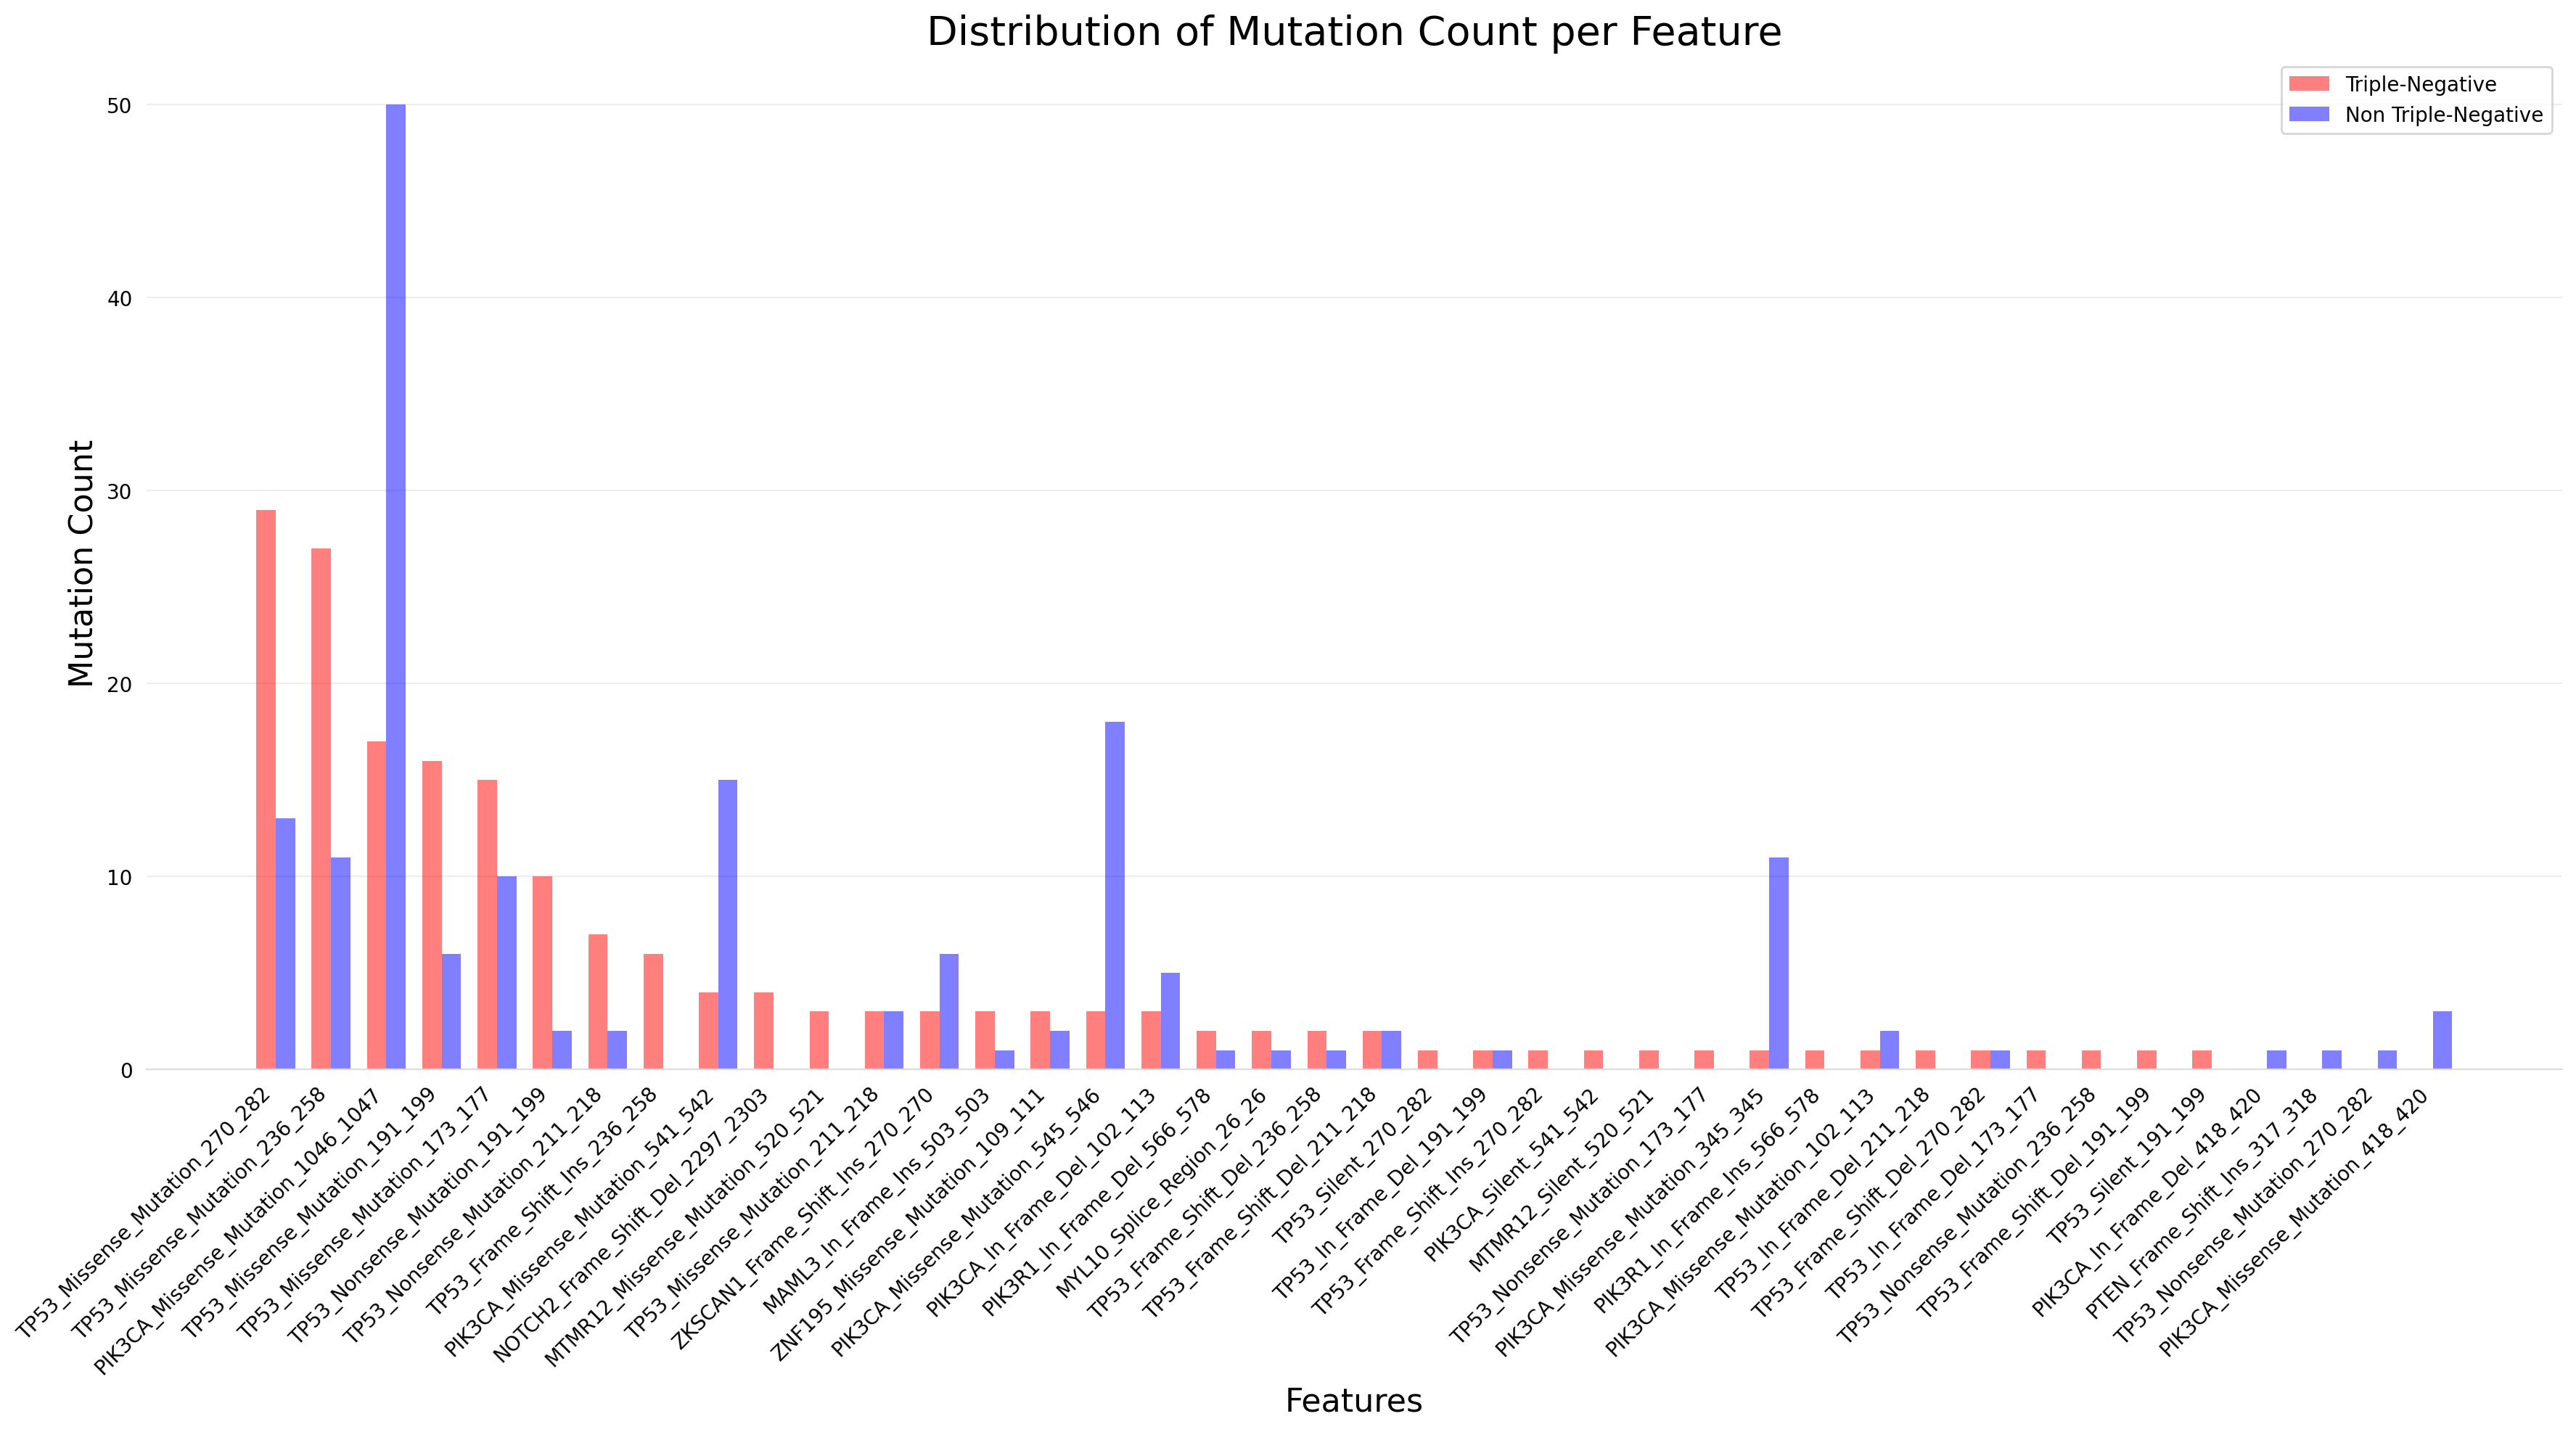

In [131]:
from IPython.display import set_matplotlib_formats
import matplotlib_inline
%config InlineBackend.figure_format = 'retina'

# Set default figure size.
plt.rcParams['figure.figsize'] = (18, 10)
fig, ax = plt.subplots()

# Set the width of the bars
bar_width = 0.35

# Calculate the positions for the bars
feature_positions_TN = range(len(df_feature_distribution_TN_sorted['Feature']))
feature_positions_nonTN = [pos + bar_width for pos in feature_positions_TN]

# Plot grouped bar chart for Triple Negative patients
h1 = ax.bar(feature_positions_TN, df_feature_distribution_TN_sorted['Mutation count per feature'], bar_width, alpha=0.5, label='Triple-Negative', color='red')

# Plot grouped bar chart for non-Triple Negative patients
h2 = ax.bar(feature_positions_nonTN, df_feature_distribution_NONTN_sorted2['Mutation count per feature'], bar_width, alpha=0.5, label='Non Triple-Negative', color='blue')

# Customize the plot
plt.xlabel('Features', fontsize=16)
plt.ylabel('Mutation Count', fontsize=16)
plt.title('Distribution of Mutation Count per Feature', fontsize=20)
plt.xticks([pos + bar_width / 2 for pos in feature_positions_TN], df_feature_distribution_TN_sorted['Feature'], rotation=45, ha='right')
plt.legend()

# Customize the appearance of the plot (spines, grid, etc.)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')

ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

fig.tight_layout()

plt.show()


In [132]:
occurrence_matrix_TNandNONTNrelgenes_q1_BALANCED

,TP53_Missense_Mutation_270_282,MAML3_In_Frame_Ins_503_503,PIK3CA_Missense_Mutation_1046_1047,TP53_Missense_Mutation_173_177,TP53_Missense_Mutation_236_258,PIK3CA_Missense_Mutation_545_546,TP53_Nonsense_Mutation_191_199,PIK3CA_Missense_Mutation_541_542,PIK3CA_Missense_Mutation_345_345,TP53_Frame_Shift_Del_211_218,...,TP53_Nonsense_Mutation_173_177,MTMR12_Silent_520_521,PIK3CA_Silent_541_542,TP53_Frame_Shift_Ins_270_282,TP53_Silent_191_199,PTEN_Frame_Shift_Ins_317_318,ZKSCAN1_Frame_Shift_Ins_270_270,ZNF195_Missense_Mutation_109_111,MYL10_Splice_Region_26_26,Target
TCGA-B6-A0RO,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBCProject_eEtEC7IB,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-E2-A14Q,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MBC_35,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-C8-A12P,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MBCProject_pktAIxFb,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
brca_smc_2018_BR331,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
X01BR015,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TCGA-AN-A0XS,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [133]:
occurrence_matrix_TNandNONTNrelgenes_q1_BALANCED.loc['MBC_159']

TP53_Missense_Mutation_270_282        0
MAML3_In_Frame_Ins_503_503            0
PIK3CA_Missense_Mutation_1046_1047    0
TP53_Missense_Mutation_173_177        0
TP53_Missense_Mutation_236_258        0
PIK3CA_Missense_Mutation_545_546      0
TP53_Nonsense_Mutation_191_199        0
PIK3CA_Missense_Mutation_541_542      1
PIK3CA_Missense_Mutation_345_345      0
TP53_Frame_Shift_Del_211_218          0
PIK3CA_Missense_Mutation_418_420      0
TP53_Nonsense_Mutation_211_218        0
TP53_Missense_Mutation_191_199        0
PIK3CA_Missense_Mutation_102_113      0
TP53_Frame_Shift_Del_236_258          0
TP53_Missense_Mutation_211_218        0
TP53_Frame_Shift_Del_191_199          0
PIK3CA_In_Frame_Del_102_113           0
TP53_In_Frame_Del_191_199             0
PIK3CA_In_Frame_Del_418_420           0
TP53_Silent_270_282                   0
MTMR12_Missense_Mutation_520_521      0
NOTCH2_Frame_Shift_Del_2297_2303      0
TP53_Nonsense_Mutation_236_258        0
TP53_In_Frame_Del_173_177             0


In [134]:
# create a dataframe with the patient IDs and the target
patients_target = occurrence_matrix_TNandNONTNrelgenes_q1_BALANCED[['Target']]
patients_target_2 = patients_target.reset_index(inplace=False)  # Reset the index, which adds the index as a column
# Rename the new index column (which has the default name 'index') to something else if needed
patients_target_2 = patients_target_2.rename(columns={'index': 'Patient'}, inplace=False)
patients_target_2

,Patient,Target
0,TCGA-B6-A0RO,0
1,MBCProject_eEtEC7IB,0
2,TCGA-E2-A14Q,0
3,MBC_35,0
4,TCGA-C8-A12P,0
...,...,...
287,MBCProject_pktAIxFb,0
288,brca_smc_2018_BR331,0
289,X01BR015,0
290,TCGA-AN-A0XS,0


## How many TCGA patients are present in the model?

In [135]:
# SELECT THE PATIENTS of the model

# Extract the row indices as a list
patient_indices = occurrence_matrix_TNandNONTNrelgenes_q1_BALANCED.index.tolist()
# Create a new DataFrame with the patient indices
patient_indices_df = pd.DataFrame({'Patient': patient_indices})
patient_indices_df

,Patient
0,TCGA-B6-A0RO
1,MBCProject_eEtEC7IB
2,TCGA-E2-A14Q
3,MBC_35
4,TCGA-C8-A12P
...,...
287,MBCProject_pktAIxFb
288,brca_smc_2018_BR331
289,X01BR015
290,TCGA-AN-A0XS


In [136]:
# Select rows where Patient IDs start with 'TCGA-'
tcga_patients = patient_indices_df[patient_indices_df['Patient'].str.startswith('TCGA-')]
tcga_patients

,Patient
0,TCGA-B6-A0RO
2,TCGA-E2-A14Q
4,TCGA-C8-A12P
8,TCGA-C8-A1HK
11,TCGA-BH-A18F
...,...
279,TCGA-BH-A1FU
280,TCGA-D8-A1JJ
281,TCGA-D8-A27K
282,TCGA-E9-A1R0


In [137]:
tcga_patients_list = tcga_patients['Patient'].to_list()
tcga_patients_list

['TCGA-B6-A0RO',
 'TCGA-E2-A14Q',
 'TCGA-C8-A12P',
 'TCGA-C8-A1HK',
 'TCGA-BH-A18F',
 'TCGA-B6-A0IK',
 'TCGA-S3-AA14',
 'TCGA-AN-A03X',
 'TCGA-C8-A12W',
 'TCGA-A2-A0CP',
 'TCGA-AN-A0FV',
 'TCGA-A8-A07Z',
 'TCGA-E2-A1L6',
 'TCGA-BH-A0HU',
 'TCGA-E2-A109',
 'TCGA-AN-A0XP',
 'TCGA-C8-A12L',
 'TCGA-A8-A09N',
 'TCGA-AN-A03Y',
 'TCGA-C8-A12Y',
 'TCGA-AC-A5EH',
 'TCGA-BH-A1F8',
 'TCGA-BH-A0DE',
 'TCGA-D8-A1Y1',
 'TCGA-LD-A7W5',
 'TCGA-A2-A1FZ',
 'TCGA-A8-A081',
 'TCGA-A8-A06U',
 'TCGA-AC-A6NO',
 'TCGA-A8-A07G',
 'TCGA-BH-A1FD',
 'TCGA-A8-A06O',
 'TCGA-BH-A1FN',
 'TCGA-C8-A26X',
 'TCGA-D8-A1XY',
 'TCGA-BH-A0AW',
 'TCGA-E9-A1R5',
 'TCGA-A2-A0D1',
 'TCGA-AQ-A04H',
 'TCGA-A8-A09D',
 'TCGA-BH-A0HA',
 'TCGA-AO-A03O',
 'TCGA-GM-A2DI',
 'TCGA-E2-A1IO',
 'TCGA-A7-A0D9',
 'TCGA-A2-A04Q',
 'TCGA-A2-A04T',
 'TCGA-A2-A0D0',
 'TCGA-A2-A0SX',
 'TCGA-A7-A0DA',
 'TCGA-A7-A13E',
 'TCGA-A7-A4SD',
 'TCGA-A8-A08R',
 'TCGA-AC-A2BK',
 'TCGA-AC-A62X',
 'TCGA-AC-A6IW',
 'TCGA-AN-A0AL',
 'TCGA-AN-A0FX',
 'TCGA-AN-A0XU

In [138]:
patients_target_2

,Patient,Target
0,TCGA-B6-A0RO,0
1,MBCProject_eEtEC7IB,0
2,TCGA-E2-A14Q,0
3,MBC_35,0
4,TCGA-C8-A12P,0
...,...,...
287,MBCProject_pktAIxFb,0
288,brca_smc_2018_BR331,0
289,X01BR015,0
290,TCGA-AN-A0XS,0


In [139]:
# select the tcga patients from patients_target_2
tcga_patients_target = patients_target_2[patients_target_2['Patient'].isin(tcga_patients_list)]
tcga_patients_target

,Patient,Target
0,TCGA-B6-A0RO,0
2,TCGA-E2-A14Q,0
4,TCGA-C8-A12P,0
8,TCGA-C8-A1HK,0
11,TCGA-BH-A18F,0
...,...,...
279,TCGA-BH-A1FU,0
280,TCGA-D8-A1JJ,0
281,TCGA-D8-A27K,0
282,TCGA-E9-A1R0,0


In [140]:
tcga_patients_target['Target'].value_counts()

Target
0    68
1    68
Name: count, dtype: int64

In [141]:
# save the 6B TCGA patients 
os.chdir("C:/Users/Cristina/OneDrive/Documenti/BCG/Tesi/TCGA_survival_data_intrinsic_subtypes")
tcga_patients_target.to_csv('TCGA_pts_6B.txt', index=False, sep='\t')

## Grid search to find the optimal C parameter for Lasso regression

GridSearchCV(cv=5,
             estimator=LogisticRegression(penalty='l1', solver='liblinear'),
             param_grid={'C': array([1.00000000e-02, 2.57384615e+00, 5.13769231e+00, 7.70153846e+00,
       1.02653846e+01, 1.28292308e+01, 1.53930769e+01, 1.79569231e+01,
       2.05207692e+01, 2.30846154e+01, 2.56484615e+01, 2.82123077e+01,
       3.07761538e+01, 3.33400000e+01, 3.59038462e+01, 3.84676923e+01,
       4.10315...1, 4.35953846e+01, 4.61592308e+01, 4.87230769e+01,
       5.12869231e+01, 5.38507692e+01, 5.64146154e+01, 5.89784615e+01,
       6.15423077e+01, 6.41061538e+01, 6.66700000e+01, 6.92338462e+01,
       7.17976923e+01, 7.43615385e+01, 7.69253846e+01, 7.94892308e+01,
       8.20530769e+01, 8.46169231e+01, 8.71807692e+01, 8.97446154e+01,
       9.23084615e+01, 9.48723077e+01, 9.74361538e+01, 1.00000000e+02])})

Best lambda (alpha) for Lasso logistic regression:  0.19463991615511306
Best cross-validation score:  0.7075052854122621


Text(0.5, 0, 'C')

Text(0, 0.5, 'CV-Accuracy')

Text(0.5, 1.0, 'Grid Search Results')

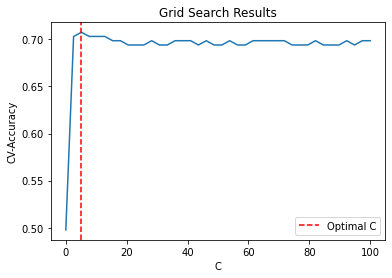

In [197]:
# The code performs a grid search with cross-validation (10-fold) to find the optimal value of the 'C' parameter in Lasso logistic regression. 
# It tries different values of 'C' specified in param_grid and evaluates the model's performance using 10-fold cross-validation. The result is stored in the grid_search object, which can be accessed to retrieve the best hyperparameters and evaluate the model's performance.

param_grid = {'C': np.linspace(0.01, 100, 40)}
# Create a logistic regression model with Lasso regularization
lasso_model = LogisticRegression(penalty='l1', solver='liblinear') # if I add max_iter=int(1e6), it blocks

# Perform grid search with cross-validation (cv=5)
grid_search = GridSearchCV(lasso_model, param_grid, cv=5)
grid_search.fit(normalized_X_train, y_train)

# Print the best lambda (alpha) value
print("Best lambda (alpha) for Lasso logistic regression: ", 1 / grid_search.best_estimator_.C)

# Print the best cross-validation score
print("Best cross-validation score: ", grid_search.best_score_)

C_values = np.linspace(0.01, 100, 40)
accuracy_scores = grid_search.cv_results_['mean_test_score']

max_accuracy = np.max(accuracy_scores)
best_C = C_values[np.argmax(accuracy_scores)]


plt.plot(C_values, accuracy_scores)
plt.axvline(x=best_C, color='r', linestyle='--', label='Optimal C')
plt.xlabel('C')
plt.ylabel('CV-Accuracy')
plt.title('Grid Search Results')
plt.legend()
plt.show()

Best lambda (alpha) for Lasso logistic regression: 0.19463991615511306 (C=5.14).

In [198]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

# After fitting the grid search, calculate metrics using cross_val_predict
best_lasso_model = grid_search.best_estimator_  # Get the best Lasso model with the optimal C

# Use cross_val_predict to get predictions for each fold in cross-validation
y_pred = cross_val_predict(best_lasso_model, normalized_X_train, y_train, cv=5)

# Calculate accuracy for each fold
accuracy_scores = cross_val_score(best_lasso_model, normalized_X_train, y_train, cv=5, scoring='accuracy')
# Calculate precision, recall and F1 for each fold
# By default, precision, recall and F1 refer to the positive class (1)
precision_scores_1 = cross_val_score(best_lasso_model, normalized_X_train, y_train, cv=5, scoring='precision')
recall_scores_1 = cross_val_score(best_lasso_model, normalized_X_train, y_train, cv=5, scoring='recall')
f1_scores_1 = cross_val_score(best_lasso_model, normalized_X_train, y_train, cv=5, scoring='f1')

# Calculate the mean cross-validation precision and recall
mean_accuracy = np.mean(accuracy_scores)
std_accuracy = np.std(accuracy_scores)
mean_precision_1 = np.mean(precision_scores_1)
std_precision_1 = np.std(precision_scores_1)
mean_recall_1 = np.mean(recall_scores_1)
std_recall_1 = np.std(recall_scores_1)
mean_f1_1 = np.mean(f1_scores_1)
std_f1_1 = np.std(f1_scores_1)


# Print the mean cross-validation precision and recall
print("Mean Cross-Validation Accuracy:", mean_accuracy)
print("Standard Deviation of Accuracy:", std_accuracy)
print("Mean Cross-Validation Precision - 1:", mean_precision_1)
print("Standard Deviation of Precision - 1:", std_precision_1)
print("Mean Cross-Validation Recall - 1:", mean_recall_1)
print("Standard Deviation of Recall - 1:", std_recall_1)
print("Mean Cross-Validation F1-score - 1:", mean_f1_1)
print("Standard Deviation of F1-score - 1:", std_f1_1)

Mean Cross-Validation Accuracy: 0.7075052854122621
Standard Deviation of Accuracy: 0.052255168631822585
Mean Cross-Validation Precision - 1: 0.68394301994302
Standard Deviation of Precision - 1: 0.03328951072664547
Mean Cross-Validation Recall - 1: 0.7727272727272727
Standard Deviation of Recall - 1: 0.09090909090909091
Mean Cross-Validation F1-score - 1: 0.7243489280917711
Standard Deviation of F1-score - 1: 0.05721367697347256


In [199]:
precision_scores_1 

array([0.68      , 0.64      , 0.69230769, 0.74074074, 0.66666667])

#### Compute the mean and the standard deviation cross-validation precision, recall and F1-score for the negative class 0

In [200]:
from sklearn.metrics import make_scorer
# 1) PRECISION
# 'make_scorer' defines a custom scoring function for precision of class 0
# 'precision_score' is the scoring function that you want to use as a base
# 'pos_label=0' specifies that you want to calculate precision for class 0
precision_scorer_class0 = make_scorer(precision_score, pos_label=0)

# Calculate precision for class 0 (negative class)
precision_scores_0 = cross_val_score(best_lasso_model, normalized_X_train, y_train, cv=5, scoring=precision_scorer_class0)

# 2) RECALL 
# Define a custom scorer for recall of class 0
recall_scorer_class0 = make_scorer(recall_score, pos_label=0)

# Calculate recall for class 0 (negative class)
recall_scores_0 = cross_val_score(best_lasso_model, normalized_X_train, y_train, cv=5, scoring=recall_scorer_class0)

# 3) F1-SCORE
# Define a custom scorer for F1-score of class 0
f1_scorer_class0 = make_scorer(f1_score, pos_label=0)

# Calculate F1-score for class 0 (negative class)
f1_scores_0 = cross_val_score(best_lasso_model, normalized_X_train, y_train, cv=5, scoring=f1_scorer_class0)

# compute the mean and the standard deviation
mean_precision_0 = np.mean(precision_scores_0)
std_precision_0 = np.std(precision_scores_0)
mean_recall_0 = np.mean(recall_scores_0)
std_recall_0 = np.std(recall_scores_0)
mean_f1_0 = np.mean(f1_scores_0)
std_f1_0 = np.std(f1_scores_0)

print("Mean Cross-Validation Precision - 0:", mean_precision_0)
print("Standard Deviation of Precision - 0:", std_precision_0)
print("Mean Cross-Validation Recall - 0:", mean_recall_0)
print("Standard Deviation of Recall - 0:", std_recall_0)
print("Mean Cross-Validation F1-score: - 0", mean_f1_0)
print("Standard Deviation of F1-score: - 0", std_f1_0)

Mean Cross-Validation Precision - 0: 0.7435093973793664
Standard Deviation of Precision - 0: 0.08425304094985073
Mean Cross-Validation Recall - 0: 0.6424242424242423
Standard Deviation of Recall - 0: 0.031198879215112094
Mean Cross-Validation F1-score: - 0 0.6874933461320302
Standard Deviation of F1-score: - 0 0.046955485233025486


In [201]:
precision_scores_0

array([0.73684211, 0.68421053, 0.77777778, 0.88235294, 0.63636364])

In [202]:
# define a function that performs a Logistic Regression using Lasso (default C=1) as Regularization type
def Lasso (X_train, X_test, y_train, y_test):
   
    

# Definizione dell'istanza del modello.
    clf = LogisticRegression(penalty="l1", solver="liblinear", tol=1e-6, max_iter=100000, warm_start=True, intercept_scaling=10000.0, C=5.14)   
# setting warm_start=False to start training from scratch each time, eliminating the influence of previous solutions.

# Addestramento del modello sui dati di training
    clf.fit(X_train, y_train)

# Predizione sui dati di test
    y_pred = clf.predict(X_test)

# Valutazione del modello
    print(classification_report(y_test, y_pred))

    coef_indexes = clf.coef_[0].nonzero()[0]

    # Numero delle feature con coefficiente diverso da zero
    n_features = len(coef_indexes)

    # Nomi delle feature con coefficiente diverso da zero
    feature_names = X.columns[coef_indexes]


    print(f"Numero di feature con coefficiente diverso da zero: {n_features}")
    print(f"Nomi delle feature con coefficiente diverso da zero: {feature_names}")

    explainer = shap.Explainer(clf, X_train)

# Calcola i valori Shapley per le feature del modello addestrato
    #shap_values = explainer(X_test)

# Visualizza un grafico delle feature più importanti
    #shap.plots.bar(shap_values.mean(0))
   # shap.plots.bar(shap_values)
    #shap.plots.force(shap_values)


    return (y_pred, feature_names)

In [203]:
y_pred_simple_Lasso, feature_names_simple_Lasso = Lasso(normalized_X_train, normalized_X_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.82      0.84      0.83        37
           1       0.83      0.81      0.82        36

    accuracy                           0.82        73
   macro avg       0.82      0.82      0.82        73
weighted avg       0.82      0.82      0.82        73

Numero di feature con coefficiente diverso da zero: 35
Nomi delle feature con coefficiente diverso da zero: Index(['TP53_Missense_Mutation_270_282', 'MAML3_In_Frame_Ins_503_503',
       'PIK3CA_Missense_Mutation_1046_1047', 'TP53_Missense_Mutation_236_258',
       'PIK3CA_Missense_Mutation_545_546', 'TP53_Nonsense_Mutation_191_199',
       'PIK3CA_Missense_Mutation_541_542', 'PIK3CA_Missense_Mutation_345_345',
       'PIK3CA_Missense_Mutation_418_420', 'TP53_Nonsense_Mutation_211_218',
       'TP53_Missense_Mutation_191_199', 'PIK3CA_Missense_Mutation_102_113',
       'TP53_Frame_Shift_Del_236_258', 'TP53_Missense_Mutation_211_218',
       'TP53_Frame_Shift_Del_191

Liblinear failed to converge, increase the number of iterations.


35 features have a coefficent different from zero.

### Study of the function Lasso

In [106]:
clf_simple_LogRegr = LogisticRegression(penalty="l1", solver="liblinear", tol=1e-6, max_iter=1000, warm_start=False, intercept_scaling=10000.0, C=5.14)   

In [107]:
clf_simple_LogRegr.fit(normalized_X_train, y_train)

LogisticRegression(C=5.14, intercept_scaling=10000.0, max_iter=1000,
                   penalty='l1', solver='liblinear', tol=1e-06)

In [108]:
y_pred_simple_Lasso = clf_simple_LogRegr.predict(normalized_X_test)

In [109]:
y_pred_simple_Lasso

array([1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0], dtype=int64)

In [110]:
y_test

brca_smc_2018_BB01_037    1
brca_smc_2018_BB01_110    1
brca_smc_2018_BB01_126    1
BR-M-045                  1
PD4133a                   1
                         ..
MBCProject_pktAIxFb       0
brca_smc_2018_BR331       0
X01BR015                  0
TCGA-AN-A0XS              0
MBC_159                   0
Name: Target, Length: 73, dtype: int64

In [111]:
print(classification_report(y_test, y_pred_simple_Lasso))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83        37
           1       0.83      0.81      0.82        36

    accuracy                           0.82        73
   macro avg       0.82      0.82      0.82        73
weighted avg       0.82      0.82      0.82        73



In [112]:
# extract the indexes of coefficients in a logistic regression model that have non.zero values when Lasso (l1 regularization) is applied
coef_indexes_simple_Lasso = clf_simple_LogRegr.coef_[0].nonzero()[0]

# Numero delle feature con coefficiente diverso da zero
n_features_simple_Lasso = len(coef_indexes_simple_Lasso)

# Nomi delle feature con coefficiente diverso da zero
feature_names_simple_Lasso = X.columns[coef_indexes_simple_Lasso]


print(f"Numero di feature con coefficiente diverso da zero: {n_features_simple_Lasso}")
print(f"Nomi delle feature con coefficiente diverso da zero: {feature_names_simple_Lasso}")


Numero di feature con coefficiente diverso da zero: 35
Nomi delle feature con coefficiente diverso da zero: Index(['TP53_Missense_Mutation_270_282', 'MAML3_In_Frame_Ins_503_503',
       'PIK3CA_Missense_Mutation_1046_1047', 'TP53_Missense_Mutation_236_258',
       'PIK3CA_Missense_Mutation_545_546', 'TP53_Nonsense_Mutation_191_199',
       'PIK3CA_Missense_Mutation_541_542', 'PIK3CA_Missense_Mutation_345_345',
       'PIK3CA_Missense_Mutation_418_420', 'TP53_Nonsense_Mutation_211_218',
       'TP53_Missense_Mutation_191_199', 'PIK3CA_Missense_Mutation_102_113',
       'TP53_Frame_Shift_Del_236_258', 'TP53_Missense_Mutation_211_218',
       'TP53_Frame_Shift_Del_191_199', 'PIK3CA_In_Frame_Del_102_113',
       'TP53_In_Frame_Del_191_199', 'TP53_Silent_270_282',
       'MTMR12_Missense_Mutation_520_521', 'NOTCH2_Frame_Shift_Del_2297_2303',
       'TP53_Nonsense_Mutation_236_258', 'TP53_In_Frame_Del_173_177',
       'TP53_In_Frame_Del_211_218', 'PIK3R1_In_Frame_Ins_566_578',
       'TP53_F

In [113]:
coef_indexes_simple_Lasso

array([ 0,  1,  2,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       20, 21, 22, 23, 24, 26, 27, 28, 30, 31, 32, 33, 34, 35, 36, 37, 38,
       39], dtype=int64)

In [115]:
feature_names_lista_simple_Lasso = list(feature_names_simple_Lasso)
feature_names_lista_simple_Lasso

['TP53_Missense_Mutation_270_282',
 'MAML3_In_Frame_Ins_503_503',
 'PIK3CA_Missense_Mutation_1046_1047',
 'TP53_Missense_Mutation_236_258',
 'PIK3CA_Missense_Mutation_545_546',
 'TP53_Nonsense_Mutation_191_199',
 'PIK3CA_Missense_Mutation_541_542',
 'PIK3CA_Missense_Mutation_345_345',
 'PIK3CA_Missense_Mutation_418_420',
 'TP53_Nonsense_Mutation_211_218',
 'TP53_Missense_Mutation_191_199',
 'PIK3CA_Missense_Mutation_102_113',
 'TP53_Frame_Shift_Del_236_258',
 'TP53_Missense_Mutation_211_218',
 'TP53_Frame_Shift_Del_191_199',
 'PIK3CA_In_Frame_Del_102_113',
 'TP53_In_Frame_Del_191_199',
 'TP53_Silent_270_282',
 'MTMR12_Missense_Mutation_520_521',
 'NOTCH2_Frame_Shift_Del_2297_2303',
 'TP53_Nonsense_Mutation_236_258',
 'TP53_In_Frame_Del_173_177',
 'TP53_In_Frame_Del_211_218',
 'PIK3R1_In_Frame_Ins_566_578',
 'TP53_Frame_Shift_Ins_236_258',
 'TP53_Nonsense_Mutation_270_282',
 'TP53_Nonsense_Mutation_173_177',
 'MTMR12_Silent_520_521',
 'PIK3CA_Silent_541_542',
 'TP53_Frame_Shift_Ins_270_

In [116]:
len(feature_names_lista_simple_Lasso)

35

In [117]:
feature_names_lista_simple_Lasso = list(feature_names_simple_Lasso)
feature_names_lista_simple_Lasso

len(feature_names_lista_simple_Lasso)

['TP53_Missense_Mutation_270_282',
 'MAML3_In_Frame_Ins_503_503',
 'PIK3CA_Missense_Mutation_1046_1047',
 'TP53_Missense_Mutation_236_258',
 'PIK3CA_Missense_Mutation_545_546',
 'TP53_Nonsense_Mutation_191_199',
 'PIK3CA_Missense_Mutation_541_542',
 'PIK3CA_Missense_Mutation_345_345',
 'PIK3CA_Missense_Mutation_418_420',
 'TP53_Nonsense_Mutation_211_218',
 'TP53_Missense_Mutation_191_199',
 'PIK3CA_Missense_Mutation_102_113',
 'TP53_Frame_Shift_Del_236_258',
 'TP53_Missense_Mutation_211_218',
 'TP53_Frame_Shift_Del_191_199',
 'PIK3CA_In_Frame_Del_102_113',
 'TP53_In_Frame_Del_191_199',
 'TP53_Silent_270_282',
 'MTMR12_Missense_Mutation_520_521',
 'NOTCH2_Frame_Shift_Del_2297_2303',
 'TP53_Nonsense_Mutation_236_258',
 'TP53_In_Frame_Del_173_177',
 'TP53_In_Frame_Del_211_218',
 'PIK3R1_In_Frame_Ins_566_578',
 'TP53_Frame_Shift_Ins_236_258',
 'TP53_Nonsense_Mutation_270_282',
 'TP53_Nonsense_Mutation_173_177',
 'MTMR12_Silent_520_521',
 'PIK3CA_Silent_541_542',
 'TP53_Frame_Shift_Ins_270_

35

In [118]:
feature_names_lista_simple_Lasso_df = pd.DataFrame({'Lasso features': feature_names_lista_simple_Lasso})
feature_names_lista_simple_Lasso_df

,Lasso features
0,TP53_Missense_Mutation_270_282
1,MAML3_In_Frame_Ins_503_503
2,PIK3CA_Missense_Mutation_1046_1047
3,TP53_Missense_Mutation_236_258
4,PIK3CA_Missense_Mutation_545_546
5,TP53_Nonsense_Mutation_191_199
6,PIK3CA_Missense_Mutation_541_542
7,PIK3CA_Missense_Mutation_345_345
8,PIK3CA_Missense_Mutation_418_420
9,TP53_Nonsense_Mutation_211_218


#### Extract only the Hugo Symbol from the features 

In [119]:
feature_names_lista_simple_Lasso_df['Hugo_Symbol'] = feature_names_lista_simple_Lasso_df['Lasso features'].str.split('_').str[0]
feature_names_lista_simple_Lasso_df

,Lasso features,Hugo_Symbol
0,TP53_Missense_Mutation_270_282,TP53
1,MAML3_In_Frame_Ins_503_503,MAML3
2,PIK3CA_Missense_Mutation_1046_1047,PIK3CA
3,TP53_Missense_Mutation_236_258,TP53
4,PIK3CA_Missense_Mutation_545_546,PIK3CA
5,TP53_Nonsense_Mutation_191_199,TP53
6,PIK3CA_Missense_Mutation_541_542,PIK3CA
7,PIK3CA_Missense_Mutation_345_345,PIK3CA
8,PIK3CA_Missense_Mutation_418_420,PIK3CA
9,TP53_Nonsense_Mutation_211_218,TP53


In [120]:
feature_names_lista_simple_Lasso_df_onlyHugo = feature_names_lista_simple_Lasso_df[['Hugo_Symbol']]
feature_names_lista_simple_Lasso_df_onlyHugo

,Hugo_Symbol
0,TP53
1,MAML3
2,PIK3CA
3,TP53
4,PIK3CA
5,TP53
6,PIK3CA
7,PIK3CA
8,PIK3CA
9,TP53


In [121]:
feature_names_lista_simple_Lasso_df_onlyHugo.duplicated().sum()

25

In [122]:
# consider just unique genes - drop duplicates 
feature_names_lista_simple_Lasso_df_onlyHugo_nodup = feature_names_lista_simple_Lasso_df_onlyHugo.drop_duplicates()
feature_names_lista_simple_Lasso_df_onlyHugo_nodup

,Hugo_Symbol
0,TP53
1,MAML3
2,PIK3CA
18,MTMR12
19,NOTCH2
23,PIK3R1
31,PTEN
32,ZKSCAN1
33,ZNF195
34,MYL10


In [123]:
feature_names_lista_simple_Lasso_df_onlyHugo_nodup.shape

(10, 1)

### Study the Lasso coefficients


In Lasso Logistic Regression (Logistic Regression with L1 regularization), the coefficients represent the strength and direction of the relationship between the input features and the binary outcome (0 or 1). These coefficients play a crucial role in determining how the logistic regression model makes predictions.

1. **Magnitude (Absolute Value):** The absolute value of a coefficient indicates the strength of the relationship between a feature and the outcome. A larger absolute value suggests that the feature has a more substantial impact on the prediction. For example, if the coefficient for a feature is 0.5, it means a one-unit change in that feature will result in a 0.5-unit change in the log-odds of the outcome.
2. **Sign (Positive or Negative):** The sign of the coefficient (positive or negative) indicates the direction of the relationship. 
3. **Feature Importance:** The coefficients provide a measure of feature importance. Features with larger (in absolute value) coefficients are considered more important in making predictions. Lasso regularization tends to drive some coefficients to zero, effectively selecting a subset of the most important features, which can be useful for feature selection.
4. **Regularization Effect:** Lasso regularization, by design, encourages sparsity in the coefficients. It tries to set some coefficients to exactly zero, effectively removing certain features from the model. This is a form of feature selection and can lead to a simpler and more interpretable model.
5. **Interpretation**: For categorical features, coefficients indicate the change in log-odds compared to the reference category.

The coefficients give insights into the relationships between features and the probability of the positive outcome.

In [107]:
coef_Lasso = clf_simple_LogRegr.coef_[0]
coef_Lasso

array([ 5.59906630e-01,  1.51831547e+00, -1.66477108e+00,  0.00000000e+00,
        1.31928736e+00, -2.06354461e+00,  8.87971500e-01, -4.22343870e+00,
       -3.33629162e+00,  0.00000000e+00, -3.03142109e+00,  1.00691534e+00,
        4.20300707e-01, -2.51959732e+00,  4.61722599e-03, -4.51579161e-01,
        1.05789083e+00, -7.75841771e-01,  4.61721366e-03,  0.00000000e+00,
        4.97984190e-01,  6.37590125e-01,  2.07950373e+00,  2.72266190e+00,
        1.83373259e+00,  0.00000000e+00,  1.05789082e+00,  1.05789083e+00,
        2.30581118e+00,  0.00000000e+00, -1.78350074e+00,  1.05789083e+00,
        1.05789082e+00,  5.73290869e+00,  1.05789083e+00,  6.37590113e-01,
       -3.62091377e+00, -1.92654153e+00,  1.30179236e+00,  2.46216218e+00])

In [108]:
len(coef_Lasso)

40

In [109]:
# absolute value of the coefficients
abs(coef_Lasso)

array([5.59906630e-01, 1.51831547e+00, 1.66477108e+00, 0.00000000e+00,
       1.31928736e+00, 2.06354461e+00, 8.87971500e-01, 4.22343870e+00,
       3.33629162e+00, 0.00000000e+00, 3.03142109e+00, 1.00691534e+00,
       4.20300707e-01, 2.51959732e+00, 4.61722599e-03, 4.51579161e-01,
       1.05789083e+00, 7.75841771e-01, 4.61721366e-03, 0.00000000e+00,
       4.97984190e-01, 6.37590125e-01, 2.07950373e+00, 2.72266190e+00,
       1.83373259e+00, 0.00000000e+00, 1.05789082e+00, 1.05789083e+00,
       2.30581118e+00, 0.00000000e+00, 1.78350074e+00, 1.05789083e+00,
       1.05789082e+00, 5.73290869e+00, 1.05789083e+00, 6.37590113e-01,
       3.62091377e+00, 1.92654153e+00, 1.30179236e+00, 2.46216218e+00])

In [110]:
# Nomi delle feature con coefficiente diverso da zero
feature_names_simple_Lasso = X.columns[coef_indexes_simple_Lasso]
feature_names_simple_Lasso

Index(['TP53_Missense_Mutation_270_282', 'MAML3_In_Frame_Ins_503_503',
       'PIK3CA_Missense_Mutation_1046_1047', 'TP53_Missense_Mutation_236_258',
       'PIK3CA_Missense_Mutation_545_546', 'TP53_Nonsense_Mutation_191_199',
       'PIK3CA_Missense_Mutation_541_542', 'PIK3CA_Missense_Mutation_345_345',
       'PIK3CA_Missense_Mutation_418_420', 'TP53_Nonsense_Mutation_211_218',
       'TP53_Missense_Mutation_191_199', 'PIK3CA_Missense_Mutation_102_113',
       'TP53_Frame_Shift_Del_236_258', 'TP53_Missense_Mutation_211_218',
       'TP53_Frame_Shift_Del_191_199', 'PIK3CA_In_Frame_Del_102_113',
       'TP53_In_Frame_Del_191_199', 'TP53_Silent_270_282',
       'MTMR12_Missense_Mutation_520_521', 'NOTCH2_Frame_Shift_Del_2297_2303',
       'TP53_Nonsense_Mutation_236_258', 'TP53_In_Frame_Del_173_177',
       'TP53_In_Frame_Del_211_218', 'PIK3R1_In_Frame_Ins_566_578',
       'TP53_Frame_Shift_Ins_236_258', 'TP53_Nonsense_Mutation_270_282',
       'TP53_Nonsense_Mutation_173_177', 'MTMR12_

In [111]:
# Create a DataFrame with feature names and their absolute coefficients
features_coefficients_Lasso = pd.DataFrame({'Feature': X.columns, 'Absolute Coefficient': abs(coef_Lasso)})
features_coefficients_Lasso

,Feature,Absolute Coefficient
0,TP53_Missense_Mutation_270_282,0.559907
1,MAML3_In_Frame_Ins_503_503,1.518315
2,PIK3CA_Missense_Mutation_1046_1047,1.664771
3,TP53_Missense_Mutation_173_177,0.000000
4,TP53_Missense_Mutation_236_258,1.319287
5,PIK3CA_Missense_Mutation_545_546,2.063545
6,TP53_Nonsense_Mutation_191_199,0.887971
7,PIK3CA_Missense_Mutation_541_542,4.223439
8,PIK3CA_Missense_Mutation_345_345,3.336292
9,TP53_Frame_Shift_Del_211_218,0.000000


In [190]:
# sort in descending order of absolute coefficient
features_tot_coefficients_Lasso_sorted = features_coefficients_Lasso.sort_values(by='Absolute Coefficient', ascending=False)
features_tot_coefficients_Lasso_sorted

,Feature,Absolute Coefficient
33,PIK3CA_Silent_541_542,5.732909
7,PIK3CA_Missense_Mutation_541_542,4.223439
36,PTEN_Frame_Shift_Ins_317_318,3.620914
8,PIK3CA_Missense_Mutation_345_345,3.336292
10,PIK3CA_Missense_Mutation_418_420,3.031421
23,TP53_Nonsense_Mutation_236_258,2.722662
13,PIK3CA_Missense_Mutation_102_113,2.519597
39,MYL10_Splice_Region_26_26,2.462162
28,TP53_Frame_Shift_Ins_236_258,2.305811
22,NOTCH2_Frame_Shift_Del_2297_2303,2.079504


In [191]:
features_tot_coefficients_Lasso_sorted.shape

(40, 2)

In [112]:
# Filter the DataFrame to keep only non-zero coefficients
features_nonzerocoefficients_Lasso = features_coefficients_Lasso[features_coefficients_Lasso['Absolute Coefficient'] != 0]
features_nonzerocoefficients_Lasso

,Feature,Absolute Coefficient
0,TP53_Missense_Mutation_270_282,0.559907
1,MAML3_In_Frame_Ins_503_503,1.518315
2,PIK3CA_Missense_Mutation_1046_1047,1.664771
4,TP53_Missense_Mutation_236_258,1.319287
5,PIK3CA_Missense_Mutation_545_546,2.063545
6,TP53_Nonsense_Mutation_191_199,0.887971
7,PIK3CA_Missense_Mutation_541_542,4.223439
8,PIK3CA_Missense_Mutation_345_345,3.336292
10,PIK3CA_Missense_Mutation_418_420,3.031421
11,TP53_Nonsense_Mutation_211_218,1.006915


In [113]:
features_nonzerocoefficients_Lasso.shape

(35, 2)

In [114]:
# sort in descending order of absolute coefficient
features_nonzerocoefficients_Lasso_sorted = features_nonzerocoefficients_Lasso.sort_values(by='Absolute Coefficient', ascending=False)
features_nonzerocoefficients_Lasso_sorted

,Feature,Absolute Coefficient
33,PIK3CA_Silent_541_542,5.732909
7,PIK3CA_Missense_Mutation_541_542,4.223439
36,PTEN_Frame_Shift_Ins_317_318,3.620914
8,PIK3CA_Missense_Mutation_345_345,3.336292
10,PIK3CA_Missense_Mutation_418_420,3.031421
23,TP53_Nonsense_Mutation_236_258,2.722662
13,PIK3CA_Missense_Mutation_102_113,2.519597
39,MYL10_Splice_Region_26_26,2.462162
28,TP53_Frame_Shift_Ins_236_258,2.305811
22,NOTCH2_Frame_Shift_Del_2297_2303,2.079504


## Evaluate the model with classification metrics 

In [115]:
# Test accuracy 
accuracy_simple_LassoLogRegr = np.mean(y_test == y_pred_simple_Lasso)
print("Accuracy:", accuracy_simple_LassoLogRegr)

Accuracy: 0.821917808219178


In [116]:
# build the confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

cm_simple_LassoLogRegr = confusion_matrix(y_test, y_pred_simple_Lasso)
print(cm_simple_LassoLogRegr)

[[31  6]
 [ 7 29]]


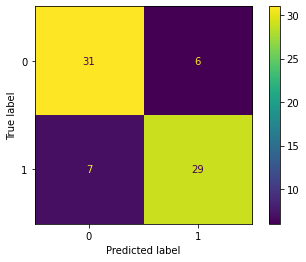

In [117]:
# Plot test confusion matrix
plot_confusion_matrix(clf_simple_LogRegr, normalized_X_test, y_test)

In [118]:
# precision: TP/(TP+FP) accuracy of the positive prediction
def precision(cm):
    TP = cm[1,1]
    TPFP = cm[:,1].sum()
    return TP / TPFP

In [119]:
print("Precision ", precision(cm_simple_LassoLogRegr))

Precision  0.8285714285714286


In [120]:
# Recall:  TP/(TP+FN) ratio of positive instances correctly detected by the classifier
def recall(cm):
    TP = cm[1,1]
    T = cm[1,:].sum()
    return TP / T

In [132]:
print("Recall:", recall(cm_simple_LassoLogRegr))

Recall: 0.8055555555555556


In [122]:
# F1 score: 2 * precision_RF * recall_RF / (precision_RF + recall_RF)
def f1(cm):
    p = precision(cm)
    r = recall(cm)
    return (2 * p * r) / (p + r)

In [123]:
print("F1:", f1(cm_simple_LassoLogRegr))

F1: 0.8169014084507044


In [124]:
# MCC (Matthews correlation coefficient)

def mcc(y_true, y_pred):
    tp = np.sum(np.logical_and(y_true == 1, y_pred == 1))
    tn = np.sum(np.logical_and(y_true == 0, y_pred == 0))
    fp = np.sum(np.logical_and(y_true == 0, y_pred == 1))
    fn = np.sum(np.logical_and(y_true == 1, y_pred == 0))
    
    numerator = (tp * tn) - (fp * fn)
    denominator = np.sqrt((tp + fp) * (tp + fn) * (tn + fp) * (tn + fn))
    
    mcc_value = numerator / denominator
    return mcc_value

In [125]:
tp = np.sum(np.logical_and(y_test == 1, y_pred_simple_Lasso == 1))
tp

29

In [126]:
tn = np.sum(np.logical_and(y_test == 0, y_pred_simple_Lasso == 0))
tn

31

In [127]:
fp = np.sum(np.logical_and(y_test == 0, y_pred_simple_Lasso == 1))
fp

6

In [128]:
fn = np.sum(np.logical_and(y_test == 1, y_pred_simple_Lasso == 0))
fn

7

In [129]:
print("MCC:", mcc(y_test, y_pred_simple_Lasso))

MCC: 0.6438769660985586


In [130]:
feature_names_lista_simple_Lasso = list(feature_names_simple_Lasso)
feature_names_lista_simple_Lasso

['TP53_Missense_Mutation_270_282',
 'MAML3_In_Frame_Ins_503_503',
 'PIK3CA_Missense_Mutation_1046_1047',
 'TP53_Missense_Mutation_236_258',
 'PIK3CA_Missense_Mutation_545_546',
 'TP53_Nonsense_Mutation_191_199',
 'PIK3CA_Missense_Mutation_541_542',
 'PIK3CA_Missense_Mutation_345_345',
 'PIK3CA_Missense_Mutation_418_420',
 'TP53_Nonsense_Mutation_211_218',
 'TP53_Missense_Mutation_191_199',
 'PIK3CA_Missense_Mutation_102_113',
 'TP53_Frame_Shift_Del_236_258',
 'TP53_Missense_Mutation_211_218',
 'TP53_Frame_Shift_Del_191_199',
 'PIK3CA_In_Frame_Del_102_113',
 'TP53_In_Frame_Del_191_199',
 'TP53_Silent_270_282',
 'MTMR12_Missense_Mutation_520_521',
 'NOTCH2_Frame_Shift_Del_2297_2303',
 'TP53_Nonsense_Mutation_236_258',
 'TP53_In_Frame_Del_173_177',
 'TP53_In_Frame_Del_211_218',
 'PIK3R1_In_Frame_Ins_566_578',
 'TP53_Frame_Shift_Ins_236_258',
 'TP53_Nonsense_Mutation_270_282',
 'TP53_Nonsense_Mutation_173_177',
 'MTMR12_Silent_520_521',
 'PIK3CA_Silent_541_542',
 'TP53_Frame_Shift_Ins_270_

In [131]:
len(feature_names_lista_simple_Lasso)

35

# Ridge Logistic Regression

## Grid search to find the optimal parameter for Ridge regression

GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=10000, solver='liblinear'),
             param_grid={'C': array([1.00000000e-02, 2.57384615e+00, 5.13769231e+00, 7.70153846e+00,
       1.02653846e+01, 1.28292308e+01, 1.53930769e+01, 1.79569231e+01,
       2.05207692e+01, 2.30846154e+01, 2.56484615e+01, 2.82123077e+01,
       3.07761538e+01, 3.33400000e+01, 3.59038462e+01, 3.84676923e+01,
       4.103...1, 4.35953846e+01, 4.61592308e+01, 4.87230769e+01,
       5.12869231e+01, 5.38507692e+01, 5.64146154e+01, 5.89784615e+01,
       6.15423077e+01, 6.41061538e+01, 6.66700000e+01, 6.92338462e+01,
       7.17976923e+01, 7.43615385e+01, 7.69253846e+01, 7.94892308e+01,
       8.20530769e+01, 8.46169231e+01, 8.71807692e+01, 8.97446154e+01,
       9.23084615e+01, 9.48723077e+01, 9.74361538e+01, 1.00000000e+02])})

Best C for Ridge logistic regression:  0.01
Best cross-validation score:  0.7119450317124736


Text(0.5, 0, 'C')

Text(0, 0.5, 'CV-Accuracy')

Text(0.5, 1.0, 'Grid Search Results for Ridge Logistic Regression')

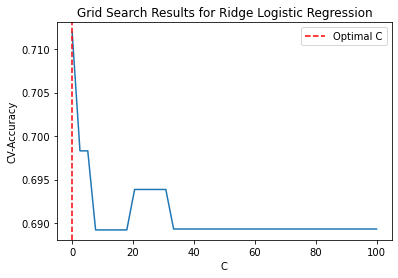

In [298]:
# Create a grid of alpha values for Ridge regularization
param_grid = {'C': np.linspace(0.01, 100, 40)}

# Create a logistic regression model with Ridge regularization (L2)
ridge_model = LogisticRegression(penalty='l2', solver='liblinear', max_iter=10000)

# Perform grid search with cross-validation (cv=5)
grid_search = GridSearchCV(ridge_model, param_grid, cv=5)
grid_search.fit(normalized_X_train, y_train)

# Print the best C value
print("Best C for Ridge logistic regression: ", grid_search.best_estimator_.C)

# Print the best cross-validation score
print("Best cross-validation score: ", grid_search.best_score_)

C_values = np.linspace(0.01, 100, 40)
accuracy_scores = grid_search.cv_results_['mean_test_score']

max_accuracy = np.max(accuracy_scores)
best_C = C_values[np.argmax(accuracy_scores)]

plt.plot(C_values, accuracy_scores)
plt.axvline(x=best_C, color='r', linestyle='--', label='Optimal C')
plt.xlabel('C')
plt.ylabel('CV-Accuracy')
plt.title('Grid Search Results for Ridge Logistic Regression')
plt.legend()
plt.show()

Best lambda (alpha) for Ridge logistic regression: 100 (C=0.01).

### Compute the classification metrics on the cross-validation results 

In [299]:
# POSITIVE CLASS (1)

# After fitting the grid search, calculate metrics using cross_val_predict
best_ridge_model = grid_search.best_estimator_  # Get the best Ridge model with the optimal C

# Use cross_val_predict to get predictions for each fold in cross-validation
y_pred_Ridge = cross_val_predict(best_ridge_model, normalized_X_train, y_train, cv=5)

# Calculate accuracy for each fold
accuracy_scores_R = cross_val_score(best_ridge_model, normalized_X_train, y_train, cv=5, scoring='accuracy')
# Calculate precision, recall and F1 for each fold
# By default, precision, recall and F1 refer to the positive class (1)
precision_scores_1_R = cross_val_score(best_ridge_model, normalized_X_train, y_train, cv=5, scoring='precision')
recall_scores_1_R = cross_val_score(best_ridge_model, normalized_X_train, y_train, cv=5, scoring='recall')
f1_scores_1_R = cross_val_score(best_ridge_model, normalized_X_train, y_train, cv=5, scoring='f1')

# Calculate the mean cross-validation precision and recall
mean_accuracy_R = np.mean(accuracy_scores_R)
std_accuracy_R = np.std(accuracy_scores_R)
mean_precision_1_R = np.mean(precision_scores_1_R)
std_precision_1_R = np.std(precision_scores_1_R)
mean_recall_1_R = np.mean(recall_scores_1_R)
std_recall_1_R = np.std(recall_scores_1_R)
mean_f1_1_R = np.mean(f1_scores_1_R)
std_f1_1_R = np.std(f1_scores_1_R)


# Print the mean cross-validation precision and recall
print("Mean Cross-Validation Accuracy:", mean_accuracy_R)
print("Standard Deviation of Accuracy:", std_accuracy_R)
print("Mean Cross-Validation Precision - 1:", mean_precision_1_R)
print("Standard Deviation of Precision - 1:", std_precision_1_R)
print("Mean Cross-Validation Recall - 1:", mean_recall_1_R)
print("Standard Deviation of Recall - 1:", std_recall_1_R)
print("Mean Cross-Validation F1-score - 1:", mean_f1_1_R)
print("Standard Deviation of F1-score - 1:", std_f1_1_R)

Mean Cross-Validation Accuracy: 0.7119450317124736
Standard Deviation of Accuracy: 0.06729805660477386
Mean Cross-Validation Precision - 1: 0.6837031142548384
Standard Deviation of Precision - 1: 0.04779950097476168
Mean Cross-Validation Recall - 1: 0.7909090909090909
Standard Deviation of Recall - 1: 0.11712817024295566
Mean Cross-Validation F1-score - 1: 0.7307952968421412
Standard Deviation of F1-score - 1: 0.07386929277615562


In [300]:
# NEGATIVE CLASS (0) 

# 1) PRECISION
# 'make_scorer' defines a custom scoring function for precision of class 0
# 'precision_score' is the scoring function that you want to use as a base
# 'pos_label=0' specifies that you want to calculate precision for class 0
precision_scorer_class0_R = make_scorer(precision_score, pos_label=0)

# Calculate precision for class 0 (negative class)
precision_scores_0_R = cross_val_score(best_ridge_model, normalized_X_train, y_train, cv=5, scoring=precision_scorer_class0_R)

# 2) RECALL 
# Define a custom scorer for recall of class 0
recall_scorer_class0_R = make_scorer(recall_score, pos_label=0)

# Calculate recall for class 0 (negative class)
recall_scores_0_R = cross_val_score(best_ridge_model, normalized_X_train, y_train, cv=5, scoring=recall_scorer_class0_R)

# 3) F1-SCORE
# Define a custom scorer for F1-score of class 0
f1_scorer_class0_R = make_scorer(f1_score, pos_label=0)

# Calculate F1-score for class 0 (negative class)
f1_scores_0_R = cross_val_score(best_ridge_model, normalized_X_train, y_train, cv=5, scoring=f1_scorer_class0_R)

# compute the mean and the standard deviation
mean_precision_0_R = np.mean(precision_scores_0_R)
std_precision_0_R = np.std(precision_scores_0_R)
mean_recall_0_R = np.mean(recall_scores_0_R)
std_recall_0_R = np.std(recall_scores_0_R)
mean_f1_0_R = np.mean(f1_scores_0_R)
std_f1_0_R = np.std(f1_scores_0_R)

print("Mean Cross-Validation Precision - 0:", mean_precision_0_R)
print("Standard Deviation of Precision - 0:", std_precision_0_R)
print("Mean Cross-Validation Recall - 0:", mean_recall_0_R)
print("Standard Deviation of Recall - 0:", std_recall_0_R)
print("Mean Cross-Validation F1-score: - 0", mean_f1_0_R)
print("Standard Deviation of F1-score: - 0", std_f1_0_R)

Mean Cross-Validation Precision - 0: 0.7613951331867607
Standard Deviation of Precision - 0: 0.10424817020614766
Mean Cross-Validation Recall - 0: 0.6333333333333333
Standard Deviation of Recall - 0: 0.06239775843022425
Mean Cross-Validation F1-score: - 0 0.6874755567438495
Standard Deviation of F1-score: - 0 0.06437987178741428


## Ridge on the test set

In [140]:
def Ridge(X_train, X_test, y_train, y_test):

# Definizione dell'istanza del modello
    clf = LogisticRegression(penalty="l2", solver="liblinear" , tol=1e-6, max_iter=int(1e6), warm_start=True, intercept_scaling=10000.0, random_state = 123, C=0.01)

# Addestramento del modello sui dati di training
    clf.fit(X_train, y_train)

# Predizione sui dati di test
    y_pred = clf.predict(X_test)

# Valutazione del modello
    print(classification_report(y_test, y_pred))
    
    coef_indexes = clf.coef_[0].nonzero()[0]

    # Numero delle feature con coefficiente diverso da zero
    n_features = len(coef_indexes)

    # Nomi delle feature con coefficiente diverso da zero
    feature_names = X.columns[coef_indexes]

    print(f"Numero di feature con coefficiente diverso da zero: {n_features}")
    print(f"Nomi delle feature con coefficiente diverso da zero: {feature_names}")
    
    explainer = shap.Explainer(clf, X_train)

    # Calcola i valori Shapley per le feature del modello addestrato
    shap_values = explainer(X_test)

    # Visualizza un grafico delle feature più importanti
    shap.plots.bar(shap_values.mean(0))

    return (y_pred, feature_names)

              precision    recall  f1-score   support

           0       0.75      0.49      0.59        37
           1       0.61      0.83      0.71        36

    accuracy                           0.66        73
   macro avg       0.68      0.66      0.65        73
weighted avg       0.68      0.66      0.65        73

Numero di feature con coefficiente diverso da zero: 39
Nomi delle feature con coefficiente diverso da zero: Index(['TP53_Missense_Mutation_270_282', 'MAML3_In_Frame_Ins_503_503',
       'PIK3CA_Missense_Mutation_1046_1047', 'TP53_Missense_Mutation_173_177',
       'TP53_Missense_Mutation_236_258', 'PIK3CA_Missense_Mutation_545_546',
       'TP53_Nonsense_Mutation_191_199', 'PIK3CA_Missense_Mutation_541_542',
       'PIK3CA_Missense_Mutation_345_345', 'TP53_Frame_Shift_Del_211_218',
       'PIK3CA_Missense_Mutation_418_420', 'TP53_Nonsense_Mutation_211_218',
       'TP53_Missense_Mutation_191_199', 'PIK3CA_Missense_Mutation_102_113',
       'TP53_Frame_Shift_Del_236

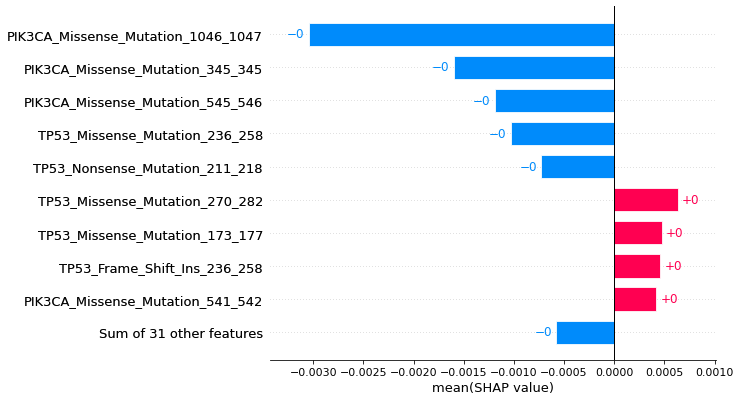

In [139]:
y_pred_simple_Ridge, feature_names_simple_Ridge = Ridge(normalized_X_train, normalized_X_test, y_train, y_test)

### Study of the function Ridge

In [305]:
clf_simple_LogRegr_Ridge = LogisticRegression(penalty="l2", solver="liblinear" , tol=1e-6, max_iter=int(1e6), warm_start=False, intercept_scaling=10000.0, random_state = 123, C=0.01)

In [306]:
clf_simple_LogRegr_Ridge.fit(normalized_X_train, y_train)

LogisticRegression(C=0.01, intercept_scaling=10000.0, max_iter=1000000,
                   random_state=123, solver='liblinear', tol=1e-06)

In [307]:
y_pred_simple_Ridge = clf_simple_LogRegr_Ridge.predict(normalized_X_test)

In [308]:
y_pred_simple_Ridge

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1], dtype=int64)

## Evaluate the model with classification metrics - Ridge Logistic Regression

In [309]:
# Test accuracy 
accuracy_simple_RidgeLogRegr = np.mean(y_test == y_pred_simple_Ridge)
print("Accuracy:", accuracy_simple_RidgeLogRegr)

Accuracy: 0.6575342465753424


In [310]:
cm_simple_RidgeLogRegr = confusion_matrix(y_test, y_pred_simple_Ridge)
print(cm_simple_RidgeLogRegr)

[[18 19]
 [ 6 30]]


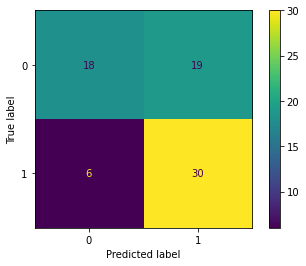

In [311]:
# Plot test confusion matrix
plot_confusion_matrix(clf_simple_LogRegr_Ridge, normalized_X_test, y_test)

In [312]:
print("Precision ", precision(cm_simple_RidgeLogRegr))

Precision  0.6122448979591837


In [313]:
print("Recall:", recall(cm_simple_RidgeLogRegr))

Recall: 0.8333333333333334


In [314]:
print("F1:", f1(cm_simple_RidgeLogRegr))

F1: 0.7058823529411765


In [315]:
tp = np.sum(np.logical_and(y_test == 1, y_pred_simple_Ridge == 1))
tp

30

In [316]:
tn = np.sum(np.logical_and(y_test == 0, y_pred_simple_Ridge == 0))
tn

18

In [317]:
fp = np.sum(np.logical_and(y_test == 0, y_pred_simple_Ridge == 1))
fp

19

In [318]:
fn = np.sum(np.logical_and(y_test == 1, y_pred_simple_Ridge == 0))
fn

6

In [319]:
print("MCC:", mcc(y_test, y_pred_simple_Ridge))

MCC: 0.3403719994299695


# Full Logistic Regression

## Cross-validation

In [99]:
# Create a Logistic Regression model without regularization
logreg_model = LogisticRegression(solver="newton-cg", penalty='none')

# Perform cross-validation (e.g., 5-fold cross-validation)
cv_scores = cross_val_score(logreg_model, normalized_X_train, y_train, cv=5, scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())

Cross-Validation Scores: [0.63636364 0.65909091 0.68181818 0.79545455 0.6744186 ]
Mean CV Accuracy: 0.689429175475687


In [321]:
## POSITIVE CLASS (1)

# Use cross_val_predict to get predictions for each fold in cross-validation
y_pred_logreg = cross_val_predict(logreg_model, normalized_X_train, y_train, cv=5)

# Calculate accuracy for each fold
accuracy_scores_logreg = cross_val_score(logreg_model, normalized_X_train, y_train, cv=5, scoring='accuracy')
# Calculate precision, recall and F1 for each fold
# By default, precision, recall and F1 refer to the positive class (1)
precision_scores_1_logreg = cross_val_score(logreg_model, normalized_X_train, y_train, cv=5, scoring='precision')
recall_scores_1_logreg = cross_val_score(logreg_model, normalized_X_train, y_train, cv=5, scoring='recall')
f1_scores_1_logreg = cross_val_score(logreg_model, normalized_X_train, y_train, cv=5, scoring='f1')

# Calculate the mean cross-validation precision and recall
mean_accuracy_logreg = np.mean(accuracy_scores_logreg)
std_accuracy_logreg = np.std(accuracy_scores_logreg)
mean_precision_1_logreg = np.mean(precision_scores_1_logreg)
std_precision_1_logreg = np.std(precision_scores_1_logreg)
mean_recall_1_logreg = np.mean(recall_scores_1_logreg)
std_recall_1_logreg = np.std(recall_scores_1_logreg)
mean_f1_1_logreg = np.mean(f1_scores_1_logreg)
std_f1_1_logreg = np.std(f1_scores_1_logreg)


# Print the mean cross-validation precision and recall
print("Mean Cross-Validation Accuracy:", mean_accuracy_logreg)
print("Standard Deviation of Accuracy:", std_accuracy_logreg)
print("Mean Cross-Validation Precision - 1:", mean_precision_1_logreg)
print("Standard Deviation of Precision - 1:", std_precision_1_logreg)
print("Mean Cross-Validation Recall - 1:", mean_recall_1_logreg)
print("Standard Deviation of Recall - 1:", std_recall_1_logreg)
print("Mean Cross-Validation F1-score - 1:", mean_f1_1_logreg)
print("Standard Deviation of F1-score - 1:", std_f1_1_logreg)

Mean Cross-Validation Accuracy: 0.689429175475687
Standard Deviation of Accuracy: 0.05524669291201561
Mean Cross-Validation Precision - 1: 0.6872592592592592
Standard Deviation of Precision - 1: 0.037852939029106955
Mean Cross-Validation Recall - 1: 0.7
Standard Deviation of Recall - 1: 0.12727272727272726
Mean Cross-Validation F1-score - 1: 0.6885659536710151
Standard Deviation of F1-score - 1: 0.07178267199700496


In [322]:
# NEGATIVE CLASS (0) 

# 1) PRECISION
# 'make_scorer' defines a custom scoring function for precision of class 0
# 'precision_score' is the scoring function that you want to use as a base
# 'pos_label=0' specifies that you want to calculate precision for class 0
precision_scorer_class0_logreg = make_scorer(precision_score, pos_label=0)

# Calculate precision for class 0 (negative class)
precision_scores_0_logreg = cross_val_score(logreg_model, normalized_X_train, y_train, cv=5, scoring=precision_scorer_class0_logreg)

# 2) RECALL 
# Define a custom scorer for recall of class 0
recall_scorer_class0_logreg = make_scorer(recall_score, pos_label=0)

# Calculate recall for class 0 (negative class)
recall_scores_0_logreg = cross_val_score(logreg_model, normalized_X_train, y_train, cv=5, scoring=recall_scorer_class0_logreg)

# 3) F1-SCORE
# Define a custom scorer for F1-score of class 0
f1_scorer_class0_logreg = make_scorer(f1_score, pos_label=0)

# Calculate F1-score for class 0 (negative class)
f1_scores_0_logreg = cross_val_score(logreg_model, normalized_X_train, y_train, cv=5, scoring=f1_scorer_class0_logreg)

# compute the mean and the standard deviation
mean_precision_0_logreg = np.mean(precision_scores_0_logreg)
std_precision_0_logreg = np.std(precision_scores_0_logreg)
mean_recall_0_logreg = np.mean(recall_scores_0_logreg)
std_recall_0_logreg = np.std(recall_scores_0_logreg)
mean_f1_0_logreg = np.mean(f1_scores_0_logreg)
std_f1_0_logreg = np.std(f1_scores_0_logreg)

print("Mean Cross-Validation Precision - 0:", mean_precision_0_logreg)
print("Standard Deviation of Precision - 0:", std_precision_0_logreg)
print("Mean Cross-Validation Recall - 0:", mean_recall_0_logreg)
print("Standard Deviation of Recall - 0:", std_recall_0_logreg)
print("Mean Cross-Validation F1-score: - 0", mean_f1_0_logreg)
print("Standard Deviation of F1-score: - 0", std_f1_0_logreg)

Mean Cross-Validation Precision - 0: 0.7043896165753751
Standard Deviation of Precision - 0: 0.09398438410730703
Mean Cross-Validation Recall - 0: 0.6796536796536796
Standard Deviation of Recall - 0: 0.061297845274919015
Mean Cross-Validation F1-score: - 0 0.6864725235881122
Standard Deviation of F1-score: - 0 0.04572912961006568


## Full Logistic Regression on the test set 

In [148]:
def Full_LogReg(X_train, X_test, y_train, y_test):

# Definizione dell'istanza del modello
         clf_logreg = LogisticRegression(solver="newton-cg", penalty=None) 
# Addestramento del modello sui dati di training 
         clf_logreg.fit(X_train, y_train)  
# Predizione sui dati di test
         y_pred = clf_logreg.predict(X_test)
# Valutazione del modello
         print(classification_report(y_test, y_pred))
    
         return(y_pred)

In [149]:
y_pred_logreg = Full_LogReg(normalized_X_train, normalized_X_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.82      0.84      0.83        37
           1       0.83      0.81      0.82        36

    accuracy                           0.82        73
   macro avg       0.82      0.82      0.82        73
weighted avg       0.82      0.82      0.82        73



### Study of the full logistic regression function

In [150]:
clf_simple_LogRegr_Full = LogisticRegression(solver="newton-cg", penalty=None)

In [151]:
clf_simple_LogRegr_Full.fit(normalized_X_train, y_train)

LogisticRegression(penalty=None, solver='newton-cg')

In [152]:
y_pred_full_logreg = clf_simple_LogRegr_Full.predict(normalized_X_test)

In [153]:
y_pred_full_logreg

array([1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0], dtype=int64)

## Evaluate the model with classification metrics - Ridge Logistic Regression

In [154]:
# Test accuracy 
accuracy_full_logreg = np.mean(y_test == y_pred_full_logreg)
print("Accuracy:", accuracy_full_logreg)

Accuracy: 0.821917808219178


In [155]:
cm_full_logreg = confusion_matrix(y_test, y_pred_full_logreg)
print(cm_full_logreg)

[[31  6]
 [ 7 29]]


In [156]:
# Plot test confusion matrix
plot_confusion_matrix(clf_simple_LogRegr_Full, normalized_X_test, y_test)

NameError: name 'plot_confusion_matrix' is not defined

In [ ]:
print("Precision ", precision(cm_full_logreg))

In [157]:
print("Recall:", recall(cm_full_logreg))

NameError: name 'recall' is not defined

In [158]:
print("F1:", f1(cm_full_logreg))

NameError: name 'f1' is not defined

In [159]:
tp = np.sum(np.logical_and(y_test == 1, y_pred_full_logreg == 1))
tp

29

In [160]:
tn = np.sum(np.logical_and(y_test == 0, y_pred_full_logreg == 0))
tn

31

In [161]:
fp = np.sum(np.logical_and(y_test == 0, y_pred_full_logreg == 1))
fp

6

In [162]:
fn = np.sum(np.logical_and(y_test == 1, y_pred_full_logreg == 0))
fn

7

In [163]:
print("MCC:", mcc(y_test, y_pred_full_logreg))

NameError: name 'mcc' is not defined

### Study the coefficients of the Full Logistic Regression

In [164]:
coef_logreg = clf_simple_LogRegr_Full.coef_[0]
coef_logreg

array([  0.85545379,  11.84671128,  -1.51807212,   0.33020176,
         1.98507709,  -1.84745988,   1.29686329,  -4.9289722 ,
       -13.57174016,   0.21230579, -13.28405656,   1.43976363,
         0.67098084, -21.16064042,   0.72363748,  -0.44086357,
        12.11450969,  -0.78590401,   0.72363748,   0.        ,
        11.25910717,  11.44356997,  12.84791456,  13.63262777,
        12.90044924,  -0.03539852,  12.11450969,  12.11450969,
        13.21313415,   0.0479955 , -12.18543206,  12.11450969,
        12.11450969,  17.484399  ,  12.11450969,  11.44356997,
       -33.18698249, -11.66060662,  11.62520941,  21.99090007])

In [165]:
len(coef_logreg)

40

In [166]:
# absolute value of the coefficients
abs(coef_logreg)

array([ 0.85545379, 11.84671128,  1.51807212,  0.33020176,  1.98507709,
        1.84745988,  1.29686329,  4.9289722 , 13.57174016,  0.21230579,
       13.28405656,  1.43976363,  0.67098084, 21.16064042,  0.72363748,
        0.44086357, 12.11450969,  0.78590401,  0.72363748,  0.        ,
       11.25910717, 11.44356997, 12.84791456, 13.63262777, 12.90044924,
        0.03539852, 12.11450969, 12.11450969, 13.21313415,  0.0479955 ,
       12.18543206, 12.11450969, 12.11450969, 17.484399  , 12.11450969,
       11.44356997, 33.18698249, 11.66060662, 11.62520941, 21.99090007])

In [167]:
# Create a DataFrame with feature names and their absolute coefficients
features_coefficients_logreg = pd.DataFrame({'Feature': X.columns, 'Absolute Coefficient': abs(coef_logreg)})
features_coefficients_logreg

,Feature,Absolute Coefficient
0,TP53_Missense_Mutation_270_282,0.855454
1,MAML3_In_Frame_Ins_503_503,11.846711
2,PIK3CA_Missense_Mutation_1046_1047,1.518072
3,TP53_Missense_Mutation_173_177,0.330202
4,TP53_Missense_Mutation_236_258,1.985077
5,PIK3CA_Missense_Mutation_545_546,1.847460
6,TP53_Nonsense_Mutation_191_199,1.296863
7,PIK3CA_Missense_Mutation_541_542,4.928972
8,PIK3CA_Missense_Mutation_345_345,13.571740
9,TP53_Frame_Shift_Del_211_218,0.212306


In [168]:
# sort in descending order of absolute coefficient
features_tot_coefficients_logreg_sorted = features_coefficients_logreg.sort_values(by='Absolute Coefficient', ascending=False)
features_tot_coefficients_logreg_sorted

,Feature,Absolute Coefficient
36,PTEN_Frame_Shift_Ins_317_318,33.186982
39,MYL10_Splice_Region_26_26,21.990900
13,PIK3CA_Missense_Mutation_102_113,21.160640
33,PIK3CA_Silent_541_542,17.484399
23,TP53_Nonsense_Mutation_236_258,13.632628
8,PIK3CA_Missense_Mutation_345_345,13.571740
10,PIK3CA_Missense_Mutation_418_420,13.284057
28,TP53_Frame_Shift_Ins_236_258,13.213134
24,TP53_In_Frame_Del_173_177,12.900449
22,NOTCH2_Frame_Shift_Del_2297_2303,12.847915


In [170]:
# Extracting gene name
features_tot_coefficients_logreg_sorted['Hugo_Symbol'] = features_tot_coefficients_logreg_sorted['Feature'].str.split('_').str[0]
features_tot_coefficients_logreg_sorted

,Feature,Absolute Coefficient,Hugo_Symbol
36,PTEN_Frame_Shift_Ins_317_318,33.186982,PTEN
39,MYL10_Splice_Region_26_26,21.990900,MYL10
13,PIK3CA_Missense_Mutation_102_113,21.160640,PIK3CA
33,PIK3CA_Silent_541_542,17.484399,PIK3CA
23,TP53_Nonsense_Mutation_236_258,13.632628,TP53
8,PIK3CA_Missense_Mutation_345_345,13.571740,PIK3CA
10,PIK3CA_Missense_Mutation_418_420,13.284057,PIK3CA
28,TP53_Frame_Shift_Ins_236_258,13.213134,TP53
24,TP53_In_Frame_Del_173_177,12.900449,TP53
22,NOTCH2_Frame_Shift_Del_2297_2303,12.847915,NOTCH2


In [171]:
features_tot_coefficients_logreg_sorted['Hugo_Symbol'].nunique()

10

In [172]:
gsea_prerank_data = features_tot_coefficients_logreg_sorted[['Hugo_Symbol', 'Absolute Coefficient']]
gsea_prerank_data

,Hugo_Symbol,Absolute Coefficient
36,PTEN,33.186982
39,MYL10,21.990900
13,PIK3CA,21.160640
33,PIK3CA,17.484399
23,TP53,13.632628
8,PIK3CA,13.571740
10,PIK3CA,13.284057
28,TP53,13.213134
24,TP53,12.900449
22,NOTCH2,12.847915


In [173]:
# Keep only the first row for each unique gene name
gsea_prerank_data_final = gsea_prerank_data.groupby('Hugo_Symbol').first().reset_index()
gsea_prerank_data_final

,Hugo_Symbol,Absolute Coefficient
0,MAML3,11.846711
1,MTMR12,12.114510
2,MYL10,21.990900
3,NOTCH2,12.847915
4,PIK3CA,21.160640
5,PIK3R1,12.114510
6,PTEN,33.186982
7,TP53,13.632628
8,ZKSCAN1,11.660607
9,ZNF195,11.625209


In [174]:
gsea_prerank_data_final_resorted = gsea_prerank_data_final.sort_values(by='Absolute Coefficient', ascending=False)
gsea_prerank_data_final_resorted

,Hugo_Symbol,Absolute Coefficient
6,PTEN,33.186982
2,MYL10,21.990900
4,PIK3CA,21.160640
7,TP53,13.632628
3,NOTCH2,12.847915
1,MTMR12,12.114510
5,PIK3R1,12.114510
0,MAML3,11.846711
8,ZKSCAN1,11.660607
9,ZNF195,11.625209


In [218]:
os.chdir("C:/Users/Cristina/OneDrive/Documenti/BCG/Tesi/GSEA_prerank_dataset")
gsea_prerank_data_final_resorted.to_csv('6B_FullLogRegCoeff_GSEA_prerank_dataset.txt', index=False, sep='\t')

## Feature importance analysis for Logistic Regression - ShAP (Shapley Additive exPlanations)

In [144]:
# Create a SHAP explainer 
explainer_logreg = shap.LinearExplainer(clf_simple_LogRegr_Full, normalized_X_train)
# Calcola i valori Shapley per le feature del modello addestrato
# Compute the SHAP values for the test data 
shap_values_logreg = explainer_logreg(normalized_X_test) 
shap_values_logreg
#shap_values_logreg = explainer_logreg.shap_values(normalized_X_test)

.values =
array([[-0.11976355, -0.35540068,  0.33397584, ...,  0.23321082,
        -0.23250287, -0.43981682],
       [-0.11976355, -0.35540068,  0.33397584, ...,  0.23321082,
        -0.23250287, -0.43981682],
       [ 0.73569039, -0.35540068,  0.33397584, ...,  0.23321082,
        -0.23250287, -0.43981682],
       ...,
       [ 0.73569039, -0.35540068,  0.33397584, ...,  0.23321082,
        -0.23250287, -0.43981682],
       [-0.11976355, -0.35540068,  0.33397584, ...,  0.23321082,
        -0.23250287, -0.43981682],
       [-0.11976355, -0.35540068,  0.33397584, ...,  0.23321082,
        -0.23250287, -0.43981682]])

.base_values =
array([0.28966212, 0.28966212, 0.28966212, 0.28966212, 0.28966212,
       0.28966212, 0.28966212, 0.28966212, 0.28966212, 0.28966212,
       0.28966212, 0.28966212, 0.28966212, 0.28966212, 0.28966212,
       0.28966212, 0.28966212, 0.28966212, 0.28966212, 0.28966212,
       0.28966212, 0.28966212, 0.28966212, 0.28966212, 0.28966212,
       0.28966212, 0.28966

In [145]:
shap_values_logreg2 = explainer_logreg.shap_values(normalized_X_test) 
shap_values_logreg2

array([[-0.11976355, -0.35540068,  0.33397584, ...,  0.23321082,
        -0.23250287, -0.43981682],
       [-0.11976355, -0.35540068,  0.33397584, ...,  0.23321082,
        -0.23250287, -0.43981682],
       [ 0.73569039, -0.35540068,  0.33397584, ...,  0.23321082,
        -0.23250287, -0.43981682],
       ...,
       [ 0.73569039, -0.35540068,  0.33397584, ...,  0.23321082,
        -0.23250287, -0.43981682],
       [-0.11976355, -0.35540068,  0.33397584, ...,  0.23321082,
        -0.23250287, -0.43981682],
       [-0.11976355, -0.35540068,  0.33397584, ...,  0.23321082,
        -0.23250287, -0.43981682]])

In [146]:
shap_values_logreg2.shape

(73, 40)

In [147]:
# Calculate Absolute Mean SHAP Values
shap_abs_logreg = np.abs(shap_values_logreg2)
# Calculate the Mean of Absolute SHAP Values for Each Instance
# it gives a measure of the average impact of each feature for each instance
k_logreg = shap_abs_logreg.mean(axis=0)
k_logreg

array([2.12574444e-01, 3.55400684e-01, 5.43594544e-01, 6.53619525e-02,
       2.48270578e-01, 2.44472119e-01, 1.12809333e-01, 4.02757798e-01,
       1.80522167e+00, 4.24611565e-03, 1.32840139e-01, 4.31929054e-02,
       7.26130222e-02, 7.01484283e-01, 9.91284209e-03, 1.32259100e-02,
       0.00000000e+00, 3.36969804e-02, 7.23637473e-03, 0.00000000e+00,
       1.12590646e-01, 4.21686171e-01, 3.00956997e-01, 0.00000000e+00,
       1.29004065e-01, 7.07970909e-04, 1.21144670e-01, 1.21144670e-01,
       6.64274598e-01, 4.79954914e-04, 1.21853894e-01, 0.00000000e+00,
       0.00000000e+00, 1.74843563e-01, 1.21144670e-01, 0.00000000e+00,
       3.31868712e-01, 3.86554916e-01, 2.32502872e-01, 4.39816821e-01])

In [148]:
shap_abs_logreg.shape

(73, 40)

In [149]:
k_logreg.shape

(40,)

In [150]:
feature_importance_logreg = pd.DataFrame({'col_name': normalized_X_test.columns, 'feature_importance_vals': k_logreg})
feature_importance_logreg = feature_importance_logreg.sort_values(by='feature_importance_vals', ascending=False)
feature_importance_logreg

,col_name,feature_importance_vals
8,PIK3CA_Missense_Mutation_345_345,1.805222
13,PIK3CA_Missense_Mutation_102_113,0.701484
28,TP53_Frame_Shift_Ins_236_258,0.664275
2,PIK3CA_Missense_Mutation_1046_1047,0.543595
39,MYL10_Splice_Region_26_26,0.439817
21,MTMR12_Missense_Mutation_520_521,0.421686
7,PIK3CA_Missense_Mutation_541_542,0.402758
37,ZKSCAN1_Frame_Shift_Ins_270_270,0.386555
1,MAML3_In_Frame_Ins_503_503,0.355401
36,PTEN_Frame_Shift_Ins_317_318,0.331869


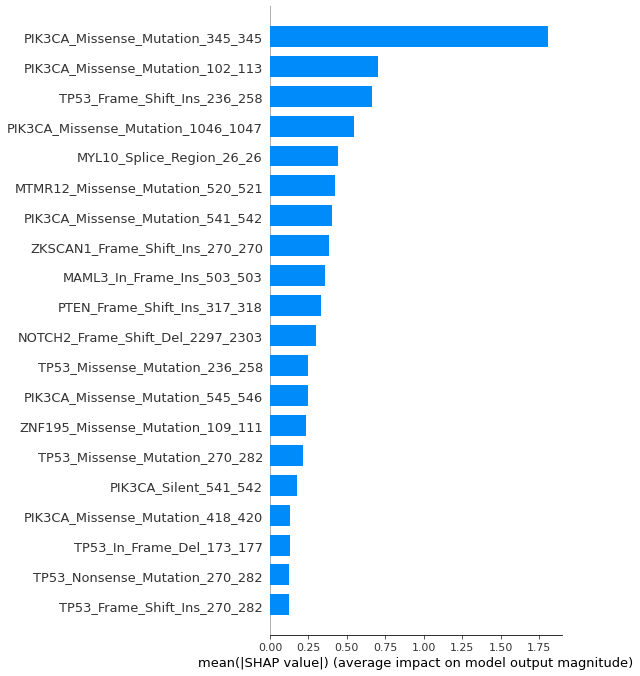

In [151]:
# build a summary barplot that displays the average magnitude and direction of each feature's impact across all samples in the test set
shap.summary_plot(shap_values_logreg, features=normalized_X_train, feature_names=normalized_X_train.columns, plot_type='bar')

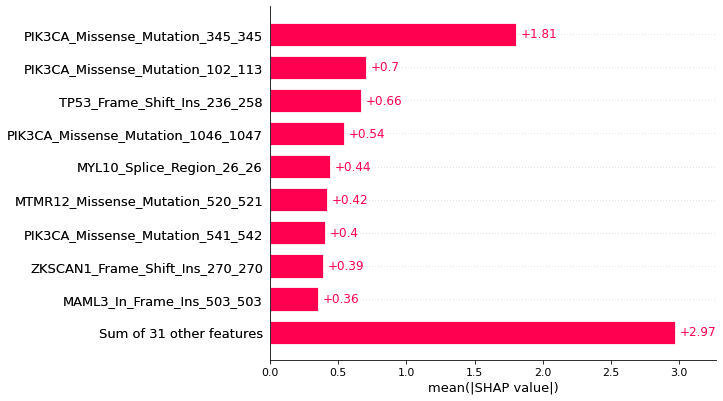

In [152]:
shap.plots.bar(shap_values_logreg)

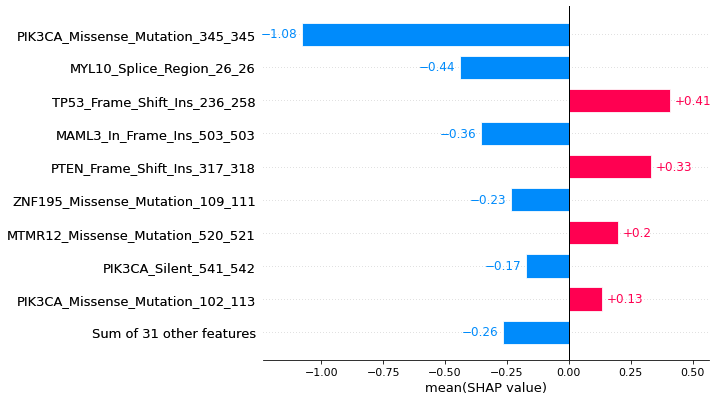

In [153]:
# Visualizza un grafico delle feature più importanti
shap.plots.bar(shap_values_logreg.mean(0))

# Support Vector Machine (SVM)

The SVM algorithm finds a robust solution to the linearly separable problem. That is, there exists a hyperplane $\mathcal{H}_{\left(\mathbf{w}, w_{0}\right)} = \mathbf{w}^{T} \cdot \mathbf{x}+w_{0}=0$, that separates two categories:

$\left\{\begin{array}{ll}{\mathbf{w}^{T} \cdot \mathbf{x}_{i}+w_{0} \geqslant 1,} & {\text { if } y_{i}=+1} \\ {\mathbf{w}^{T} \cdot \mathbf{x}_{i}+w_{0} \leqslant-1,} & {\text { if } y_{i}=-1}\end{array}\right.$

Every training point is either above the hyperplane $\mathcal{H}_{\left(\mathbf{w}, w_{0} - 1\right)}$ or below the hyperplane $\mathcal{H}_{\left(\mathbf{w}, w_{0} + 1\right)}$ . We call them *marginal hyperplanes*. Of course there are infinitely many hyperplanes for which the condition is satisfied, but the **hyperplane with the largest margin** is the one that appears in the Support Vector Machine model. **Margin** is the distance between marginal hyperplanes $M=1 /\|\mathbf{w}\|$.

### Linearly Separable case (hard margins)

Is the solution to the optimization problem:

$\min _{\mathbf{w}, w_{0}}\left\{\frac{1}{2}\|\mathbf{w}\|^{2}\right\}$

$\left\{\begin{array}{ll}{\mathbf{w}^{T} \cdot \mathbf{x}_{i}+w_{0} \geqslant 1,} & {\text { if } y_{i}=+1} \\ {\mathbf{w}^{T} \cdot \mathbf{x}_{i}+w_{0} \leqslant-1,} & {\text { if } y_{i}=-1}\end{array}\right.$


## 1) Linear Kernel

## Grid search to find the optimal parameter for Support Vector Machine

Let's tune the regularization parameter C that controls the trade-off between maximizing the margin (separating the data points as well as possible) and minimizing the classification error (allowing some data points to be misclassified). It's often referred to as the "soft margin" parameter because it allows for some level of misclassification within the training data.

- **Small C (Strong Regularization)**: when 'C' is small, the SVM optimization will focus on finding the largest margin even if it results in some training data points being misclassified. In other words, the model is penalized more for misclassifying data points and, as a result, may have a narrower margin. This is useful when there's a lot of noise in the data, and the goal is to have a more robust and generalized model.
- **Large C (Weak Regularization)**: when 'C' is large, the SVM optimization will strive to classify all training data points correctly, even if it means having a smaller margin. In this case, the model is penalized less for misclassification, and it may be more prone to overfitting the training data. This can be useful when the training data is well-behaved and the goal is to maximize the accuracy on the training data.

GridSearchCV(cv=5, estimator=SVC(kernel='linear'),
             param_grid={'C': array([1.00000000e-02, 2.57384615e+00, 5.13769231e+00, 7.70153846e+00,
       1.02653846e+01, 1.28292308e+01, 1.53930769e+01, 1.79569231e+01,
       2.05207692e+01, 2.30846154e+01, 2.56484615e+01, 2.82123077e+01,
       3.07761538e+01, 3.33400000e+01, 3.59038462e+01, 3.84676923e+01,
       4.10315385e+01, 4.35953846e+01, 4.61592308e+01, 4.87230769e+01,
       5.12869231e+01, 5.38507692e+01, 5.64146154e+01, 5.89784615e+01,
       6.15423077e+01, 6.41061538e+01, 6.66700000e+01, 6.92338462e+01,
       7.17976923e+01, 7.43615385e+01, 7.69253846e+01, 7.94892308e+01,
       8.20530769e+01, 8.46169231e+01, 8.71807692e+01, 8.97446154e+01,
       9.23084615e+01, 9.48723077e+01, 9.74361538e+01, 1.00000000e+02])},
             scoring='accuracy')

Best 'C' for Linear SVM: 2.5738461538461537
Best cv accuracy: 0.7165961945031712


Text(0.5, 0, 'C')

Text(0, 0.5, 'CV-Accuracy')

Text(0.5, 1.0, 'Grid Search Results for Linear Kernel SVM')

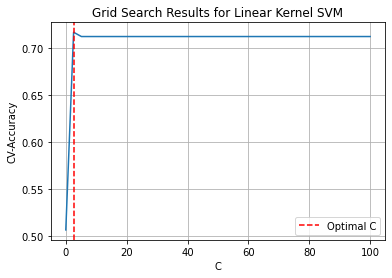

In [340]:
# Define the range of 'C' values to test
param_grid = {'C': np.linspace(0.01, 100, 40)}

# Create a linear kernel SVM and perform grid search
linear_svm = GridSearchCV(SVC(kernel='linear'), param_grid, cv=5, scoring='accuracy', refit=True)
linear_svm.fit(normalized_X_train, y_train)

# Print the best 'C' value and its corresponding accuracy
best_C = linear_svm.best_params_['C']
best_cv_accuracy = linear_svm.best_score_

print("Best 'C' for Linear SVM:", best_C)
print("Best cv accuracy:", best_cv_accuracy)

# Get the best model (trained with the best 'C' value)
best_linear_svm_model = linear_svm.best_estimator_

C_values = np.linspace(0.01, 100, 40)
accuracy_scores = linear_svm.cv_results_['mean_test_score']

best_C = C_values[np.argmax(accuracy_scores)]
max_accuracy = np.max(accuracy_scores)

# Plot the C values against cross-validation accuracy
plt.plot(C_values, accuracy_scores)
plt.axvline(x=best_C, color='r', linestyle='--', label='Optimal C')
plt.xlabel('C')
plt.ylabel('CV-Accuracy')
plt.title('Grid Search Results for Linear Kernel SVM')
plt.legend()
plt.grid()
plt.show()

Best C for Linear SVM: 2.57

### Compute the classification metrics on the cross-validation results

In [341]:
# POSITIVE CLASS (1)

# After fitting the grid search, calculate metrics using cross_val_predict
best_linear_svm_model = linear_svm.best_estimator_  # Get the best Linear SVM model with the optimal C

# Use cross_val_predict to get predictions for each fold in cross-validation
y_pred_linear_svm = cross_val_predict(best_linear_svm_model, normalized_X_train, y_train, cv=5)

# Calculate accuracy for each fold
accuracy_scores_linear_svm = cross_val_score(best_linear_svm_model, normalized_X_train, y_train, cv=5, scoring='accuracy')
# Calculate precision, recall and F1 for each fold
# By default, precision, recall and F1 refer to the positive class (1)
precision_scores_1_linear_svm = cross_val_score(best_linear_svm_model, normalized_X_train, y_train, cv=5, scoring='precision')
recall_scores_1_linear_svm = cross_val_score(best_linear_svm_model, normalized_X_train, y_train, cv=5, scoring='recall')
f1_scores_1_linear_svm = cross_val_score(best_linear_svm_model, normalized_X_train, y_train, cv=5, scoring='f1')

# Calculate the mean cross-validation precision and recall
mean_accuracy_linear_svm = np.mean(accuracy_scores_linear_svm)
std_accuracy_linear_svm = np.std(accuracy_scores_linear_svm)
mean_precision_1_linear_svm = np.mean(precision_scores_1_linear_svm)
std_precision_1_linear_svm = np.std(precision_scores_1_linear_svm)
mean_recall_1_linear_svm = np.mean(recall_scores_1_linear_svm)
std_recall_1_linear_svm = np.std(recall_scores_1_linear_svm)
mean_f1_1_linear_svm = np.mean(f1_scores_1_linear_svm)
std_f1_1_linear_svm = np.std(f1_scores_1_linear_svm)


# Print the mean cross-validation precision and recall
print("Mean Cross-Validation Accuracy:", mean_accuracy_linear_svm)
print("Standard Deviation of Accuracy:", std_accuracy_linear_svm)
print("Mean Cross-Validation Precision - 1:", mean_precision_1_linear_svm)
print("Standard Deviation of Precision - 1:", std_precision_1_linear_svm)
print("Mean Cross-Validation Recall - 1:", mean_recall_1_linear_svm)
print("Standard Deviation of Recall - 1:", std_recall_1_linear_svm)
print("Mean Cross-Validation F1-score - 1:", mean_f1_1_linear_svm)
print("Standard Deviation of F1-score - 1:", std_f1_1_linear_svm)

Mean Cross-Validation Accuracy: 0.7165961945031712
Standard Deviation of Accuracy: 0.05848580336255583
Mean Cross-Validation Precision - 1: 0.6954814814814815
Standard Deviation of Precision - 1: 0.042822503474702144
Mean Cross-Validation Recall - 1: 0.7727272727272727
Standard Deviation of Recall - 1: 0.09090909090909091
Mean Cross-Validation F1-score - 1: 0.7308706672222058
Standard Deviation of F1-score - 1: 0.061466383957164944


In [342]:
# NEGATIVE CLASS (0)

# 1) PRECISION
# 'make_scorer' defines a custom scoring function for precision of class 0
# 'precision_score' is the scoring function that you want to use as a base
# 'pos_label=0' specifies that you want to calculate precision for class 0
precision_scorer_class0_linear_svm = make_scorer(precision_score, pos_label=0)

# Calculate precision for class 0 (negative class)
precision_scores_0_linear_svm = cross_val_score(best_linear_svm_model, normalized_X_train, y_train, cv=5, scoring=precision_scorer_class0_linear_svm)

# 2) RECALL 
# Define a custom scorer for recall of class 0
recall_scorer_class0_linear_svm = make_scorer(recall_score, pos_label=0)

# Calculate recall for class 0 (negative class)
recall_scores_0_linear_svm = cross_val_score(best_linear_svm_model, normalized_X_train, y_train, cv=5, scoring=recall_scorer_class0_linear_svm)

# 3) F1-SCORE
# Define a custom scorer for F1-score of class 0
f1_scorer_class0_linear_svm = make_scorer(f1_score, pos_label=0)

# Calculate F1-score for class 0 (negative class)
f1_scores_0_linear_svm = cross_val_score(best_linear_svm_model, normalized_X_train, y_train, cv=5, scoring=f1_scorer_class0_linear_svm)

# compute the mean and the standard deviation
mean_precision_0_linear_svm = np.mean(precision_scores_0_linear_svm)
std_precision_0_linear_svm = np.std(precision_scores_0_linear_svm)
mean_recall_0_linear_svm = np.mean(recall_scores_0_linear_svm)
std_recall_0_linear_svm = np.std(recall_scores_0_linear_svm)
mean_f1_0_linear_svm = np.mean(f1_scores_0_linear_svm)
std_f1_0_linear_svm = np.std(f1_scores_0_linear_svm)

print("Mean Cross-Validation Precision - 0:", mean_precision_0_linear_svm)
print("Standard Deviation of Precision - 0:", std_precision_0_linear_svm)
print("Mean Cross-Validation Recall - 0:", mean_recall_0_linear_svm)
print("Standard Deviation of Recall - 0:", std_recall_0_linear_svm)
print("Mean Cross-Validation F1-score: - 0", mean_f1_0_linear_svm)
print("Standard Deviation of F1-score: - 0", std_f1_0_linear_svm)

Mean Cross-Validation Precision - 0: 0.7479538418238109
Standard Deviation of Precision - 0: 0.08649968254704692
Mean Cross-Validation Recall - 0: 0.6606060606060605
Standard Deviation of Recall - 0: 0.04555544357082699
Mean Cross-Validation F1-score: - 0 0.6998742985129826
Standard Deviation of F1-score: - 0 0.05592546908945238


# Linear SVM on the test set 

In [343]:
def LinearSVM(X_train, X_test, y_train, y_test):
    # Create an instance of the Linear SVM model
    clf = SVC(kernel='linear', C=2.57)
    
    # Train the model on the training data
    clf.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = clf.predict(X_test)
    
    # Evaluate the model
    print(classification_report(y_test, y_pred))
    
    return y_pred

In [344]:
y_pred_linear_svm = LinearSVM(normalized_X_train, normalized_X_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.79      0.84      0.82        37
           1       0.82      0.78      0.80        36

    accuracy                           0.81        73
   macro avg       0.81      0.81      0.81        73
weighted avg       0.81      0.81      0.81        73



### Study of the Linear SVM function

In [345]:
clf_linear_svm = SVC(kernel='linear', C=2.57)

In [346]:
clf_linear_svm.fit(normalized_X_train, y_train)

SVC(C=2.57, kernel='linear')

In [347]:
y_pred_linear_svm = clf_linear_svm.predict(normalized_X_test)

In [348]:
y_pred_linear_svm

array([1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0], dtype=int64)

## Evaluate the model with classification metrics 

In [349]:
# Test accuracy 
accuracy_linear_svm = np.mean(y_test == y_pred_linear_svm)
print("Accuracy:", accuracy_linear_svm)

Accuracy: 0.8082191780821918


In [350]:
# build the confusion matrix
cm_linear_svm = confusion_matrix(y_test, y_pred_linear_svm)
print(cm_linear_svm)

[[31  6]
 [ 8 28]]


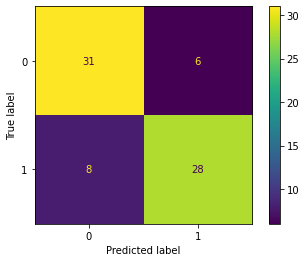

In [351]:
# Plot test confusion matrix
plot_confusion_matrix(clf_linear_svm, normalized_X_test, y_test)

In [352]:
print("Precision ", precision(cm_linear_svm))

Precision  0.8235294117647058


In [353]:
print("Recall:", recall(cm_linear_svm))

Recall: 0.7777777777777778


In [354]:
print("F1:", f1(cm_linear_svm))

F1: 0.7999999999999999


In [355]:
tp = np.sum(np.logical_and(y_test == 1, y_pred_linear_svm == 1))
tp

28

In [356]:
tn = np.sum(np.logical_and(y_test == 0, y_pred_linear_svm == 0))
tn

31

In [357]:
fp = np.sum(np.logical_and(y_test == 0, y_pred_linear_svm == 1))
fp

6

In [358]:
fn = np.sum(np.logical_and(y_test == 1, y_pred_linear_svm == 0))
fn

8

In [359]:
print("MCC:", mcc(y_test, y_pred_linear_svm))

MCC: 0.6170068391200935


# SVM - Polynomial Kernel

## Grid search to find the optimal parameters for SVM polynomial kernel

- **C**: it controls the trade-off between maximizing the margin and minimizing the classification error. It's a regularization parameter.
- **coef0**: coefficient of the polynomial kernel function
- **degree**: it specifies the degree of the polynomial kernel function

In [360]:
# Polynomial
param_grid = {'C': np.linspace(0.001, 100, 5),
              'coef0': np.linspace(-10, 10, 5),
              'degree': [2, 3, 4]}

# Create a polynomial kernel and perform grid search
poly_svm = GridSearchCV(SVC(kernel='poly'), param_grid,
                        cv=5, scoring='accuracy', refit=True)
poly_svm.fit(normalized_X_train, y_train)

# Print the best hyperparameters and their corresponding accuracy
best_C_poly = poly_svm.best_params_['C']
best_degree_poly = poly_svm.best_params_['degree']
best_coef0_poly = poly_svm.best_params_['coef0']
best_cv_accuracy_poly = poly_svm.best_score_

print("Best 'C' for Polynomial SVM:", best_C_poly)
print("Best degree:", best_degree_poly)
print("Best coef0:", best_coef0_poly)
print("Best cv accuracy:", best_cv_accuracy_poly)

# Get the best model (trained with the best hyperparameters)
best_poly_svm_model = poly_svm.best_estimator_

GridSearchCV(cv=5, estimator=SVC(kernel='poly'),
             param_grid={'C': array([1.000000e-03, 2.500075e+01, 5.000050e+01, 7.500025e+01,
       1.000000e+02]),
                         'coef0': array([-10.,  -5.,   0.,   5.,  10.]),
                         'degree': [2, 3, 4]},
             scoring='accuracy')

Best 'C' for Polynomial SVM: 75.00025
Best degree: 3
Best coef0: -5.0
Best cv accuracy: 0.7213530655391119


### Compute the classification metrics on the cross-validation results

In [361]:
# POSITIVE CLASS (1)


# Use cross_val_predict to get predictions for each fold in cross-validation
y_pred_poly_svm = cross_val_predict(best_poly_svm_model, normalized_X_train, y_train, cv=5)

# Calculate accuracy for each fold
accuracy_scores_poly_svm = cross_val_score(best_poly_svm_model, normalized_X_train, y_train, cv=5, scoring='accuracy')
# Calculate precision, recall and F1 for each fold
# By default, precision, recall and F1 refer to the positive class (1)
precision_scores_1_poly_svm = cross_val_score(best_poly_svm_model, normalized_X_train, y_train, cv=5, scoring='precision')
recall_scores_1_poly_svm = cross_val_score(best_poly_svm_model, normalized_X_train, y_train, cv=5, scoring='recall')
f1_scores_1_poly_svm = cross_val_score(best_poly_svm_model, normalized_X_train, y_train, cv=5, scoring='f1')

# Calculate the mean cross-validation precision and recall
mean_accuracy_poly_svm = np.mean(accuracy_scores_poly_svm)
std_accuracy_poly_svm = np.std(accuracy_scores_poly_svm)
mean_precision_1_poly_svm = np.mean(precision_scores_1_poly_svm)
std_precision_1_poly_svm = np.std(precision_scores_1_poly_svm)
mean_recall_1_poly_svm = np.mean(recall_scores_1_poly_svm)
std_recall_1_poly_svm = np.std(recall_scores_1_poly_svm)
mean_f1_1_poly_svm = np.mean(f1_scores_1_poly_svm)
std_f1_1_poly_svm = np.std(f1_scores_1_poly_svm)


# Print the mean cross-validation precision and recall
print("Mean Cross-Validation Accuracy:", mean_accuracy_poly_svm)
print("Standard Deviation of Accuracy:", std_accuracy_poly_svm)
print("Mean Cross-Validation Precision - 1:", mean_precision_1_poly_svm)
print("Standard Deviation of Precision - 1:", std_precision_1_poly_svm)
print("Mean Cross-Validation Recall - 1:", mean_recall_1_poly_svm)
print("Standard Deviation of Recall - 1:", std_recall_1_poly_svm)
print("Mean Cross-Validation F1-score - 1:", mean_f1_1_poly_svm)
print("Standard Deviation of F1-score - 1:", std_f1_1_poly_svm)

Mean Cross-Validation Accuracy: 0.7213530655391119
Standard Deviation of Accuracy: 0.039830272054020045
Mean Cross-Validation Precision - 1: 0.698278582930757
Standard Deviation of Precision - 1: 0.025473322200729204
Mean Cross-Validation Recall - 1: 0.7818181818181819
Standard Deviation of Recall - 1: 0.06680426571226848
Mean Cross-Validation F1-score - 1: 0.7371249011476314
Standard Deviation of F1-score - 1: 0.04209959803442381


In [362]:
# NEGATIVE CLASS (0)

# 1) PRECISION
# 'make_scorer' defines a custom scoring function for precision of class 0
# 'precision_score' is the scoring function that you want to use as a base
# 'pos_label=0' specifies that you want to calculate precision for class 0
precision_scorer_class0_poly_svm = make_scorer(precision_score, pos_label=0)

# Calculate precision for class 0 (negative class)
precision_scores_0_poly_svm = cross_val_score(best_poly_svm_model, normalized_X_train, y_train, cv=5, scoring=precision_scorer_class0_poly_svm)

# 2) RECALL 
# Define a custom scorer for recall of class 0
recall_scorer_class0_poly_svm = make_scorer(recall_score, pos_label=0)

# Calculate recall for class 0 (negative class)
recall_scores_0_poly_svm = cross_val_score(best_poly_svm_model, normalized_X_train, y_train, cv=5, scoring=recall_scorer_class0_poly_svm)

# 3) F1-SCORE
# Define a custom scorer for F1-score of class 0
f1_scorer_class0_poly_svm = make_scorer(f1_score, pos_label=0)

# Calculate F1-score for class 0 (negative class)
f1_scores_0_poly_svm = cross_val_score(best_poly_svm_model, normalized_X_train, y_train, cv=5, scoring=f1_scorer_class0_poly_svm)

# compute the mean and the standard deviation
mean_precision_0_poly_svm = np.mean(precision_scores_0_poly_svm)
std_precision_0_poly_svm = np.std(precision_scores_0_poly_svm)
mean_recall_0_poly_svm = np.mean(recall_scores_0_poly_svm)
std_recall_0_poly_svm = np.std(recall_scores_0_poly_svm)
mean_f1_0_poly_svm = np.mean(f1_scores_0_poly_svm)
std_f1_0_poly_svm = np.std(f1_scores_0_poly_svm)

print("Mean Cross-Validation Precision - 0:", mean_precision_0_poly_svm)
print("Standard Deviation of Precision - 0:", std_precision_0_poly_svm)
print("Mean Cross-Validation Recall - 0:", mean_recall_0_poly_svm)
print("Standard Deviation of Recall - 0:", std_recall_0_poly_svm)
print("Mean Cross-Validation F1-score: - 0", mean_f1_0_poly_svm)
print("Standard Deviation of F1-score: - 0", std_f1_0_poly_svm)

Mean Cross-Validation Precision - 0: 0.7538390092879256
Standard Deviation of Precision - 0: 0.06725584178404759
Mean Cross-Validation Recall - 0: 0.6606060606060605
Standard Deviation of Recall - 0: 0.02055251510037958
Mean Cross-Validation F1-score: - 0 0.703207361743947
Standard Deviation of F1-score: - 0 0.03644075362265053


## Polynomial SVM on the test set 

In [140]:
def PolySVM(X_train, X_test, y_train, y_test):
    # Create an instance of the Linear SVM model
    clf = SVC(kernel='poly', C=75, degree=3, coef0=-5, random_state=123)
    
    # Train the model on the training data
    clf.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = clf.predict(X_test)
    
    # Evaluate the model
    print(classification_report(y_test, y_pred))
    
    return y_pred

In [141]:
y_pred_poly_svm = PolySVM(normalized_X_train, normalized_X_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.82      0.84      0.83        37
           1       0.83      0.81      0.82        36

    accuracy                           0.82        73
   macro avg       0.82      0.82      0.82        73
weighted avg       0.82      0.82      0.82        73



### Study of the Polynomial SVM function

In [176]:
clf_poly_svm = SVC(kernel='poly', C=75, degree=3, coef0=-5, random_state=123)

In [177]:
clf_poly_svm.fit(normalized_X_train, y_train)

SVC(C=75, coef0=-5, kernel='poly', random_state=123)

In [178]:
y_pred_poly_svm = clf_poly_svm.predict(normalized_X_test)

In [179]:
y_pred_poly_svm

array([1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0], dtype=int64)

In [180]:
y_pred_poly_svm_df = pd.DataFrame(y_pred_poly_svm)
y_pred_poly_svm_df = y_pred_poly_svm_df.rename(columns={0: 'Predicted value'})
y_pred_poly_svm_df

,Predicted value
0,1
1,1
2,1
3,1
4,1
...,...
68,0
69,0
70,1
71,0


In [181]:
y_test_df = y_test.to_frame()
y_test_df

,Target
brca_smc_2018_BB01_037,1
brca_smc_2018_BB01_110,1
brca_smc_2018_BB01_126,1
BR-M-045,1
PD4133a,1
...,...
MBCProject_pktAIxFb,0
brca_smc_2018_BR331,0
X01BR015,0
TCGA-AN-A0XS,0


In [182]:
y_test_pts_list = y_test_df.index.to_list()
y_test_pts_list

['brca_smc_2018_BB01_037',
 'brca_smc_2018_BB01_110',
 'brca_smc_2018_BB01_126',
 'BR-M-045',
 'PD4133a',
 'X18BR002',
 'X20BR008',
 'TCGA-A2-A0D0',
 'TCGA-AC-A6IW',
 'TCGA-AN-A0AL',
 'TCGA-AO-A129',
 'TCGA-AR-A0TP',
 'TCGA-AR-A1AJ',
 'TCGA-B6-A0I1',
 'TCGA-B6-A409',
 'TCGA-BH-A0E0',
 'TCGA-C8-A131',
 'TCGA-C8-A1HJ',
 'TCGA-C8-A27B',
 'TCGA-D8-A142',
 'TCGA-D8-A27F',
 'TCGA-E2-A14R',
 'TCGA-E2-A14Y',
 'TCGA-E9-A1N8',
 'TCGA-E9-A244',
 'TCGA-OL-A5S0',
 'MBC_163',
 'MBC_167',
 'MBC_10',
 'MBC_31',
 'MBC_33',
 'MBC_60',
 'MBC_182',
 'MBC_204',
 'MBCProject_d5CbUNTb',
 'MBCProject_oqupfDu7',
 'brca_smc_2018_BB01_017',
 'brca_smc_2018_BB01_130',
 'brca_smc_2018_BR371',
 'X11BR011',
 'X11BR014',
 'X21BR002',
 'TCGA-A1-A0SI',
 'TCGA-A2-A0CL',
 'TCGA-A2-A0EQ',
 'TCGA-A2-A0YH',
 'TCGA-A2-A0YI',
 'TCGA-A7-A0DB',
 'TCGA-A8-A093',
 'TCGA-AC-A23E',
 'TCGA-AO-A03L',
 'TCGA-AO-A03M',
 'TCGA-AO-A0J2',
 'TCGA-AR-A1AV',
 'TCGA-AR-A24S',
 'TCGA-B6-A0X5',
 'TCGA-B6-A401',
 'TCGA-BH-A0BJ',
 'TCGA-BH-A0BO',

In [183]:
# adjust the indices
y_pred_poly_svm_df_2 = y_pred_poly_svm_df.set_index(pd.Index(y_test_pts_list))
y_pred_poly_svm_df_2

,Predicted value
brca_smc_2018_BB01_037,1
brca_smc_2018_BB01_110,1
brca_smc_2018_BB01_126,1
BR-M-045,1
PD4133a,1
...,...
MBCProject_pktAIxFb,0
brca_smc_2018_BR331,0
X01BR015,1
TCGA-AN-A0XS,0


In [184]:
# merge the two dataframes
y_test_and_pred_svm_poly = pd.merge(y_test_df, y_pred_poly_svm_df_2, left_index=True, right_index=True)
y_test_and_pred_svm_poly

,Target,Predicted value
brca_smc_2018_BB01_037,1,1
brca_smc_2018_BB01_110,1,1
brca_smc_2018_BB01_126,1,1
BR-M-045,1,1
PD4133a,1,1
...,...,...
MBCProject_pktAIxFb,0,0
brca_smc_2018_BR331,0,0
X01BR015,0,1
TCGA-AN-A0XS,0,0


In [185]:
y_test_and_pred_svm_poly = y_test_and_pred_svm_poly.reset_index().rename(columns={'index': 'Patient'})
y_test_and_pred_svm_poly

,Patient,Target,Predicted value
0,brca_smc_2018_BB01_037,1,1
1,brca_smc_2018_BB01_110,1,1
2,brca_smc_2018_BB01_126,1,1
3,BR-M-045,1,1
4,PD4133a,1,1
...,...,...,...
68,MBCProject_pktAIxFb,0,0
69,brca_smc_2018_BR331,0,0
70,X01BR015,0,1
71,TCGA-AN-A0XS,0,0


In [186]:
os.chdir("C:/Users/Cristina/OneDrive/Documenti/BCG/Tesi/Test_patients")
y_test_and_pred_svm_poly.to_csv('Test_patients_predicted_values_svm_poly.txt', index=False, sep='\t')

Perform SVM with Polynomial kernel using the parameter: 'probability=True'.
When probability is set to True (as in your example: probability=True), it indicates that the SVC model should be trained to provide class probabilities along with its predictions. This means that after training, you can use the predict_proba method to obtain the probability estimates for each class.

When **probability=True**, the model is trained to predict the probability distribution over classes. This can be useful in scenarios where you not only want the predicted class labels but also want an estimate of how confident the model is in each prediction.

In [187]:
clf_poly_svm_trained = SVC(random_state=123, kernel='poly', C=75, degree=3, coef0=-5).fit(normalized_X_train, y_train)

In [245]:
probabilities = clf_poly_svm_trained.predict_proba(normalized_X_test)
probabilities

AttributeError: predict_proba is not available when  probability=False

The predict_proba method returns an array where each row represents a sample, and each column represents the probability of that sample belonging to a particular class.

## Evaluate the model with classification metrics 

In [162]:
# Test accuracy 
accuracy_poly_svm = np.mean(y_test == y_pred_poly_svm)
print("Accuracy:", accuracy_poly_svm)

Accuracy: 0.821917808219178


In [163]:
# build the confusion matrix
cm_poly_svm = confusion_matrix(y_test, y_pred_poly_svm)
print(cm_poly_svm)

[[31  6]
 [ 7 29]]


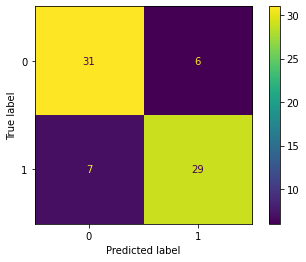

In [164]:
# Plot test confusion matrix
plot_confusion_matrix(clf_poly_svm, normalized_X_test, y_test)

In [165]:
print("Precision ", precision(cm_poly_svm))

Precision  0.8285714285714286


In [166]:
print("Recall:", recall(cm_poly_svm))

Recall: 0.8055555555555556


In [167]:
print("F1:", f1(cm_poly_svm))

F1: 0.8169014084507044


In [168]:
tp = np.sum(np.logical_and(y_test == 1, y_pred_poly_svm == 1))
tp

29

In [169]:
tn = np.sum(np.logical_and(y_test == 0, y_pred_poly_svm == 0))
tn

31

In [170]:
fp = np.sum(np.logical_and(y_test == 0, y_pred_poly_svm == 1))
fp

6

In [171]:
fn = np.sum(np.logical_and(y_test == 1, y_pred_poly_svm == 0))
fn

7

In [172]:
print("MCC:", mcc(y_test, y_pred_poly_svm))

MCC: 0.6438769660985586


## Feature importance analysis for SVM with Polynomial kernel - ShAP (Shapley Additive exPlanations)

In [188]:
shap.initjs()

In [189]:
# Create a SHAP explainer 
explainer_poly_svm = shap.KernelExplainer(clf_poly_svm_trained.predict, normalized_X_train)
# Calcola i valori Shapley per le feature del modello addestrato
# Compute the SHAP values for the test data 
shap_values_poly_svm = explainer_poly_svm.shap_values(normalized_X_test) 
#shap_values_poly_svm = explainer_poly_svm(normalized_X_test)

Using 219 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/73 [00:00<?, ?it/s]

The warning is suggesting that using all the background data samples may lead to slower computations, and it's recommending alternatives to summarize the background using a smaller set of samples for better efficiency.

In [190]:
explainer_poly_svm

In [191]:
shap_values_poly_svm

array([[ 6.79213027e-02,  0.00000000e+00,  1.90324222e-01, ...,
         3.21379573e-02,  0.00000000e+00, -4.03647808e-03],
       [ 0.00000000e+00,  0.00000000e+00,  8.80631858e-02, ...,
         3.19631339e-02,  0.00000000e+00, -3.53743362e-03],
       [-1.23828375e-01,  0.00000000e+00,  1.96979215e-01, ...,
         3.19778082e-02,  0.00000000e+00, -3.16007180e-03],
       ...,
       [-1.24273247e-01,  1.21483805e-04,  1.97008832e-01, ...,
         3.21414865e-02,  0.00000000e+00, -3.60071917e-03],
       [ 0.00000000e+00,  0.00000000e+00, -1.41673041e-02, ...,
         1.70485168e-02,  0.00000000e+00, -7.92443973e-03],
       [ 0.00000000e+00,  0.00000000e+00,  8.95564351e-02, ...,
         1.66980722e-02,  0.00000000e+00, -7.80940763e-03]])

In [192]:
shap_values_poly_svm.shape

(73, 40)

In [193]:
# Calculate Absolute Mean SHAP Values
shap_abs_poly_svm = np.abs(shap_values_poly_svm)
# Calculate the Mean of Absolute SHAP Values for Each Instance
# it gives a measure of the average impact of each feature for each instance
k_poly_svm = shap_abs_poly_svm.mean(axis=0)
k_poly_svm

array([3.13127322e-02, 1.66416171e-06, 2.13176632e-01, 3.88578643e-02,
       3.46700574e-02, 9.02480325e-02, 1.73327781e-02, 9.02312245e-02,
       9.33132144e-02, 6.13722314e-05, 9.83290308e-03, 8.75341432e-03,
       3.45288178e-02, 7.81318403e-03, 0.00000000e+00, 6.38717999e-03,
       6.02625856e-05, 2.68966304e-02, 5.83274713e-05, 0.00000000e+00,
       9.56657475e-05, 7.20394111e-05, 1.57860602e-06, 1.35002214e-03,
       7.52416577e-04, 1.93111857e-03, 1.08592887e-05, 3.10927323e-05,
       0.00000000e+00, 1.02470032e-03, 2.50984130e-03, 3.54242053e-06,
       0.00000000e+00, 3.15767669e-04, 6.79738488e-05, 3.85568112e-05,
       1.10407622e-03, 3.37350573e-02, 2.20351721e-05, 4.91734820e-03])

In [194]:
shap_abs_poly_svm

array([[6.79213027e-02, 0.00000000e+00, 1.90324222e-01, ...,
        3.21379573e-02, 0.00000000e+00, 4.03647808e-03],
       [0.00000000e+00, 0.00000000e+00, 8.80631858e-02, ...,
        3.19631339e-02, 0.00000000e+00, 3.53743362e-03],
       [1.23828375e-01, 0.00000000e+00, 1.96979215e-01, ...,
        3.19778082e-02, 0.00000000e+00, 3.16007180e-03],
       ...,
       [1.24273247e-01, 1.21483805e-04, 1.97008832e-01, ...,
        3.21414865e-02, 0.00000000e+00, 3.60071917e-03],
       [0.00000000e+00, 0.00000000e+00, 1.41673041e-02, ...,
        1.70485168e-02, 0.00000000e+00, 7.92443973e-03],
       [0.00000000e+00, 0.00000000e+00, 8.95564351e-02, ...,
        1.66980722e-02, 0.00000000e+00, 7.80940763e-03]])

In [195]:
shap_abs_poly_svm.shape

(73, 40)

In [196]:
k_poly_svm.shape

(40,)

In [197]:
#feature_importance_poly_svm = pd.DataFrame(list(zip(normalized_X_train.columns, sum(k_poly_svm))), columns=['col_name', 'feature_importance_vals'])


In [198]:
len(normalized_X_test.columns)

40

In [199]:
feature_importance_poly_svm = pd.DataFrame({'col_name': normalized_X_test.columns, 'feature_importance_vals': k_poly_svm})
feature_importance_poly_svm.sort_values(by=['feature_importance_vals'], ascending=False, inplace=True)
feature_importance_poly_svm

,col_name,feature_importance_vals
2,PIK3CA_Missense_Mutation_1046_1047,0.213177
8,PIK3CA_Missense_Mutation_345_345,0.093313
5,PIK3CA_Missense_Mutation_545_546,0.090248
7,PIK3CA_Missense_Mutation_541_542,0.090231
3,TP53_Missense_Mutation_173_177,0.038858
4,TP53_Missense_Mutation_236_258,0.034670
12,TP53_Missense_Mutation_191_199,0.034529
37,ZKSCAN1_Frame_Shift_Ins_270_270,0.033735
0,TP53_Missense_Mutation_270_282,0.031313
17,PIK3CA_In_Frame_Del_102_113,0.026897


In [201]:
# Extracting gene name
feature_importance_poly_svm['Hugo_Symbol'] = feature_importance_poly_svm['col_name'].str.split('_').str[0]
feature_importance_poly_svm

,col_name,feature_importance_vals,Hugo_Symbol
2,PIK3CA_Missense_Mutation_1046_1047,0.213177,PIK3CA
8,PIK3CA_Missense_Mutation_345_345,0.093313,PIK3CA
5,PIK3CA_Missense_Mutation_545_546,0.090248,PIK3CA
7,PIK3CA_Missense_Mutation_541_542,0.090231,PIK3CA
3,TP53_Missense_Mutation_173_177,0.038858,TP53
4,TP53_Missense_Mutation_236_258,0.034670,TP53
12,TP53_Missense_Mutation_191_199,0.034529,TP53
37,ZKSCAN1_Frame_Shift_Ins_270_270,0.033735,ZKSCAN1
0,TP53_Missense_Mutation_270_282,0.031313,TP53
17,PIK3CA_In_Frame_Del_102_113,0.026897,PIK3CA


In [202]:
feature_importance_poly_svm['Hugo_Symbol'].nunique()

10

In [203]:
gsea_prerank_data_svmpoly = feature_importance_poly_svm[['Hugo_Symbol', 'feature_importance_vals']]
gsea_prerank_data_svmpoly

,Hugo_Symbol,feature_importance_vals
2,PIK3CA,0.213177
8,PIK3CA,0.093313
5,PIK3CA,0.090248
7,PIK3CA,0.090231
3,TP53,0.038858
4,TP53,0.034670
12,TP53,0.034529
37,ZKSCAN1,0.033735
0,TP53,0.031313
17,PIK3CA,0.026897


In [204]:
# Keep only the first row for each unique gene name
gsea_prerank_data_final_svmpoly = gsea_prerank_data_svmpoly.groupby('Hugo_Symbol').first().reset_index()
gsea_prerank_data_final_svmpoly

,Hugo_Symbol,feature_importance_vals
0,MAML3,0.000002
1,MTMR12,0.000072
2,MYL10,0.004917
3,NOTCH2,0.000002
4,PIK3CA,0.213177
5,PIK3R1,0.001025
6,PTEN,0.001104
7,TP53,0.038858
8,ZKSCAN1,0.033735
9,ZNF195,0.000022


In [205]:
gsea_prerank_data_final_resorted_svmpoly = gsea_prerank_data_final_svmpoly.sort_values(by='feature_importance_vals', ascending=False)
gsea_prerank_data_final_resorted_svmpoly

,Hugo_Symbol,feature_importance_vals
4,PIK3CA,0.213177
7,TP53,0.038858
8,ZKSCAN1,0.033735
2,MYL10,0.004917
6,PTEN,0.001104
5,PIK3R1,0.001025
1,MTMR12,0.000072
9,ZNF195,0.000022
0,MAML3,0.000002
3,NOTCH2,0.000002


In [217]:
os.chdir("C:/Users/Cristina/OneDrive/Documenti/BCG/Tesi/GSEA_prerank_dataset")
gsea_prerank_data_final_resorted_svmpoly.to_csv('6B_SVMpoly_GSEA_prerank_dataset.txt', index=False, sep='\t')

### Compute the Spearman correlation coefficient between the Full Logistic Regression coefficients and the Shapley values from SVM polynomial


In [207]:
# FULL LOGISTIC REGRESSION COEFFICIENTS 
gsea_prerank_data_final_resorted

,Hugo_Symbol,Absolute Coefficient
6,PTEN,33.186982
2,MYL10,21.990900
4,PIK3CA,21.160640
7,TP53,13.632628
3,NOTCH2,12.847915
1,MTMR12,12.114510
5,PIK3R1,12.114510
0,MAML3,11.846711
8,ZKSCAN1,11.660607
9,ZNF195,11.625209


In [209]:
coeff_FullLog_onlyGenes_list = gsea_prerank_data_final_resorted['Absolute Coefficient'].to_list()
coeff_FullLog_onlyGenes_list

[33.18698249310825,
 21.99090006911093,
 21.16064041793441,
 13.63262776731263,
 12.847914559293486,
 12.114509688749614,
 12.114509688749614,
 11.846711281064785,
 11.660606624368862,
 11.625209413289323]

In [210]:
# SVM polynomial Shapley values
gsea_prerank_data_final_resorted_svmpoly

,Hugo_Symbol,feature_importance_vals
4,PIK3CA,0.213177
7,TP53,0.038858
8,ZKSCAN1,0.033735
2,MYL10,0.004917
6,PTEN,0.001104
5,PIK3R1,0.001025
1,MTMR12,0.000072
9,ZNF195,0.000022
0,MAML3,0.000002
3,NOTCH2,0.000002


In [214]:
# reorder gsea_prerank_data_final_resorted_svmpoly in a way that the genes are on the same order of gsea_prerank_data_final_resorted
# reorder the Lasso features based on Full Log Reg coefficients
gsea_prerank_data_final_resorted_svmpoly_sameorderFull = gsea_prerank_data_final_resorted_svmpoly.set_index('Hugo_Symbol').loc[gsea_prerank_data_final_resorted['Hugo_Symbol']].reset_index()
gsea_prerank_data_final_resorted_svmpoly_sameorderFull

,Hugo_Symbol,feature_importance_vals
0,PTEN,0.001104
1,MYL10,0.004917
2,PIK3CA,0.213177
3,TP53,0.038858
4,NOTCH2,0.000002
5,MTMR12,0.000072
6,PIK3R1,0.001025
7,MAML3,0.000002
8,ZKSCAN1,0.033735
9,ZNF195,0.000022


In [215]:
shap_svmPoly_onlyGenes_list = gsea_prerank_data_final_resorted_svmpoly_sameorderFull['feature_importance_vals'].to_list()
shap_svmPoly_onlyGenes_list

[0.0011040762219599607,
 0.004917348196637215,
 0.2131766323338412,
 0.03885786428687308,
 1.5786060204901505e-06,
 7.203941110067116e-05,
 0.0010247003222240802,
 1.6641617099355521e-06,
 0.033735057329447156,
 2.2035172109586255e-05]

In [216]:
# SPEARMAN COEFFICIENT
import scipy.stats

# Calculate Spearman correlation coefficient and p-value
rho, p_value = scipy.stats.spearmanr(coeff_FullLog_onlyGenes_list, shap_svmPoly_onlyGenes_list)

print(f"Spearman correlation coefficient: {rho}")
print(f"P-value: {p_value}")

Spearman correlation coefficient: 0.4255338805760452
P-value: 0.22017919518735943


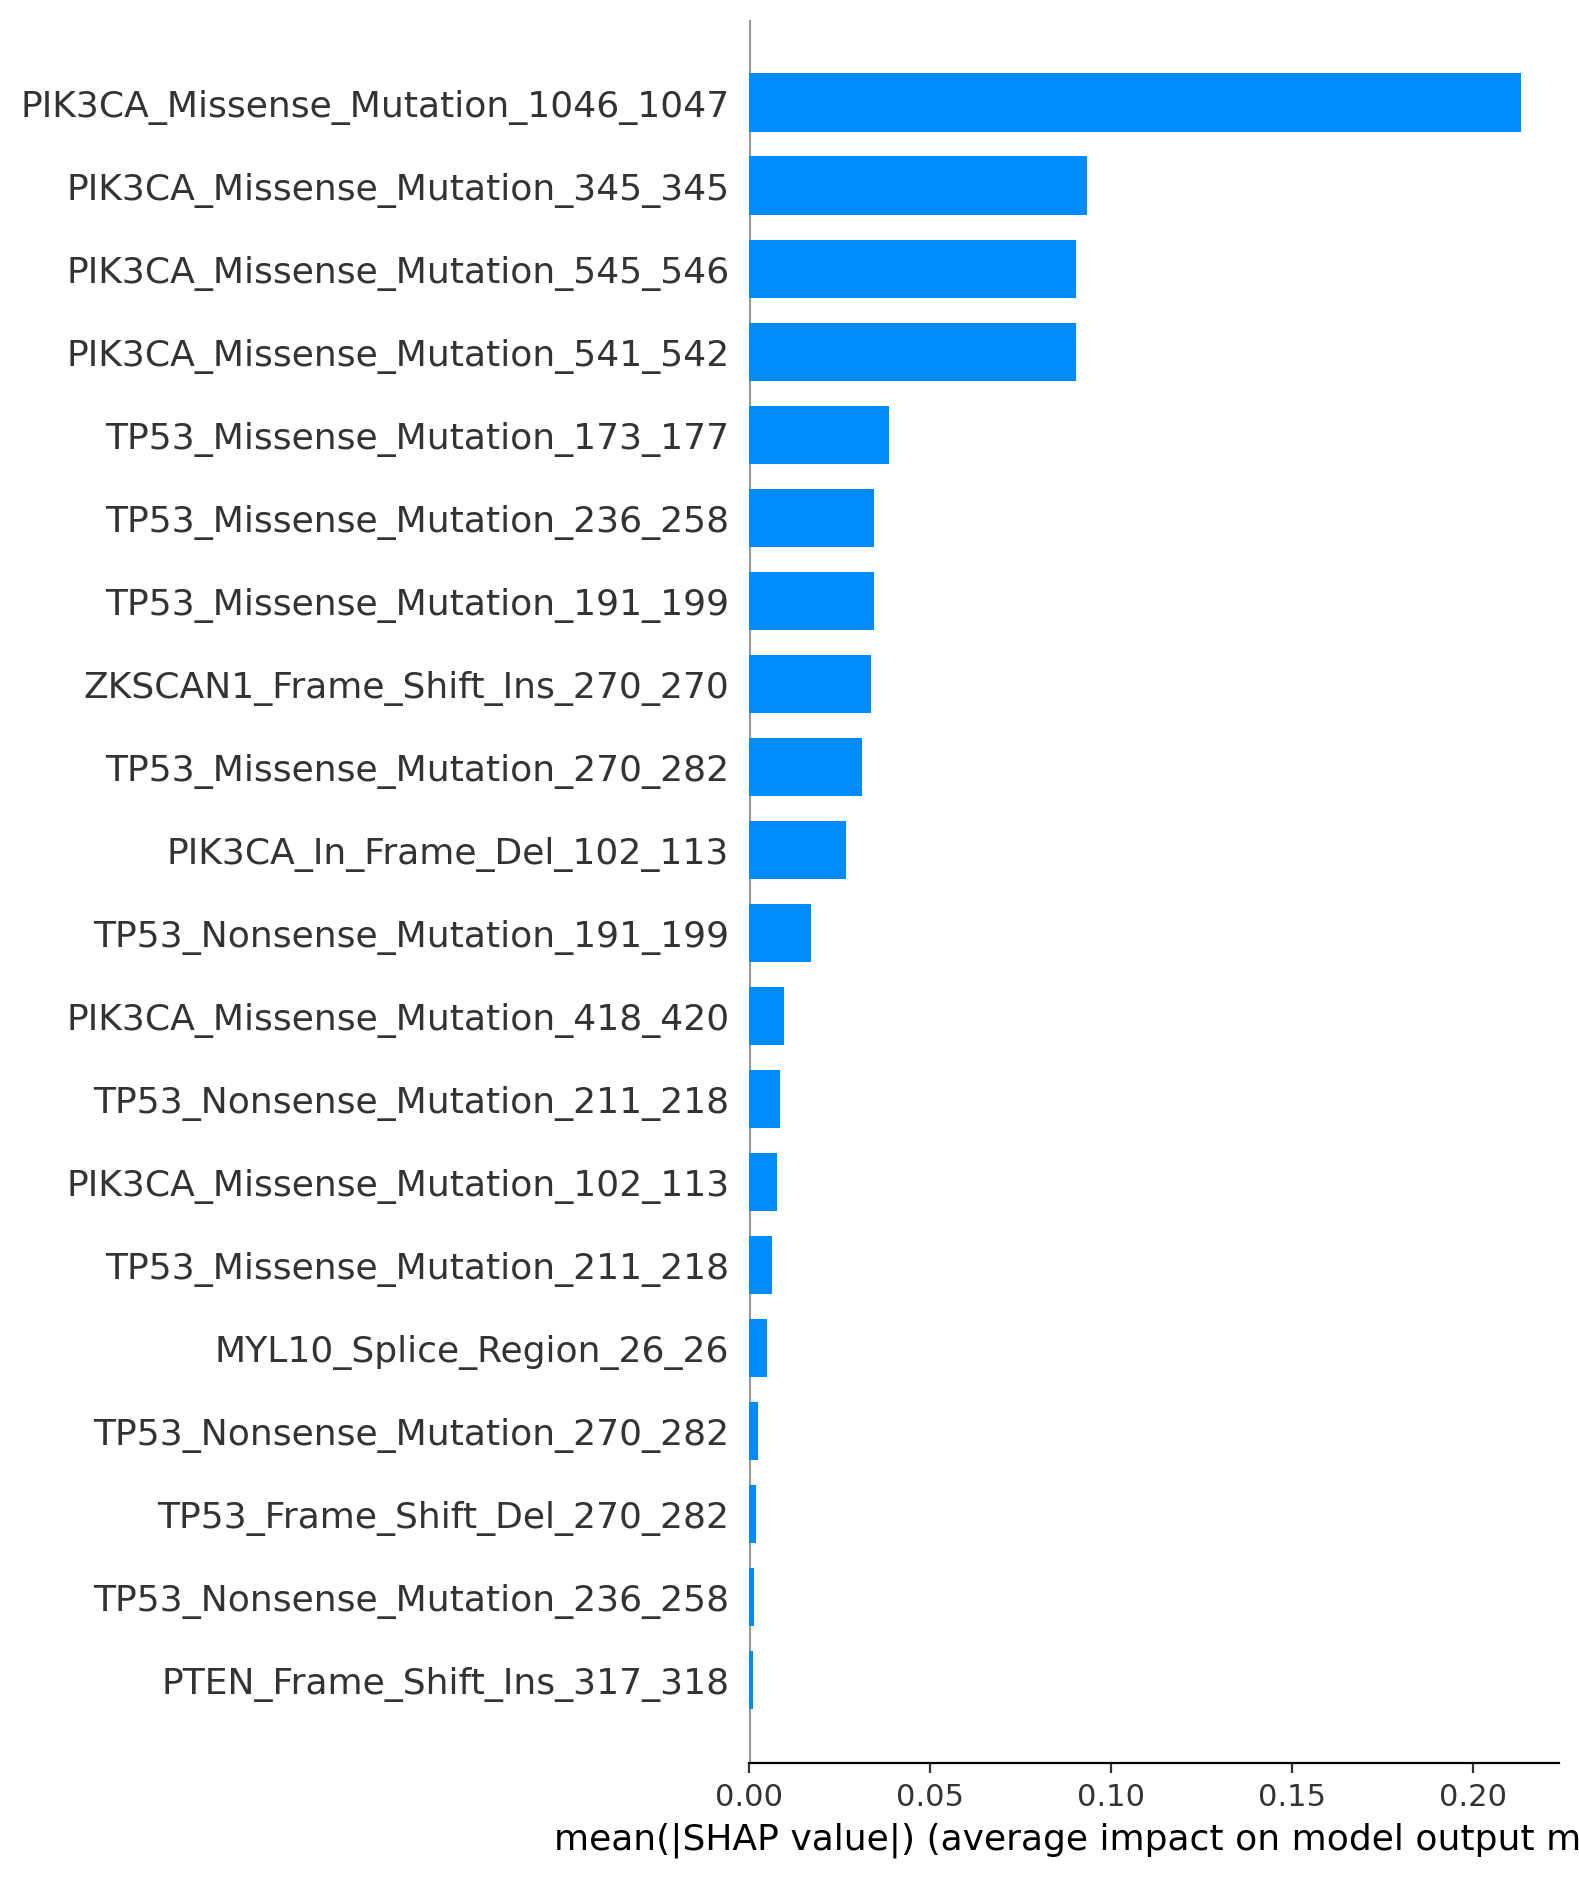

In [200]:
shap.summary_plot(shap_values_poly_svm, normalized_X_test, plot_type='bar')

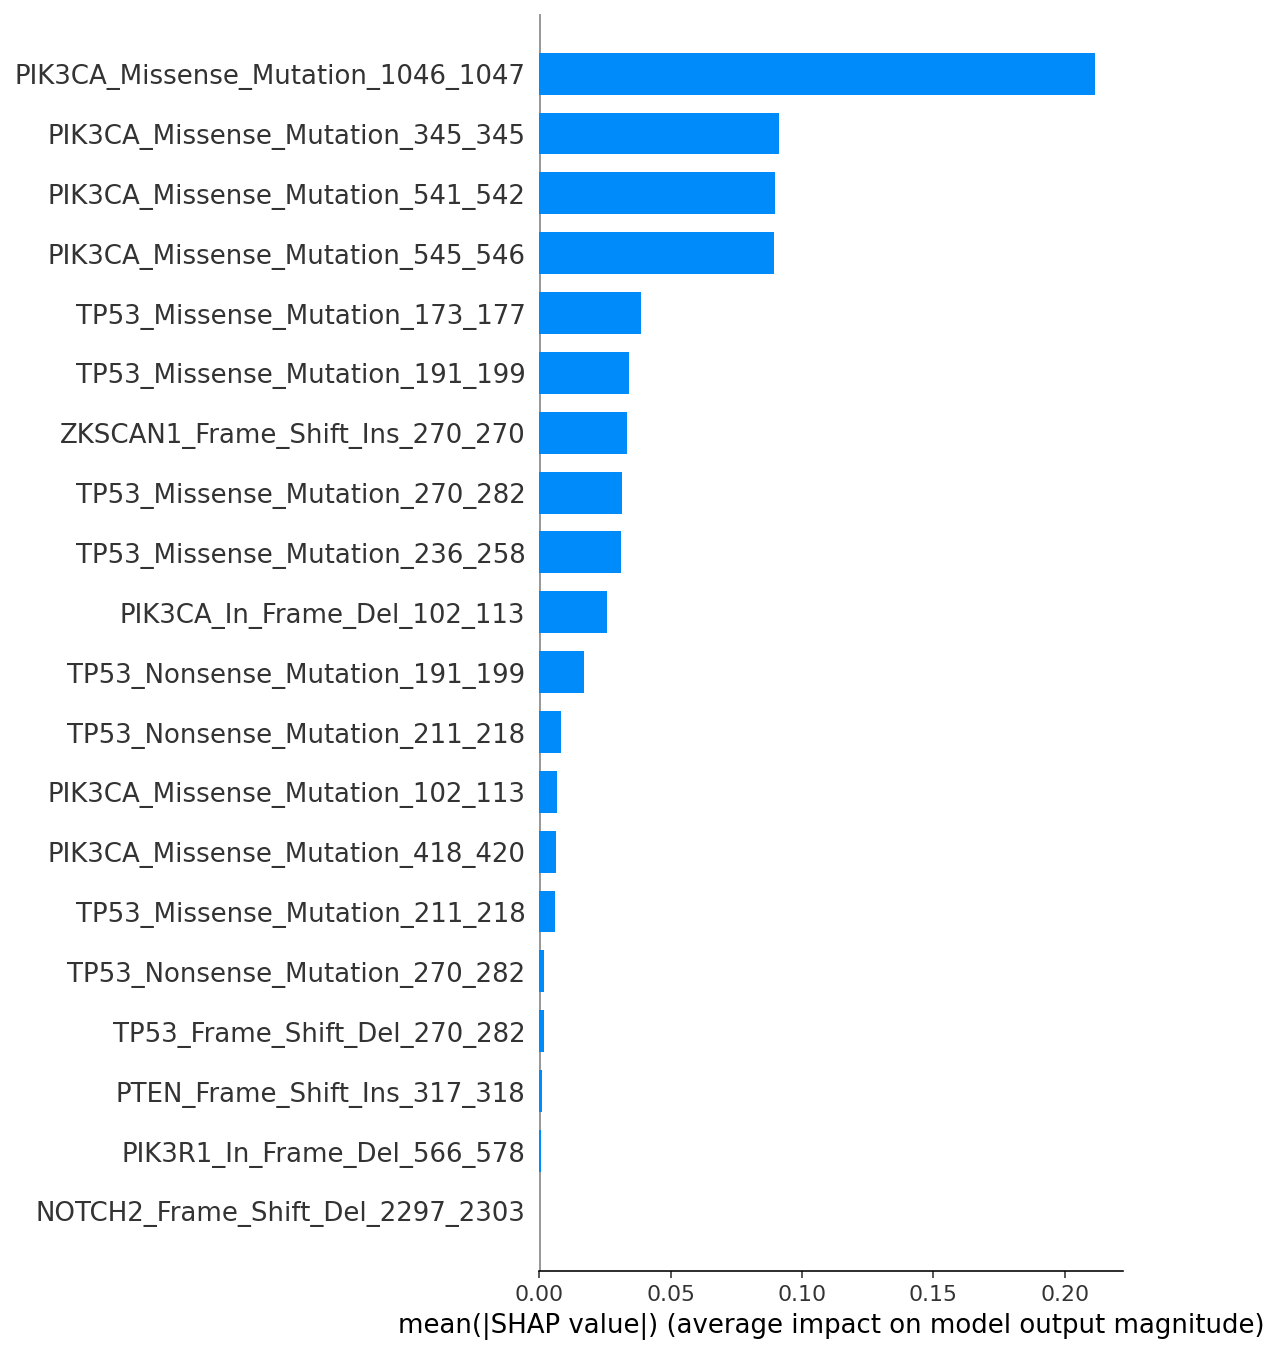

In [267]:
# build a summary barplot that displays the average magnitude and direction of each feature's impact across all samples in the test set
shap.summary_plot(shap_values_poly_svm, features=normalized_X_train, feature_names=normalized_X_train.columns, plot_type='bar')

In [269]:
#shap.plots.bar(shap_values_poly_svm)

# SMV - Radial Kernel

## Grid search to find the optimal parameters for SVM radial kernel

- **C**: it controls the trade-off between maximizing the margin and minimizing the classification error. It's a regularization parameter.
- **Gamma**: kernel coefficient that controls the flexibility of the SVM's decision boundary: 

        1. Small Gamma (e.g., 0.01): The decision boundary is smoother and broader. It considers more data points and is less likely to overfit.
        2. Large Gamma (e.g., 10): The decision boundary is more flexible, curving closely to individual data points. It's more likely to overfit.

In [380]:
# RBF (Radial Basis Function) kernel
param_grid = {'C': np.linspace(0.001, 100, 5),
              'gamma': np.linspace(0.001, 100, 5)}

# Create an RBF kernel SVM and perform grid search
rbf_svm = GridSearchCV(SVC(kernel='rbf'), param_grid, 
                        cv=5, scoring='accuracy', refit=True)
rbf_svm.fit(normalized_X_train, y_train)

# Print the best hyperparameters and their corresponding accuracy
best_C_rbf = rbf_svm.best_params_['C']
best_gamma_rbf = rbf_svm.best_params_['gamma']
best_cv_accuracy_rbf = rbf_svm.best_score_

print("Best 'C' for RBF SVM:", best_C_rbf)
print("Best gamma:", best_gamma_rbf)
print("Best cv accuracy:", best_cv_accuracy_rbf)

# Get the best model (trained with the best hyperparameters)
best_rbf_svm_model = rbf_svm.best_estimator_

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': array([1.000000e-03, 2.500075e+01, 5.000050e+01, 7.500025e+01,
       1.000000e+02]),
                         'gamma': array([1.000000e-03, 2.500075e+01, 5.000050e+01, 7.500025e+01,
       1.000000e+02])},
             scoring='accuracy')

Best 'C' for RBF SVM: 25.00075
Best gamma: 25.00075
Best cv accuracy: 0.7076109936575052


### Compute the classification metrics on the cross-validation results

In [381]:
# Use cross_val_predict to get predictions for each fold in cross-validation
y_pred_radial_svm = cross_val_predict(best_rbf_svm_model, normalized_X_train, y_train, cv=5)

# Calculate accuracy for each fold
accuracy_scores_radial_svm = cross_val_score(best_rbf_svm_model, normalized_X_train, y_train, cv=5, scoring='accuracy')
# Calculate precision, recall and F1 for each fold
# By default, precision, recall and F1 refer to the positive class (1)
precision_scores_1_radial_svm = cross_val_score(best_rbf_svm_model, normalized_X_train, y_train, cv=5, scoring='precision')
recall_scores_1_radial_svm = cross_val_score(best_rbf_svm_model, normalized_X_train, y_train, cv=5, scoring='recall')
f1_scores_1_radial_svm = cross_val_score(best_rbf_svm_model, normalized_X_train, y_train, cv=5, scoring='f1')

# Calculate the mean cross-validation precision and recall
mean_accuracy_radial_svm = np.mean(accuracy_scores_radial_svm)
std_accuracy_radial_svm = np.std(accuracy_scores_radial_svm)
mean_precision_1_radial_svm = np.mean(precision_scores_1_radial_svm)
std_precision_1_radial_svm = np.std(precision_scores_1_radial_svm)
mean_recall_1_radial_svm = np.mean(recall_scores_1_radial_svm)
std_recall_1_radial_svm = np.std(recall_scores_1_radial_svm)
mean_f1_1_radial_svm = np.mean(f1_scores_1_radial_svm)
std_f1_1_radial_svm = np.std(f1_scores_1_radial_svm)


# Print the mean cross-validation precision and recall
print("Mean Cross-Validation Accuracy:", mean_accuracy_radial_svm)
print("Standard Deviation of Accuracy:", std_accuracy_radial_svm)
print("Mean Cross-Validation Precision - 1:", mean_precision_1_radial_svm)
print("Standard Deviation of Precision - 1:", std_precision_1_radial_svm)
print("Mean Cross-Validation Recall - 1:", mean_recall_1_radial_svm)
print("Standard Deviation of Recall - 1:", std_recall_1_radial_svm)
print("Mean Cross-Validation F1-score - 1:", mean_f1_1_radial_svm)
print("Standard Deviation of F1-score - 1:", std_f1_1_radial_svm)

Mean Cross-Validation Accuracy: 0.7076109936575052
Standard Deviation of Accuracy: 0.03471578514311313
Mean Cross-Validation Precision - 1: 0.6685714285714286
Standard Deviation of Precision - 1: 0.01822012044734187
Mean Cross-Validation Recall - 1: 0.8272727272727274
Standard Deviation of Recall - 1: 0.07272727272727272
Mean Cross-Validation F1-score - 1: 0.7385464473414785
Standard Deviation of F1-score - 1: 0.03740247048947611


In [382]:
# NEGATIVE CLASS (0)

# 1) PRECISION
# 'make_scorer' defines a custom scoring function for precision of class 0
# 'precision_score' is the scoring function that you want to use as a base
# 'pos_label=0' specifies that you want to calculate precision for class 0
precision_scorer_class0_radial_svm = make_scorer(precision_score, pos_label=0)

# Calculate precision for class 0 (negative class)
precision_scores_0_radial_svm = cross_val_score(best_rbf_svm_model, normalized_X_train, y_train, cv=5, scoring=precision_scorer_class0_radial_svm)

# 2) RECALL 
# Define a custom scorer for recall of class 0
recall_scorer_class0_radial_svm = make_scorer(recall_score, pos_label=0)

# Calculate recall for class 0 (negative class)
recall_scores_0_radial_svm = cross_val_score(best_rbf_svm_model, normalized_X_train, y_train, cv=5, scoring=recall_scorer_class0_radial_svm)

# 3) F1-SCORE
# Define a custom scorer for F1-score of class 0
f1_scorer_class0_radial_svm = make_scorer(f1_score, pos_label=0)

# Calculate F1-score for class 0 (negative class)
f1_scores_0_radial_svm = cross_val_score(best_rbf_svm_model, normalized_X_train, y_train, cv=5, scoring=f1_scorer_class0_radial_svm)

# compute the mean and the standard deviation
mean_precision_0_radial_svm = np.mean(precision_scores_0_radial_svm)
std_precision_0_radial_svm = np.std(precision_scores_0_radial_svm)
mean_recall_0_radial_svm = np.mean(recall_scores_0_radial_svm)
std_recall_0_radial_svm = np.std(recall_scores_0_radial_svm)
mean_f1_0_radial_svm = np.mean(f1_scores_0_radial_svm)
std_f1_0_radial_svm = np.std(f1_scores_0_radial_svm)

print("Mean Cross-Validation Precision - 0:", mean_precision_0_radial_svm)
print("Standard Deviation of Precision - 0:", std_precision_0_radial_svm)
print("Mean Cross-Validation Recall - 0:", mean_recall_0_radial_svm)
print("Standard Deviation of Recall - 0:", std_recall_0_radial_svm)
print("Mean Cross-Validation F1-score: - 0", mean_f1_0_radial_svm)
print("Standard Deviation of F1-score: - 0", std_f1_0_radial_svm)

Mean Cross-Validation Precision - 0: 0.7784387439186201
Standard Deviation of Precision - 0: 0.08075236853851298
Mean Cross-Validation Recall - 0: 0.5874458874458874
Standard Deviation of Recall - 0: 0.023655543016994397
Mean Cross-Validation F1-score: - 0 0.6674269005847954
Standard Deviation of F1-score: - 0 0.030306619073612675


### Radial SVM on the test set 

In [132]:
def RadialSVM(X_train, X_test, y_train, y_test):
    # Create an instance of the Linear SVM model
    clf = SVC(kernel='rbf', C=25, gamma=25)
    
    # Train the model on the training data
    clf.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = clf.predict(X_test)
    
    # Evaluate the model
    print(classification_report(y_test, y_pred))
    
    return y_pred

In [133]:
y_pred_radial_svm = RadialSVM(normalized_X_train, normalized_X_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.84      0.73      0.78        37
           1       0.76      0.86      0.81        36

    accuracy                           0.79        73
   macro avg       0.80      0.80      0.79        73
weighted avg       0.80      0.79      0.79        73



### Study of the Radial SVM function

In [134]:
clf_radial_svm = SVC(kernel='rbf', C=25, gamma=25)

In [135]:
clf_radial_svm.fit(normalized_X_train, y_train)

SVC(C=25, gamma=25)

In [136]:
y_pred_radial_svm = clf_radial_svm.predict(normalized_X_test)

In [138]:
y_pred_radial_svm

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0], dtype=int64)

## Evaluate the model with classification metrics 

In [139]:
# Test accuracy 
accuracy_radial_svm = np.mean(y_test == y_pred_radial_svm)
print("Accuracy:", accuracy_radial_svm)

Accuracy: 0.7945205479452054


In [390]:
# build the confusion matrix
cm_radial_svm = confusion_matrix(y_test, y_pred_radial_svm)
print(cm_radial_svm)

[[27 10]
 [ 5 31]]


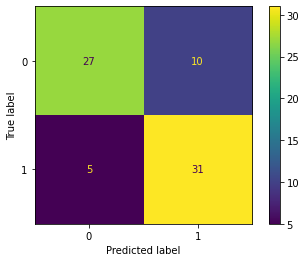

In [391]:
# Plot test confusion matrix
plot_confusion_matrix(clf_radial_svm, normalized_X_test, y_test)

In [392]:
print("Precision ", precision(cm_radial_svm))

Precision  0.7560975609756098


In [393]:
print("Recall:", recall(cm_radial_svm))

Recall: 0.8611111111111112


In [394]:
print("F1:", f1(cm_radial_svm))

F1: 0.8051948051948052


In [395]:
tp = np.sum(np.logical_and(y_test == 1, y_pred_radial_svm == 1))
tp

31

In [396]:
tn = np.sum(np.logical_and(y_test == 0, y_pred_radial_svm == 0))
tn

27

In [397]:
fp = np.sum(np.logical_and(y_test == 0, y_pred_radial_svm == 1))
fp

10

In [398]:
fn = np.sum(np.logical_and(y_test == 1, y_pred_radial_svm == 0))
fn

5

In [399]:
print("MCC:", mcc(y_test, y_pred_radial_svm))

MCC: 0.5953271682891322


# Random Forest

## Grid search to find the optimal parameters for Random Forest 

Perform a GridSearch for the mtry parameter of Random Forest.
The GridSearchCV will automatically perform cross-validation, evaluate the performance of the Random Forest with different 'max_features' values, and return the best parameter value based on the chosen scoring metric.

**NOTE 1:** the 'max_features' parameter determines the number of features randomly selected at each split point when building a tree in a random forest: a smaller 'max_features' value leads to more randomness and diversity among the trees, while a larger 'max_features' value reduces the randomness and increases the correlation between the trees.

**NOTE 2:** the Out-Of-Bag (OOB) score is a measure of a model's accuracy. It is calculated based on out-of-bag samples, which are the data points that were not used during training for each tree in the Random Forest. These out-of-bag samples are used to estimate the model's accuracy without the need for a separate validation set. The OOB score is a valuable metric because it provides an estimate of how well the Random Forest model is likely to perform on unseen data.

In [400]:
from sklearn.ensemble import RandomForestClassifier

# Define the Random Forest Classifier
rf = RandomForestClassifier(random_state=123, oob_score=True)

# Define the grid of parameters to search over, including max_features and n_estimators
param_grid = {
    'max_features': [15, 18, 20, 25, 30, 31, 32, 33, 40],
    'n_estimators': [100, 200, 300, 400]  # Specify the values of n_estimators to try
}

# Create an instance of GridSearchCV and pass the Random Forest classifier, parameter grid, and desired number of cross-validation folds
grid_search_random_forest = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)

# Fit the Grid search object to your data
grid_search_random_forest.fit(normalized_X_train, y_train)

print("Best parameters:", grid_search_random_forest.best_params_)
print("Best cross-validation score (accuracy):", grid_search_random_forest.best_score_)
print("OOB score of best model:", grid_search_random_forest.best_estimator_.oob_score_)


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(oob_score=True, random_state=123),
             param_grid={'max_features': [15, 18, 20, 25, 30, 31, 32, 33, 40],
                         'n_estimators': [100, 200, 300, 400]})

Best parameters: {'max_features': 15, 'n_estimators': 100}
Best cross-validation score (accuracy): 0.6937632135306554
OOB score of best model: 0.7031963470319634


### Compute the classification metrics on the cross-validation results 

In [403]:
# POSITIVE CLASS (1)

# After fitting the grid search, calculate metrics using cross_val_predict
best_rf_model = grid_search_random_forest.best_estimator_  # Get the best Random Forest model with the optimal parameters

# Use cross_val_predict to get predictions for each fold in cross-validation
y_pred_rf = cross_val_predict(best_rf_model, normalized_X_train, y_train, cv=5)

# Calculate accuracy for each fold
accuracy_scores_rf = cross_val_score(best_rf_model, normalized_X_train, y_train, cv=5, scoring='accuracy')
# Calculate precision, recall and F1 for each fold
# By default, precision, recall and F1 refer to the positive class (1)
precision_scores_1_rf = cross_val_score(best_rf_model, normalized_X_train, y_train, cv=5, scoring='precision')
recall_scores_1_rf = cross_val_score(best_rf_model, normalized_X_train, y_train, cv=5, scoring='recall')
f1_scores_1_rf = cross_val_score(best_rf_model, normalized_X_train, y_train, cv=5, scoring='f1')

# Calculate the mean cross-validation precision and recall
mean_accuracy_rf = np.mean(accuracy_scores_rf)
std_accuracy_rf = np.std(accuracy_scores_rf)
mean_precision_1_rf = np.mean(precision_scores_1_rf)
std_precision_1_rf = np.std(precision_scores_1_rf)
mean_recall_1_rf = np.mean(recall_scores_1_rf)
std_recall_1_rf = np.std(recall_scores_1_rf)
mean_f1_1_rf = np.mean(f1_scores_1_rf)
std_f1_1_rf = np.std(f1_scores_1_rf)


# Print the mean cross-validation precision and recall
print("Mean Cross-Validation Accuracy:", mean_accuracy_rf)
print("Standard Deviation of Accuracy:", std_accuracy_rf)
print("Mean Cross-Validation Precision - 1:", mean_precision_1_rf)
print("Standard Deviation of Precision - 1:", std_precision_1_rf)
print("Mean Cross-Validation Recall - 1:", mean_recall_1_rf)
print("Standard Deviation of Recall - 1:", std_recall_1_rf)
print("Mean Cross-Validation F1-score - 1:", mean_f1_1_rf)
print("Standard Deviation of F1-score - 1:", std_f1_1_rf)

Mean Cross-Validation Accuracy: 0.6937632135306554
Standard Deviation of Accuracy: 0.04220870799379741
Mean Cross-Validation Precision - 1: 0.6841688311688311
Standard Deviation of Precision - 1: 0.030758450380708877
Mean Cross-Validation Recall - 1: 0.7272727272727273
Standard Deviation of Recall - 1: 0.10365231137264892
Mean Cross-Validation F1-score - 1: 0.7014508451770246
Standard Deviation of F1-score - 1: 0.0569756958307329


In [404]:
# NEGATIVE CLASS (0)

# 1) PRECISION
# 'make_scorer' defines a custom scoring function for precision of class 0
# 'precision_score' is the scoring function that you want to use as a base
# 'pos_label=0' specifies that you want to calculate precision for class 0
precision_scorer_class0_rf = make_scorer(precision_score, pos_label=0)

# Calculate precision for class 0 (negative class)
precision_scores_0_rf = cross_val_score(best_rf_model, normalized_X_train, y_train, cv=5, scoring=precision_scorer_class0_rf)

# 2) RECALL 
# Define a custom scorer for recall of class 0
recall_scorer_class0_rf = make_scorer(recall_score, pos_label=0)

# Calculate recall for class 0 (negative class)
recall_scores_0_rf = cross_val_score(best_rf_model, normalized_X_train, y_train, cv=5, scoring=recall_scorer_class0_rf)

# 3) F1-SCORE
# Define a custom scorer for F1-score of class 0
f1_scorer_class0_rf = make_scorer(f1_score, pos_label=0)

# Calculate F1-score for class 0 (negative class)
f1_scores_0_rf = cross_val_score(best_rf_model, normalized_X_train, y_train, cv=5, scoring=f1_scorer_class0_rf)

# compute the mean and the standard deviation
mean_precision_0_rf = np.mean(precision_scores_0_rf)
std_precision_0_rf = np.std(precision_scores_0_rf)
mean_recall_0_rf = np.mean(recall_scores_0_rf)
std_recall_0_rf = np.std(recall_scores_0_rf)
mean_f1_0_rf = np.mean(f1_scores_0_rf)
std_f1_0_rf = np.std(f1_scores_0_rf)

print("Mean Cross-Validation Precision - 0:", mean_precision_0_rf)
print("Standard Deviation of Precision - 0:", std_precision_0_rf)
print("Mean Cross-Validation Recall - 0:", mean_recall_0_rf)
print("Standard Deviation of Recall - 0:", std_recall_0_rf)
print("Mean Cross-Validation F1-score: - 0", mean_f1_0_rf)
print("Standard Deviation of F1-score: - 0", std_f1_0_rf)

Mean Cross-Validation Precision - 0: 0.7147966507177034
Standard Deviation of Precision - 0: 0.07078792943688689
Mean Cross-Validation Recall - 0: 0.6610389610389611
Standard Deviation of Recall - 0: 0.05914440278823739
Mean Cross-Validation F1-score: - 0 0.6824178444762248
Standard Deviation of F1-score: - 0 0.03542758455408682


In [405]:
def RF(X_train, X_test, y_train, y_test):
    
    clf = RandomForestClassifier(max_features=15, n_estimators=100, random_state=123) # The default value for max_features in scikit-learn's RandomForestClassifier is "auto", which means that the number of features considered for splitting at each tree node is equal to the square root of the total number of features.

    clf.fit(X_train, y_train.values.ravel())

    y_pred = clf.predict(X_test)

    # Valutazione del modello
    print(classification_report(y_test, y_pred))
    
    return y_pred

In [406]:
y_pred_rf = RF(normalized_X_train, normalized_X_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.82      0.84      0.83        37
           1       0.83      0.81      0.82        36

    accuracy                           0.82        73
   macro avg       0.82      0.82      0.82        73
weighted avg       0.82      0.82      0.82        73



### Study the Random Forest function

In [407]:
clf_rf = RandomForestClassifier(max_features=15, n_estimators=100, random_state=123)

In [408]:
clf_rf.fit(normalized_X_train, y_train)

RandomForestClassifier(max_features=15, random_state=123)

In [409]:
y_pred_rf = clf_rf.predict(normalized_X_test)

In [410]:
y_pred_rf

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0], dtype=int64)

## Evaluate the model with classification metrics 

In [411]:
# Test accuracy 
accuracy_rf = np.mean(y_test == y_pred_rf)
print("Accuracy:", accuracy_rf)

Accuracy: 0.821917808219178


In [412]:
# build the confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
print(cm_rf)

[[31  6]
 [ 7 29]]


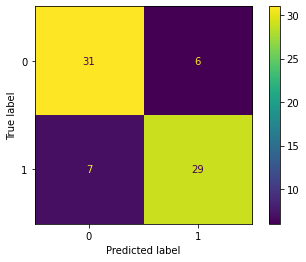

In [413]:
# Plot test confusion matrix
plot_confusion_matrix(clf_rf, normalized_X_test, y_test)

In [414]:
print("Precision ", precision(cm_rf))

Precision  0.8285714285714286


In [415]:
print("Recall:", recall(cm_rf))

Recall: 0.8055555555555556


In [416]:
print("F1:", f1(cm_rf))

F1: 0.8169014084507044


In [417]:
tp = np.sum(np.logical_and(y_test == 1, y_pred_rf == 1))
tp

29

In [418]:
tn = np.sum(np.logical_and(y_test == 0, y_pred_rf == 0))
tn

31

In [419]:
fp = np.sum(np.logical_and(y_test == 0, y_pred_rf == 1))
fp

6

In [420]:
fn = np.sum(np.logical_and(y_test == 1, y_pred_rf == 0))
fn

7

In [421]:
print("MCC:", mcc(y_test, y_pred_rf))

MCC: 0.6438769660985586


# Extreme Gradient Boosting (XGBoost)

## Grid search to find the optimal parameters for XGBoost

### Boosting
In boosting, the trees are built sequentially such that each subsequent tree aims to reduce the errors of the previous tree. Each tree learns from its predecessors and updates the residual errors. Hence, the tree that grows next in the sequence will learn from an updated version of the residuals.

The base learners in boosting are weak learners in which the bias is high, and the predictive power is just a tad better than random guessing. Each of these weak learners contributes some vital information for prediction, enabling the boosting technique to produce a strong learner by effectively combining these weak learners. The final strong learner brings down both the bias and the variance.

In contrast to bagging techniques like Random Forest, in which trees are grown to their maximum extent, boosting makes use of trees with fewer splits. Such small trees, which are not very deep, are highly interpretable. Parameters like the number of trees or iterations, the rate at which the gradient boosting learns, and the depth of the tree, could be optimally selected through validation techniques like k-fold cross validation. Having a large number of trees might lead to overfitting. So, it is necessary to carefully choose the stopping criteria for boosting.

XGBoost offers a wide range of **hyperparameters** that you can fine-tune to optimize the model's performance. Here are some of the most commonly tuned hyperparameters in XGBoost:

1. **Learning Rate (eta)**:
    - Parameter name: eta
    - Description: Learning rate controls the step size at each iteration          while moving toward a minimum of a loss function. Lower values make the      optimization more robust but require more boosting rounds
    
    
2. **Maximum Depth of Trees (max_depth):**
    - Parameter name: max_depth
    - Description: It specifies the maximum depth of the individual trees. Deeper trees can model more complex relationships but are more prone to overfitting.
    
    
3. **Number of Trees (n_estimators):**
    - Parameter name: n_estimators
    - Description: It determines the number of boosting rounds (trees) to train. More rounds can improve performance, but you should be cautious of overfitting.
    
    
4. **Column Subsampling (colsample_bytree and colsample_bylevel):**
    - Parameter name: colsample_bytree and colsample_bylevel
    - Description: These parameters control the fraction of features (columns) to be randomly sampled for building each tree and each level of a tree, respectively.
    
    
5. **Regularization Parameter (gamma):**
    - Parameter names: gamma
    - Description: used for controlling regularization. The gamma hyperparameter is related to the minimum loss reduction required to make a further partition on a leaf node of the tree. (default value = 0 --> no regularization is applied and the tree can grow as deep as necessary to fit the training data)

In [422]:
import xgboost as xgb

# Define the parameter grid for grid search
param_grid = {
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [5, 6, 8, 9],
    'n_estimators': [100, 200, 300],
    #'colsample_bytree': [0.5, 0.75, 1.0],
    #'gamma': [0, 0.1, 0.2] 
}

# Create an instance of the XGBoost classifier
xgb_classifier = xgb.XGBClassifier(objective='binary:logistic')

# Create the GridSearchCV object
grid_search_xgb = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to your training data
grid_search_xgb.fit(X_train, y_train)

# Print the best hyperparameters and their corresponding accuracy
best_learning_rate = grid_search_xgb.best_params_['learning_rate']
best_max_depth = grid_search_xgb.best_params_['max_depth']
best_n_estimators = grid_search_xgb.best_params_['n_estimators']
#best_colsample_bytree = grid_search_xgb.best_params_['colsample_bytree']

best_accuracy = grid_search_xgb.best_score_

print("Best Learning Rate:", best_learning_rate)
print("Best Max Depth:", best_max_depth)
print("Best Number of Trees:", best_n_estimators)
#print("Best Column Subsampling:", best_colsample_bytree)
print("Best Accuracy:", best_accuracy)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=Non

Best Learning Rate: 0.01
Best Max Depth: 8
Best Number of Trees: 100
Best Accuracy: 0.7119450317124736


### Compute the classification metrics on the cross-validation results 

In [423]:
# POSITIVE CLASS (1)

# After fitting the grid search, calculate metrics using cross_val_predict
best_xgb_model = grid_search_xgb.best_estimator_  # Get the best xgb model with the optimal parameters

# Use cross_val_predict to get predictions for each fold in cross-validation
y_pred_xgb = cross_val_predict(best_xgb_model, normalized_X_train, y_train, cv=5)

# Calculate accuracy for each fold
accuracy_scores_xgb = cross_val_score(best_xgb_model, normalized_X_train, y_train, cv=5, scoring='accuracy')
# Calculate precision, recall and F1 for each fold
# By default, precision, recall and F1 refer to the positive class (1)
precision_scores_1_xgb = cross_val_score(best_xgb_model, normalized_X_train, y_train, cv=5, scoring='precision')
recall_scores_1_xgb = cross_val_score(best_xgb_model, normalized_X_train, y_train, cv=5, scoring='recall')
f1_scores_1_xgb = cross_val_score(best_xgb_model, normalized_X_train, y_train, cv=5, scoring='f1')

# Calculate the mean cross-validation precision and recall
mean_accuracy_xgb = np.mean(accuracy_scores_xgb)
std_accuracy_xgb = np.std(accuracy_scores_xgb)
mean_precision_1_xgb = np.mean(precision_scores_1_xgb)
std_precision_1_xgb = np.std(precision_scores_1_xgb)
mean_recall_1_xgb = np.mean(recall_scores_1_xgb)
std_recall_1_xgb = np.std(recall_scores_1_xgb)
mean_f1_1_xgb = np.mean(f1_scores_1_xgb)
std_f1_1_xgb = np.std(f1_scores_1_xgb)


# Print the mean cross-validation precision and recall
print("Mean Cross-Validation Accuracy:", mean_accuracy_xgb)
print("Standard Deviation of Accuracy:", std_accuracy_xgb)
print("Mean Cross-Validation Precision - 1:", mean_precision_1_xgb)
print("Standard Deviation of Precision - 1:", std_precision_1_xgb)
print("Mean Cross-Validation Recall - 1:", mean_recall_1_xgb)
print("Standard Deviation of Recall - 1:", std_recall_1_xgb)
print("Mean Cross-Validation F1-score - 1:", mean_f1_1_xgb)
print("Standard Deviation of F1-score - 1:", std_f1_1_xgb)

Mean Cross-Validation Accuracy: 0.7119450317124736
Standard Deviation of Accuracy: 0.047500538418549225
Mean Cross-Validation Precision - 1: 0.6810344827586207
Standard Deviation of Precision - 1: 0.04362708750197983
Mean Cross-Validation Recall - 1: 0.8090909090909092
Standard Deviation of Recall - 1: 0.0782029569731148
Mean Cross-Validation F1-score - 1: 0.7376483703849432
Standard Deviation of F1-score - 1: 0.0455685323515614


In [424]:
# NEGATIVE CLASS (0)

# 1) PRECISION
# 'make_scorer' defines a custom scoring function for precision of class 0
# 'precision_score' is the scoring function that you want to use as a base
# 'pos_label=0' specifies that you want to calculate precision for class 0
precision_scorer_class0_xgb = make_scorer(precision_score, pos_label=0)

# Calculate precision for class 0 (negative class)
precision_scores_0_xgb = cross_val_score(best_xgb_model, normalized_X_train, y_train, cv=5, scoring=precision_scorer_class0_xgb)

# 2) RECALL 
# Define a custom scorer for recall of class 0
recall_scorer_class0_xgb = make_scorer(recall_score, pos_label=0)

# Calculate recall for class 0 (negative class)
recall_scores_0_xgb = cross_val_score(best_xgb_model, normalized_X_train, y_train, cv=5, scoring=recall_scorer_class0_xgb)

# 3) F1-SCORE
# Define a custom scorer for F1-score of class 0
f1_scorer_class0_xgb = make_scorer(f1_score, pos_label=0)

# Calculate F1-score for class 0 (negative class)
f1_scores_0_xgb = cross_val_score(best_xgb_model, normalized_X_train, y_train, cv=5, scoring=f1_scorer_class0_xgb)

# compute the mean and the standard deviation
mean_precision_0_xgb = np.mean(precision_scores_0_xgb)
std_precision_0_xgb = np.std(precision_scores_0_xgb)
mean_recall_0_xgb = np.mean(recall_scores_0_xgb)
std_recall_0_xgb = np.std(recall_scores_0_xgb)
mean_f1_0_xgb = np.mean(f1_scores_0_xgb)
std_f1_0_xgb = np.std(f1_scores_0_xgb)

print("Mean Cross-Validation Precision - 0:", mean_precision_0_xgb)
print("Standard Deviation of Precision - 0:", std_precision_0_xgb)
print("Mean Cross-Validation Recall - 0:", mean_recall_0_xgb)
print("Standard Deviation of Recall - 0:", std_recall_0_xgb)
print("Mean Cross-Validation F1-score: - 0", mean_f1_0_xgb)
print("Standard Deviation of F1-score: - 0", std_f1_0_xgb)

Mean Cross-Validation Precision - 0: 0.7677443609022557
Standard Deviation of Precision - 0: 0.07606421737447694
Mean Cross-Validation Recall - 0: 0.6142857142857142
Standard Deviation of Recall - 0: 0.07568208978874529
Mean Cross-Validation F1-score: - 0 0.6783011583011583
Standard Deviation of F1-score: - 0 0.0555520565244932


In [445]:
def XGBoost(X_train, X_test, y_train, y_test):
    
    clf = xgb.XGBClassifier(objective="binary:logistic", learning_rate=0.01, n_estimators=100, max_depth=8, random_state=123) 

    clf.fit(X_train, y_train.values.ravel())

    y_pred = clf.predict(X_test)

    # Valutazione del modello
    print(classification_report(y_test, y_pred))
    
    return y_pred

In [446]:
y_pred_xgb = XGBoost(normalized_X_train, normalized_X_test, y_train, y_test)

              precision    recall  f1-score   support

           0       0.77      0.65      0.71        37
           1       0.69      0.81      0.74        36

    accuracy                           0.73        73
   macro avg       0.73      0.73      0.72        73
weighted avg       0.73      0.73      0.72        73



### Study the eXtreme Gradient Boosting function

In [427]:
clf_xgb = xgb.XGBClassifier(objective="binary:logistic", learning_rate=0.01, n_estimators=100, max_depth=8, random_state=123) 

In [428]:
clf_xgb.fit(normalized_X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=123, ...)

In [429]:
y_pred_xgb = clf_xgb.predict(normalized_X_test)

## Evaluate the model with classification metrics 

In [430]:
# Test accuracy 
accuracy_xgb = np.mean(y_test == y_pred_xgb)
print("Accuracy:", accuracy_xgb)

Accuracy: 0.726027397260274


In [431]:
# build the confusion matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
print(cm_xgb)

[[24 13]
 [ 7 29]]


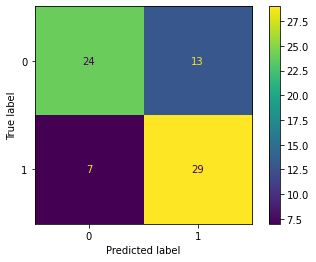

In [432]:
# Plot test confusion matrix
plot_confusion_matrix(clf_xgb, normalized_X_test, y_test)

In [433]:
print("Precision ", precision(cm_xgb))

Precision  0.6904761904761905


In [434]:
print("Recall:", recall(cm_xgb))

Recall: 0.8055555555555556


In [435]:
print("F1:", f1(cm_xgb))

F1: 0.7435897435897436


In [436]:
tp = np.sum(np.logical_and(y_test == 1, y_pred_xgb == 1))
tp

29

In [437]:
tn = np.sum(np.logical_and(y_test == 0, y_pred_xgb == 0))
tn

24

In [438]:
fp = np.sum(np.logical_and(y_test == 0, y_pred_xgb == 1))
fp

13

In [439]:
fn = np.sum(np.logical_and(y_test == 1, y_pred_xgb == 0))
fn

7

In [440]:
print("MCC:", mcc(y_test, y_pred_xgb))

MCC: 0.45940717120891217


## Plot to analyze feature importance

Build a plot having on the x axis the features, while on the y axis the feature coefficients or the Shapley values.
In particular, I want to plot 4 curves. Based on the Full Logistic Regression coefficients sorted in descending order, I want to plot:
- monotonic decreasing curve with Full Log Reg coefficients
- Lasso coefficients
- Shapley values from Full Log Reg
- Shapley values from XGBoost

In [187]:
# Full Logistic Regression coefficients 
features_tot_coefficients_logreg_sorted

,Feature,Absolute Coefficient
36,PTEN_Frame_Shift_Ins_317_318,33.186871
39,MYL10_Splice_Region_26_26,21.990841
13,PIK3CA_Missense_Mutation_102_113,21.160476
33,PIK3CA_Silent_541_542,17.484356
23,TP53_Nonsense_Mutation_236_258,13.632585
8,PIK3CA_Missense_Mutation_345_345,13.571697
10,PIK3CA_Missense_Mutation_418_420,13.284014
28,TP53_Frame_Shift_Ins_236_258,13.213091
24,TP53_In_Frame_Del_173_177,12.900406
22,NOTCH2_Frame_Shift_Del_2297_2303,12.847872


In [200]:
feature_list = features_tot_coefficients_logreg_sorted['Feature'].to_list()
feature_list

['PTEN_Frame_Shift_Ins_317_318',
 'MYL10_Splice_Region_26_26',
 'PIK3CA_Missense_Mutation_102_113',
 'PIK3CA_Silent_541_542',
 'TP53_Nonsense_Mutation_236_258',
 'PIK3CA_Missense_Mutation_345_345',
 'PIK3CA_Missense_Mutation_418_420',
 'TP53_Frame_Shift_Ins_236_258',
 'TP53_In_Frame_Del_173_177',
 'NOTCH2_Frame_Shift_Del_2297_2303',
 'TP53_Nonsense_Mutation_270_282',
 'TP53_In_Frame_Del_211_218',
 'TP53_Frame_Shift_Del_191_199',
 'PIK3R1_In_Frame_Ins_566_578',
 'TP53_Nonsense_Mutation_173_177',
 'MTMR12_Silent_520_521',
 'TP53_Frame_Shift_Ins_270_282',
 'MAML3_In_Frame_Ins_503_503',
 'ZKSCAN1_Frame_Shift_Ins_270_270',
 'ZNF195_Missense_Mutation_109_111',
 'TP53_Silent_191_199',
 'MTMR12_Missense_Mutation_520_521',
 'TP53_Silent_270_282',
 'PIK3CA_Missense_Mutation_541_542',
 'TP53_Missense_Mutation_236_258',
 'PIK3CA_Missense_Mutation_545_546',
 'PIK3CA_Missense_Mutation_1046_1047',
 'TP53_Nonsense_Mutation_211_218',
 'TP53_Nonsense_Mutation_191_199',
 'TP53_Missense_Mutation_270_282',

In [209]:
# multiply the Absolute coefficient for 10^-1
features_tot_coefficients_logreg_sorted['Absolute Coefficient*0.1'] = features_tot_coefficients_logreg_sorted['Absolute Coefficient']*0.1
features_tot_coefficients_logreg_sorted

,Feature,Absolute Coefficient,Absolute Coefficient*0.1
36,PTEN_Frame_Shift_Ins_317_318,33.186871,3.318687
39,MYL10_Splice_Region_26_26,21.990841,2.199084
13,PIK3CA_Missense_Mutation_102_113,21.160476,2.116048
33,PIK3CA_Silent_541_542,17.484356,1.748436
23,TP53_Nonsense_Mutation_236_258,13.632585,1.363259
8,PIK3CA_Missense_Mutation_345_345,13.571697,1.357170
10,PIK3CA_Missense_Mutation_418_420,13.284014,1.328401
28,TP53_Frame_Shift_Ins_236_258,13.213091,1.321309
24,TP53_In_Frame_Del_173_177,12.900406,1.290041
22,NOTCH2_Frame_Shift_Del_2297_2303,12.847872,1.284787


In [210]:
# Lasso coefficients 
features_tot_coefficients_Lasso_sorted

,Feature,Absolute Coefficient
33,PIK3CA_Silent_541_542,5.732909
7,PIK3CA_Missense_Mutation_541_542,4.223439
36,PTEN_Frame_Shift_Ins_317_318,3.620914
8,PIK3CA_Missense_Mutation_345_345,3.336292
10,PIK3CA_Missense_Mutation_418_420,3.031421
23,TP53_Nonsense_Mutation_236_258,2.722662
13,PIK3CA_Missense_Mutation_102_113,2.519597
39,MYL10_Splice_Region_26_26,2.462162
28,TP53_Frame_Shift_Ins_236_258,2.305811
22,NOTCH2_Frame_Shift_Del_2297_2303,2.079504


In [211]:
# reorder the Lasso features based on Full Log Reg coefficients
features_tot_coefficients_Lasso_sorted_def = features_tot_coefficients_Lasso_sorted.set_index('Feature').loc[features_tot_coefficients_logreg_sorted['Feature']].reset_index()
features_tot_coefficients_Lasso_sorted_def

,Feature,Absolute Coefficient
0,PTEN_Frame_Shift_Ins_317_318,3.620914
1,MYL10_Splice_Region_26_26,2.462162
2,PIK3CA_Missense_Mutation_102_113,2.519597
3,PIK3CA_Silent_541_542,5.732909
4,TP53_Nonsense_Mutation_236_258,2.722662
5,PIK3CA_Missense_Mutation_345_345,3.336292
6,PIK3CA_Missense_Mutation_418_420,3.031421
7,TP53_Frame_Shift_Ins_236_258,2.305811
8,TP53_In_Frame_Del_173_177,1.833733
9,NOTCH2_Frame_Shift_Del_2297_2303,2.079504


In [212]:
# multiply the feature importance values per 10
features_tot_coefficients_Lasso_sorted_def['Absolute Coefficient*10'] = features_tot_coefficients_Lasso_sorted_def['Absolute Coefficient']*10
features_tot_coefficients_Lasso_sorted_def

,Feature,Absolute Coefficient,Absolute Coefficient*10
0,PTEN_Frame_Shift_Ins_317_318,3.620914,36.209138
1,MYL10_Splice_Region_26_26,2.462162,24.621622
2,PIK3CA_Missense_Mutation_102_113,2.519597,25.195973
3,PIK3CA_Silent_541_542,5.732909,57.329087
4,TP53_Nonsense_Mutation_236_258,2.722662,27.226619
5,PIK3CA_Missense_Mutation_345_345,3.336292,33.362916
6,PIK3CA_Missense_Mutation_418_420,3.031421,30.314211
7,TP53_Frame_Shift_Ins_236_258,2.305811,23.058112
8,TP53_In_Frame_Del_173_177,1.833733,18.337326
9,NOTCH2_Frame_Shift_Del_2297_2303,2.079504,20.795037


In [213]:
# Shapley values from Full Logistic Regression
feature_importance_logreg

,col_name,feature_importance_vals
8,PIK3CA_Missense_Mutation_345_345,1.805222
13,PIK3CA_Missense_Mutation_102_113,0.701484
28,TP53_Frame_Shift_Ins_236_258,0.664275
2,PIK3CA_Missense_Mutation_1046_1047,0.543595
39,MYL10_Splice_Region_26_26,0.439817
21,MTMR12_Missense_Mutation_520_521,0.421686
7,PIK3CA_Missense_Mutation_541_542,0.402758
37,ZKSCAN1_Frame_Shift_Ins_270_270,0.386555
1,MAML3_In_Frame_Ins_503_503,0.355401
36,PTEN_Frame_Shift_Ins_317_318,0.331869


In [214]:
# reorder the Full Logistic Regression Shapley values based on Full Log Reg coefficients
feature_importance_logreg_sorted_def = feature_importance_logreg.set_index('col_name').loc[features_tot_coefficients_logreg_sorted['Feature']].reset_index()
feature_importance_logreg_sorted_def

,col_name,feature_importance_vals
0,PTEN_Frame_Shift_Ins_317_318,0.331869
1,MYL10_Splice_Region_26_26,0.439817
2,PIK3CA_Missense_Mutation_102_113,0.701484
3,PIK3CA_Silent_541_542,0.174844
4,TP53_Nonsense_Mutation_236_258,0.000000
5,PIK3CA_Missense_Mutation_345_345,1.805222
6,PIK3CA_Missense_Mutation_418_420,0.132840
7,TP53_Frame_Shift_Ins_236_258,0.664275
8,TP53_In_Frame_Del_173_177,0.129004
9,NOTCH2_Frame_Shift_Del_2297_2303,0.300957


In [215]:
# multiply the feature importance values per 10
feature_importance_logreg_sorted_def['feature_importance_vals*10'] = feature_importance_logreg_sorted_def['feature_importance_vals']*10
feature_importance_logreg_sorted_def

,col_name,feature_importance_vals,feature_importance_vals*10
0,PTEN_Frame_Shift_Ins_317_318,0.331869,3.318687
1,MYL10_Splice_Region_26_26,0.439817,4.398168
2,PIK3CA_Missense_Mutation_102_113,0.701484,7.014843
3,PIK3CA_Silent_541_542,0.174844,1.748436
4,TP53_Nonsense_Mutation_236_258,0.000000,0.000000
5,PIK3CA_Missense_Mutation_345_345,1.805222,18.052217
6,PIK3CA_Missense_Mutation_418_420,0.132840,1.328401
7,TP53_Frame_Shift_Ins_236_258,0.664275,6.642746
8,TP53_In_Frame_Del_173_177,0.129004,1.290041
9,NOTCH2_Frame_Shift_Del_2297_2303,0.300957,3.009570


In [270]:
# Shapley values from SVM-polynomial kernel
feature_importance_poly_svm

,col_name,feature_importance_vals
2,PIK3CA_Missense_Mutation_1046_1047,0.211470
8,PIK3CA_Missense_Mutation_345_345,0.091148
7,PIK3CA_Missense_Mutation_541_542,0.089747
5,PIK3CA_Missense_Mutation_545_546,0.089359
3,TP53_Missense_Mutation_173_177,0.038679
12,TP53_Missense_Mutation_191_199,0.034200
37,ZKSCAN1_Frame_Shift_Ins_270_270,0.033248
0,TP53_Missense_Mutation_270_282,0.031373
4,TP53_Missense_Mutation_236_258,0.031247
17,PIK3CA_In_Frame_Del_102_113,0.025732


In [271]:
# reorder the SVM poly Shapley values based on Full Log Reg coefficients
feature_importance_poly_svm_sorted_def = feature_importance_poly_svm.set_index('col_name').loc[features_tot_coefficients_logreg_sorted['Feature']].reset_index()
feature_importance_poly_svm_sorted_def

,col_name,feature_importance_vals
0,PTEN_Frame_Shift_Ins_317_318,0.000910
1,MYL10_Splice_Region_26_26,0.000000
2,PIK3CA_Missense_Mutation_102_113,0.006714
3,PIK3CA_Silent_541_542,0.000000
4,TP53_Nonsense_Mutation_236_258,0.000000
5,PIK3CA_Missense_Mutation_345_345,0.091148
6,PIK3CA_Missense_Mutation_418_420,0.006340
7,TP53_Frame_Shift_Ins_236_258,0.000000
8,TP53_In_Frame_Del_173_177,0.000000
9,NOTCH2_Frame_Shift_Del_2297_2303,0.000038


In [272]:
# multiply the feature importance values for 10
feature_importance_poly_svm_sorted_def['feature_importance_vals*10'] = feature_importance_poly_svm_sorted_def['feature_importance_vals']*10
feature_importance_poly_svm_sorted_def

,col_name,feature_importance_vals,feature_importance_vals*10
0,PTEN_Frame_Shift_Ins_317_318,0.000910,0.009101
1,MYL10_Splice_Region_26_26,0.000000,0.000000
2,PIK3CA_Missense_Mutation_102_113,0.006714,0.067140
3,PIK3CA_Silent_541_542,0.000000,0.000000
4,TP53_Nonsense_Mutation_236_258,0.000000,0.000000
5,PIK3CA_Missense_Mutation_345_345,0.091148,0.911475
6,PIK3CA_Missense_Mutation_418_420,0.006340,0.063402
7,TP53_Frame_Shift_Ins_236_258,0.000000,0.000000
8,TP53_In_Frame_Del_173_177,0.000000,0.000000
9,NOTCH2_Frame_Shift_Del_2297_2303,0.000038,0.000375


Text(0.5, 0, 'Features')

Text(0, 0.5, 'Feature importance values')

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

print_figure() got unexpected keyword argument "quality" which is no longer supported as of 3.3 and will become an error two minor releases later


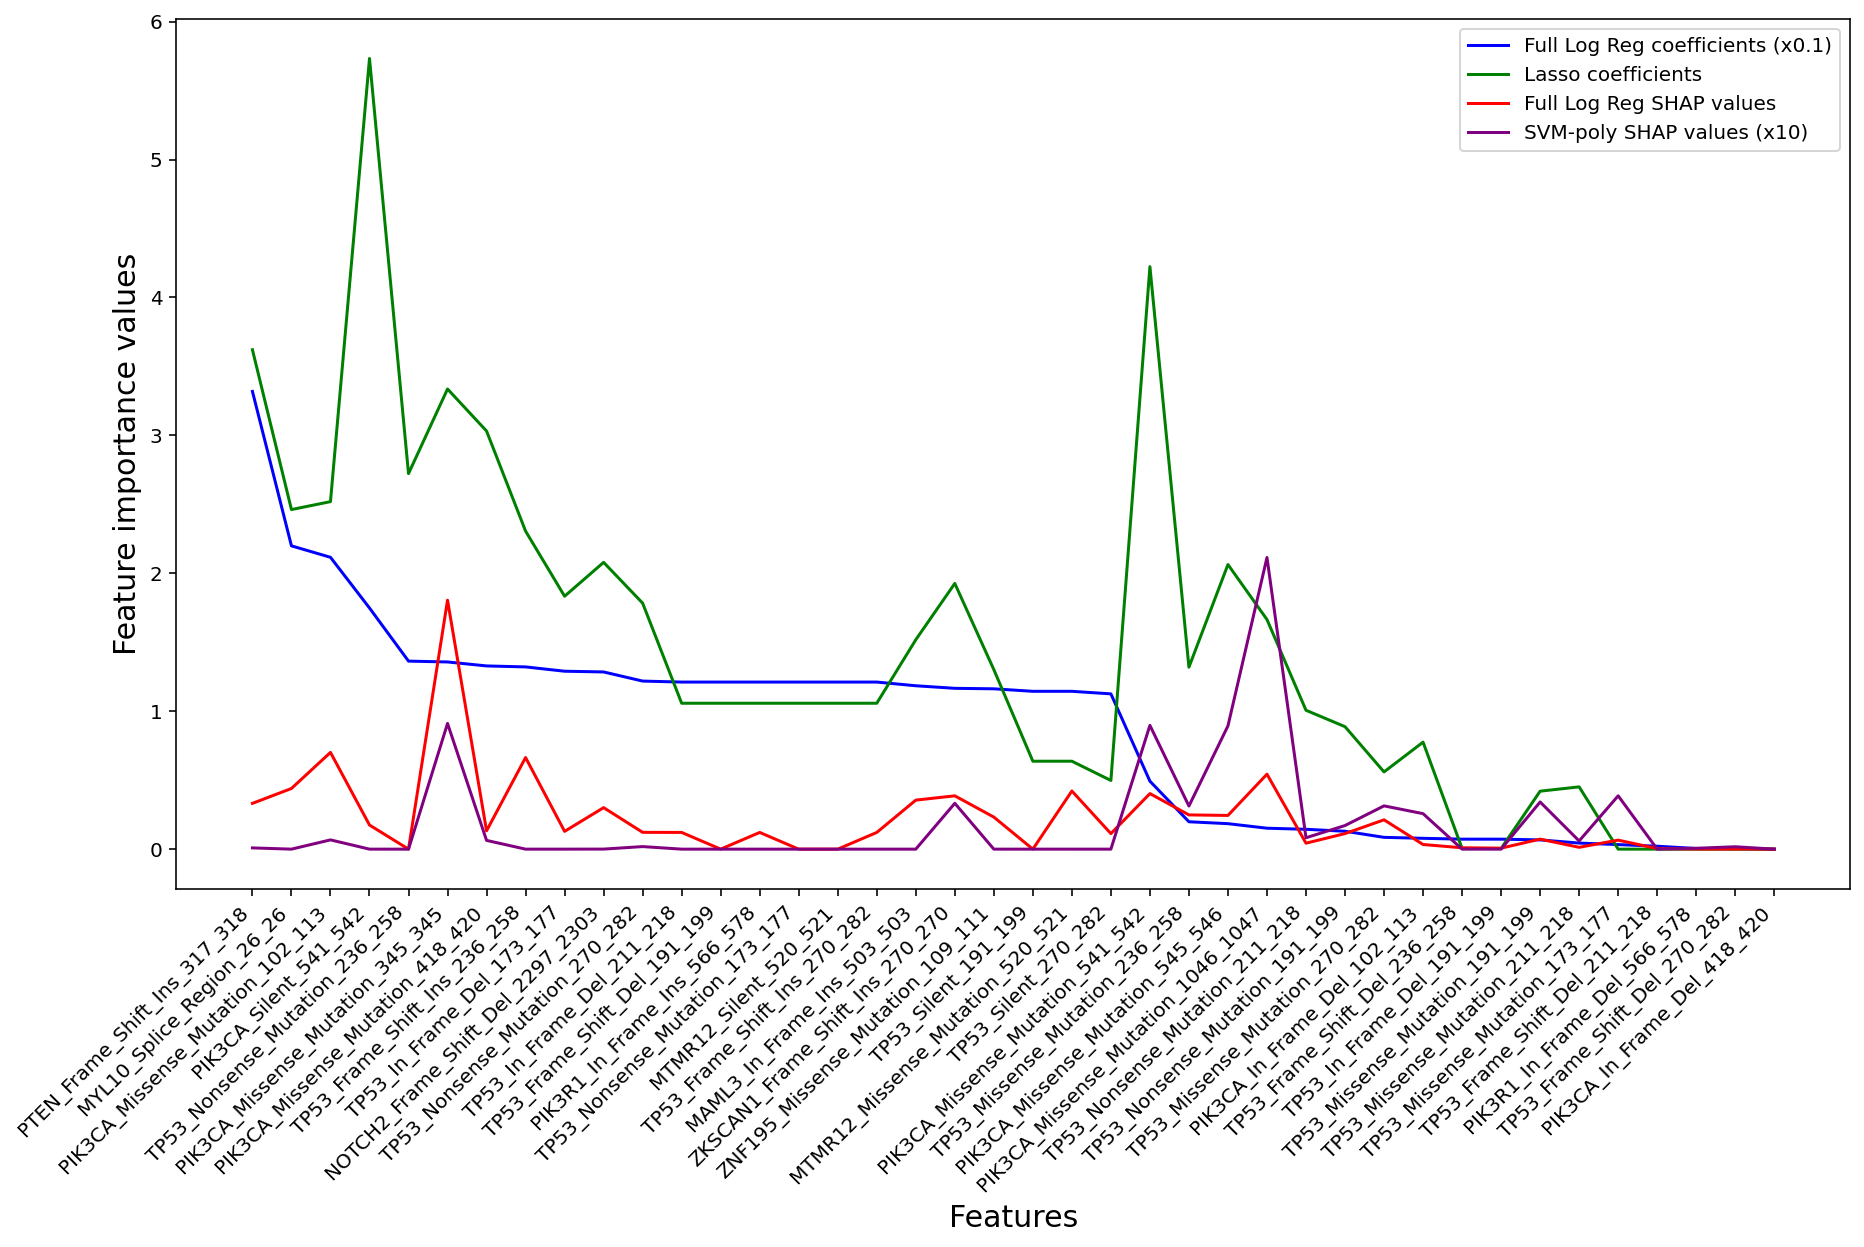

In [273]:
#features = np.arange(0, 349)
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina', quality=100)
coefficients_logreg = features_tot_coefficients_logreg_sorted[['Absolute Coefficient*0.1']].to_numpy()
coefficients_Lasso = features_tot_coefficients_Lasso_sorted_def[['Absolute Coefficient']].to_numpy()
shap_logreg = feature_importance_logreg_sorted_def[['feature_importance_vals']].to_numpy()
shap_svm_poly = feature_importance_poly_svm_sorted_def[['feature_importance_vals*10']].to_numpy()

plt.rcParams['figure.figsize'] = (15, 8)

#set axes limit
#plt.ylim(0.001, 1000)

plt.plot(feature_list, coefficients_logreg, label = 'Full Log Reg coefficients (x0.1)', color='blue')
plt.plot(feature_list, coefficients_Lasso, label = 'Lasso coefficients', color='green')
plt.plot(feature_list, shap_logreg, label = 'Full Log Reg SHAP values', color='red')
plt.plot(feature_list, shap_svm_poly, label = 'SVM-poly SHAP values (x10)', color='purple')
plt.xlabel("Features", fontsize=15)
plt.ylabel("Feature importance values", fontsize=15)
plt.legend()
# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45, ha='right')
plt.show()

Text(0.5, 0, 'Features')

Text(0, 0.5, 'Feature importance values')

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

print_figure() got unexpected keyword argument "quality" which is no longer supported as of 3.3 and will become an error two minor releases later


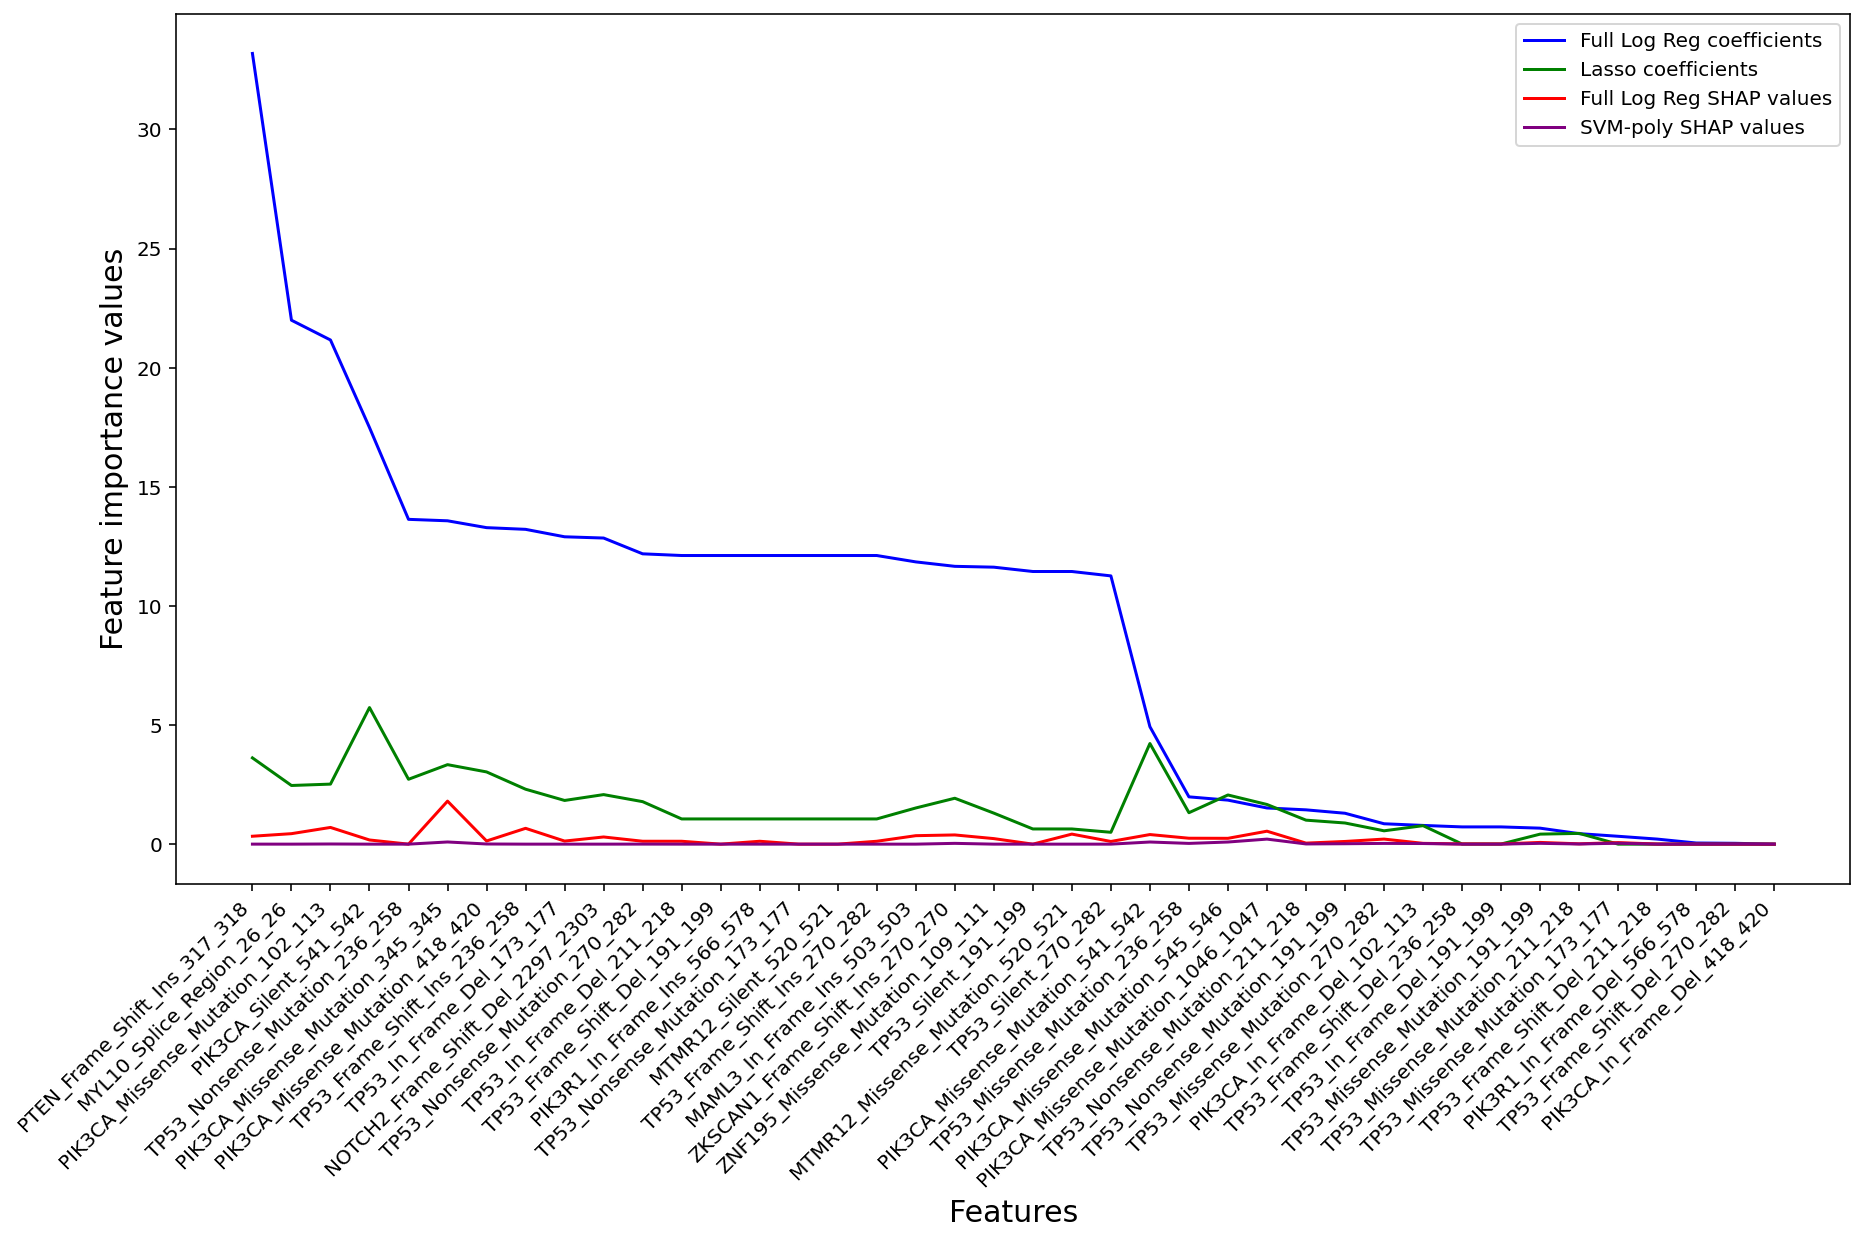

In [274]:
set_matplotlib_formats('retina', quality=100)
coefficients_logreg = features_tot_coefficients_logreg_sorted[['Absolute Coefficient']].to_numpy()
coefficients_Lasso = features_tot_coefficients_Lasso_sorted_def[['Absolute Coefficient']].to_numpy()
shap_logreg = feature_importance_logreg_sorted_def[['feature_importance_vals']].to_numpy()
shap_svm_poly = feature_importance_poly_svm_sorted_def[['feature_importance_vals']].to_numpy()

plt.rcParams['figure.figsize'] = (15, 8)

#set axes limit
#plt.ylim(0.001, 1000)

plt.plot(feature_list, coefficients_logreg, label = 'Full Log Reg coefficients', color='blue')
plt.plot(feature_list, coefficients_Lasso, label = 'Lasso coefficients', color='green')
plt.plot(feature_list, shap_logreg, label = 'Full Log Reg SHAP values', color='red')
plt.plot(feature_list, shap_svm_poly, label = 'SVM-poly SHAP values', color='purple')
plt.xlabel("Features", fontsize=15)
plt.ylabel("Feature importance values", fontsize=15)
plt.legend()
# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45, ha='right')
plt.show()